<a href="https://colab.research.google.com/github/1002Sam/Classification-Cardiovascular-Risk-Prediction/blob/main/Classification_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular Risk Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -** Samadhan Tangde
##### **Team Member 2 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/1002Sam/Classification-Cardiovascular-Risk-Prediction.git

# **Problem Statement**


**The objective of this project is to develop a machine learning model that can predict whether a patient is at risk of developing coronary heart disease (CHD) within the next 10 years.** The dataset used for this project contains records of over 4,000 patients from an ongoing cardiovascular study in Framingham, Massachusetts. Each record consists of 15 attributes, including demographic, behavioral, and medical risk factors.

**The primary task is binary classification, where the target variable is "TenYearCHD," indicating whether a patient is at risk of CHD (1) or not (0).** The features include attributes such as age, sex, education level, smoking status, blood pressure measurements, cholesterol levels, and more. The dataset may also contain missing values that need to be handled appropriately.

**By building an accurate predictive model, this project aims to assist healthcare professionals in identifying individuals at higher risk of CHD, allowing for early intervention and tailored healthcare recommendations to reduce the incidence of cardiovascular diseases.**

Key objectives for the project include data preprocessing, feature engineering, model selection, hyperparameter tuning, and evaluating the model's performance using appropriate metrics. The success of this project will be measured by the model's ability to predict CHD risk with a high degree of accuracy and reliability.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd

# Import Data Visualisation Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import and Ignore warnings for better code readability,
import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

# Importing ML Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

# Machine Learning Algorithms
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold
import xgboost as xgb

# Cross Validation and Hyper-parameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

# Read csv file
data_raw = pd.read_csv('/content/drive/MyDrive/AlmaBetter /Machine Learning/5. Capstone Project - Classification/data_cardiovascular_risk.csv')
#data_raw = pd.read_csv(path, index_col='id')

# Creating a copy of data set
clas = data_raw.copy()

Mounted at /content/drive


### Dataset First View

In [ ]:
# Dataset First Look
clas

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
0        0   64        2.0   F        YES         3.0     0.0   
1        1   36        4.0   M         NO         0.0     0.0   
2        2   46        1.0   F        YES        10.0     0.0   
3        3   50        1.0   M        YES        20.0     0.0   
4        4   64        1.0   F        YES        30.0     0.0   
...    ...  ...        ...  ..        ...         ...     ...   
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    221.0  148.0   85.0    NaN   
1                   0             1         0    212.0  168.0   98.0  29.77   
2                   0             0         0    250.0  116.0   71.0  20.35   
3                   0             1         0    233.0  158.0   88.0  28.26   
4                   0             0         0    241.0  136.5   85.0  26.42   
...               ...           ...       ...      ...    ...    ...    ...   
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
0          90.0     80.0           1  
1          72.0     75.0           0  
2          88.0     94.0           0  
3          68.0     94.0           1  
4          70.0     77.0           0  
...         ...      ...         ...  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0  

[3390 rows x 17 columns]

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(clas.shape)

(3390, 17)


### Dataset Information

In [ ]:
# Dataset Info
clas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
clas.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_data = clas.isnull().sum().sort_values(ascending = False)
print("\nMissing data:")
print(missing_data)
print('\n')
total_percentage = (missing_data.sum()/clas.shape[0])*100
print(f"The Total percentage of missing data is {round(total_percentage,2)}%")


Missing data:
glucose            304
education           87
BPMeds              44
totChol             38
cigsPerDay          22
BMI                 14
heartRate            1
id                   0
diaBP                0
sysBP                0
prevalentHyp         0
diabetes             0
age                  0
prevalentStroke      0
is_smoking           0
sex                  0
TenYearCHD           0
dtype: int64


The Total percentage of missing data is 15.04%


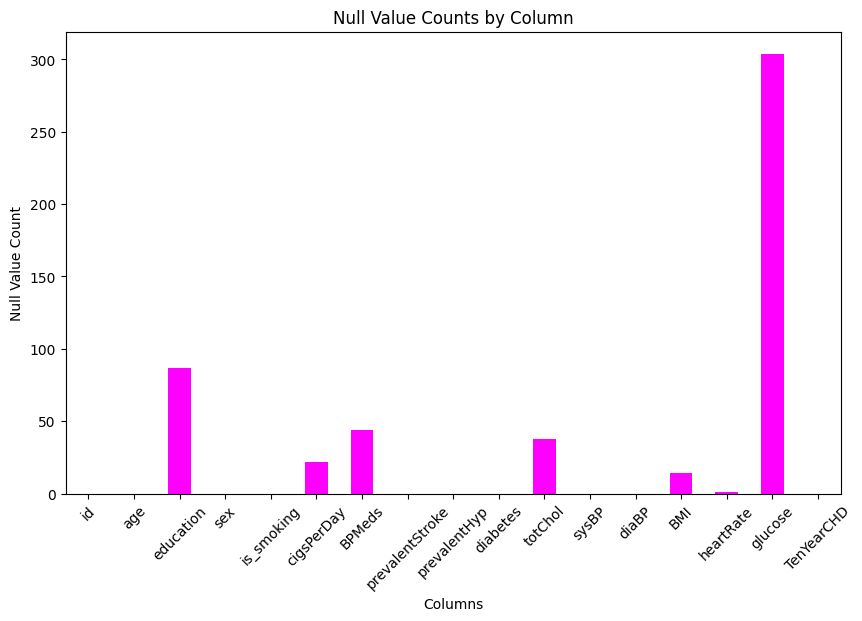

In [ ]:
# Visualizing the missing values
# Calculate the count of null values in each column
null_counts = clas.isnull().sum()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
null_counts.plot(kind='bar', color='Magenta')
plt.xlabel('Columns')
plt.ylabel('Null Value Count')
plt.title('Null Value Counts by Column')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.show()

### What did you know about your dataset?

Based on the initial analysis, here's what we can infer about dataset:

**Dataset info:**
* TenYearCHD is the dependent variable column.

**Dataset Size:**
* The dataset consists of 3,390 rows and 17 columns.
* Each row represents a patient, and each column represents a different attribute or feature related to cardiovascular risk factors.

**Duplicate Values:**
* There are no duplicate rows in the dataset as the count of duplicated rows is 0.

**Missing Values/Null Values:**

The dataset contains missing values in several columns, which may require
handling during data preprocessing.

* "education" has 87 missing values.
* "cigsPerDay" has 22 missing values.
* "BPMeds" has 44 missing values.
* "totChol" has 38 missing values.
* "BMI" has 14 missing values.
* "heartRate" has 1 missing value.
* "glucose" has 304 missing values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
clas.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Dataset Describe
clas.describe(include = 'all').round(2).T

count unique  top  freq    mean     std    min     25%  \
id               3390.0    NaN  NaN   NaN  1694.5  978.75    0.0  847.25   
age              3390.0    NaN  NaN   NaN   49.54    8.59   32.0    42.0   
education        3303.0    NaN  NaN   NaN    1.97    1.02    1.0     1.0   
sex                3390      2    F  1923     NaN     NaN    NaN     NaN   
is_smoking         3390      2   NO  1703     NaN     NaN    NaN     NaN   
cigsPerDay       3368.0    NaN  NaN   NaN    9.07   11.88    0.0     0.0   
BPMeds           3346.0    NaN  NaN   NaN    0.03    0.17    0.0     0.0   
prevalentStroke  3390.0    NaN  NaN   NaN    0.01    0.08    0.0     0.0   
prevalentHyp     3390.0    NaN  NaN   NaN    0.32    0.46    0.0     0.0   
diabetes         3390.0    NaN  NaN   NaN    0.03    0.16    0.0     0.0   
totChol          3352.0    NaN  NaN   NaN  237.07   45.25  107.0   206.0   
sysBP            3390.0    NaN  NaN   NaN   132.6   22.29   83.5   117.0   
diaBP            3390.0    NaN  NaN   NaN   82.88   12.02   48.0    74.5   
BMI              3376.0    NaN  NaN   NaN   25.79    4.12  15.96   23.02   
heartRate        3389.0    NaN  NaN   NaN   75.98   11.97   45.0    68.0   
glucose          3086.0    NaN  NaN   NaN   82.09   24.24   40.0    71.0   
TenYearCHD       3390.0    NaN  NaN   NaN    0.15    0.36    0.0     0.0   

                    50%      75%     max  
id               1694.5  2541.75  3389.0  
age                49.0     56.0    70.0  
education           2.0      3.0     4.0  
sex                 NaN      NaN     NaN  
is_smoking          NaN      NaN     NaN  
cigsPerDay          0.0     20.0    70.0  
BPMeds              0.0      0.0     1.0  
prevalentStroke     0.0      0.0     1.0  
prevalentHyp        0.0      1.0     1.0  
diabetes            0.0      0.0     1.0  
totChol           234.0    264.0   696.0  
sysBP             128.5    144.0   295.0  
diaBP              82.0     90.0   142.5  
BMI               25.38    28.04    56.8  
heartRate          75.0     83.0   143.0  
glucose            78.0     87.0   394.0  
TenYearCHD          0.0      0.0     1.0

### Variables Description

* **id:** An identifier for each patient (integer).
* **age:** The age of the patient (integer).
* **education:** The level of education of the patient (float). This is a categorical variable, but it's represented as a float. You might want to convert it to a proper categorical variable during preprocessing.
* **sex:** The gender of the patient (object). This is a categorical variable with two values, likely "M" for male and "F" for female.
* **is_smoking:** Indicates whether the patient is a smoker (object). This is a categorical variable, possibly "YES" or "NO."
* **cigsPerDay:** The number of cigarettes smoked per day (float). This is a numerical variable.
* **BPMeds:** Indicates whether the patient is on blood pressure medications (float). This is a binary variable, likely representing "0.0" for no medication and "1.0" for medication use.
* **prevalentStroke:** Indicates whether the patient has a prevalent stroke (integer). This is a binary variable, likely "0" for no stroke and "1" for a history of stroke.
* **prevalentHyp:** Indicates whether the patient has prevalent hypertension (integer). This is a binary variable, likely "0" for no hypertension and "1" for hypertension.
* **diabetes:** Indicates whether the patient has diabetes (integer). This is a binary variable, likely "0" for no diabetes and "1" for diabetes.
* **totChol:** Total cholesterol level (float). This is a numerical variable.
* **sysBP:** Systolic blood pressure (float). This is a numerical variable.
* **diaBP:** Diastolic blood pressure (float). This is a numerical variable.
* **BMI:** Body mass index (float). This is a numerical variable.
* **heartRate:** Heart rate of the patient (float). This is a numerical variable.
* **glucose:** Glucose level (float). This is a numerical variable.
* **TenYearCHD:** The target variable indicating whether the patient is at risk of coronary heart disease (CHD) within the next 10 years (integer). This is a binary variable, likely "0" for no risk and "1" for risk.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
unique_value_counts = clas.apply(lambda x: len(x.unique()))
unique_value_counts

id                 3390
age                  39
education             5
sex                   2
is_smoking            2
cigsPerDay           33
BPMeds                3
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             241
sysBP               226
diaBP               142
BMI                1260
heartRate            69
glucose             133
TenYearCHD            2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Dropping the id column because it is not relevant
clas.drop(columns=['id'], inplace=True)

In [ ]:
# Renaming the columns
# Renaming to lowercase and separating informative words with underscores.
clas.rename(columns={'cigsPerDay':'cigs_per_day','BPMeds':'bp_meds',
                   'prevalentStroke':'prevalent_stroke','prevalentHyp':'prevalent_hyp',
                   'totChol':'total_cholesterol','sysBP':'systolic_bp','diaBP':'diastolic_bp',
                   'BMI':'bmi','heartRate':'heart_rate','TenYearCHD':'ten_year_chd'},
          inplace = True)

In [ ]:
# Defining 3 lists containing the column names which will be helpful for further manipulation.
# This is defined based on the number of unique values for each attribute
dependent_var = ['ten_year_chd']

categorical_var = [i for i in clas.columns if clas[i].nunique()<=4]
print(f'categorical_var: {categorical_var}')
print('\n')

continuous_var = [i for i in clas.columns if i not in categorical_var]
print(f'continuous_var: {continuous_var}')

categorical_var: ['education', 'sex', 'is_smoking', 'bp_meds', 'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'ten_year_chd']


continuous_var: ['age', 'cigs_per_day', 'total_cholesterol', 'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose']


In [ ]:
clas['cigs_per_day'].unique()

array([ 3.,  0., 10., 20., 30., 35., 40., 15.,  9., 60., 17., 25.,  5.,
       43.,  7., 50., 19., 18.,  1., 45.,  2.,  6., nan, 11.,  8.,  4.,
       14., 16., 23., 13., 12., 70., 38.])

In [ ]:
#!pip install dataprep

In [ ]:
# from dataprep.eda import create_report
# report = create_report(clas)
# report

### What all manipulations have you done and insights you found?

**Data Manipulations:**

**1. Dropping Irrelevant Column:**
Dropped the 'id' column as it was deemed irrelevant to the analysis.

**2.Column Renaming:**
Renamed the columns to make them consistent, using lowercase letters and separating informative words with underscores.

**3. Defining Lists for Further Manipulation:**
Defined three lists that categorize your columns into types (dependent, categorical, continuous). This categorization is based on the number of unique values for each attribute.

**Insights:**
* Categorical Variables: Identified and printed the list of categorical variables based on the number of unique values. Categorical variables typically have a small number of unique values.
* Continuous Variables:
Identified and printed the list of continuous variables based on the absence in the categorical variable list.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

There are 2879 patients without heart disease and 511 patients with heart disease.
---------------------------------------------------------------------------------------------------------------------


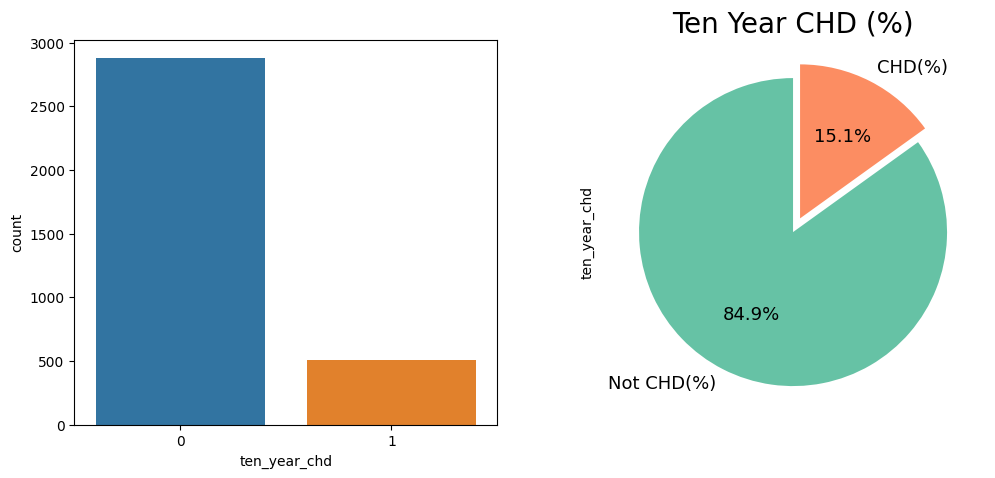

In [ ]:
# Chart - 1 visualization code
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Chart 1 - Countplot for TenYearCHD
sns.countplot(x="ten_year_chd", data=clas, ax=axes[0])
cases = clas['ten_year_chd'].value_counts()
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with heart disease.")
print('---------------------------------------------------------------------------------------------------------------------')

# Color palette selection
colors = sns.color_palette("Set2")

# Chart 2 - Pie chart for TenYearCHD percentage
explode = [0, 0.1]
textprops = {'fontsize': 13}
clas['ten_year_chd'].value_counts().plot.pie(labels=['Not CHD(%)', 'CHD(%)'], startangle=90, colors=colors, explode=explode, autopct="%1.1f%%", textprops=textprops, ax=axes[1])
axes[1].set_title('Ten Year CHD (%)', fontsize=20)

# Display the chart
plt.show()

##### 1. Why did you pick the specific chart?

I picked a countplot and a pie chart for visualization. The countplot is suitable for showing the distribution of binary categories, and the pie chart effectively represents the composition of categories as percentages, making it easy to understand the relative proportions of patients with and without heart disease.

##### 2. What is/are the insight(s) found from the chart?

The insights from the chart are:

* The countplot reveals that the majority of patients in the dataset do not have heart disease, with 2,879 patients (about 84.9%) falling into this category.
* The pie chart visually shows the percentage breakdown, highlighting that approximately 15.1% of the patients in the dataset have heart disease.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can potentially have a positive business impact. They provide a clear understanding of the distribution of patients with and without heart disease, which can inform healthcare professionals and policymakers in Framingham, Massachusetts, about the prevalence of heart disease in the population. This information can be used to allocate resources, develop targeted preventive measures, and plan healthcare interventions to reduce the incidence of heart disease.

There isn't necessarily a negative business impact from these insights, but one should be cautious not to draw premature conclusions about the causes of heart disease or make major business decisions based solely on the prevalence of heart disease in this dataset. Further analysis and consideration of other risk factors and medical data are needed to make informed decisions related to healthcare strategies.

#### Chart - 2

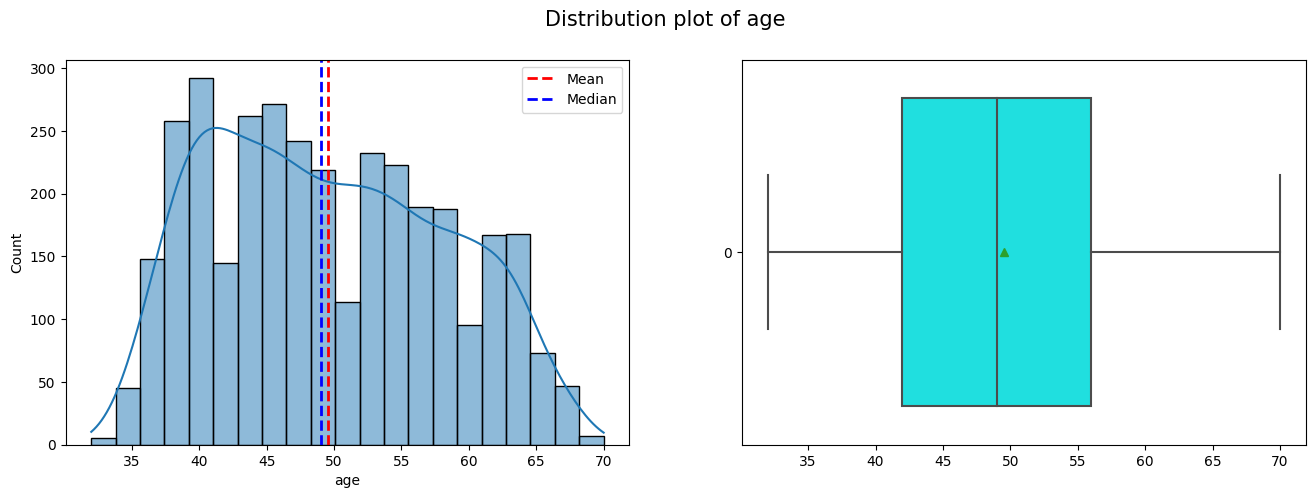

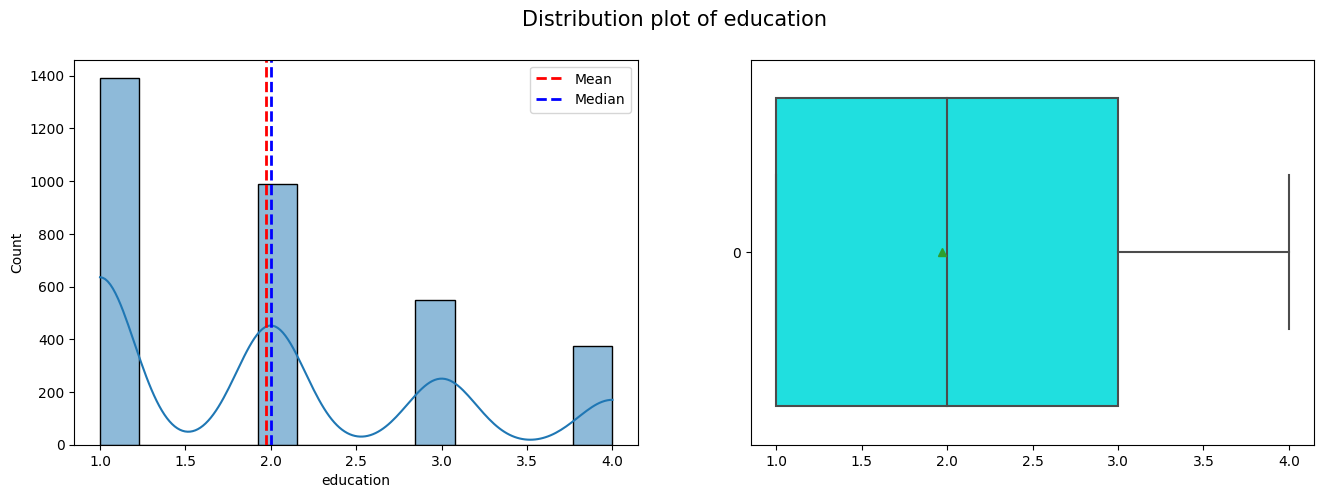

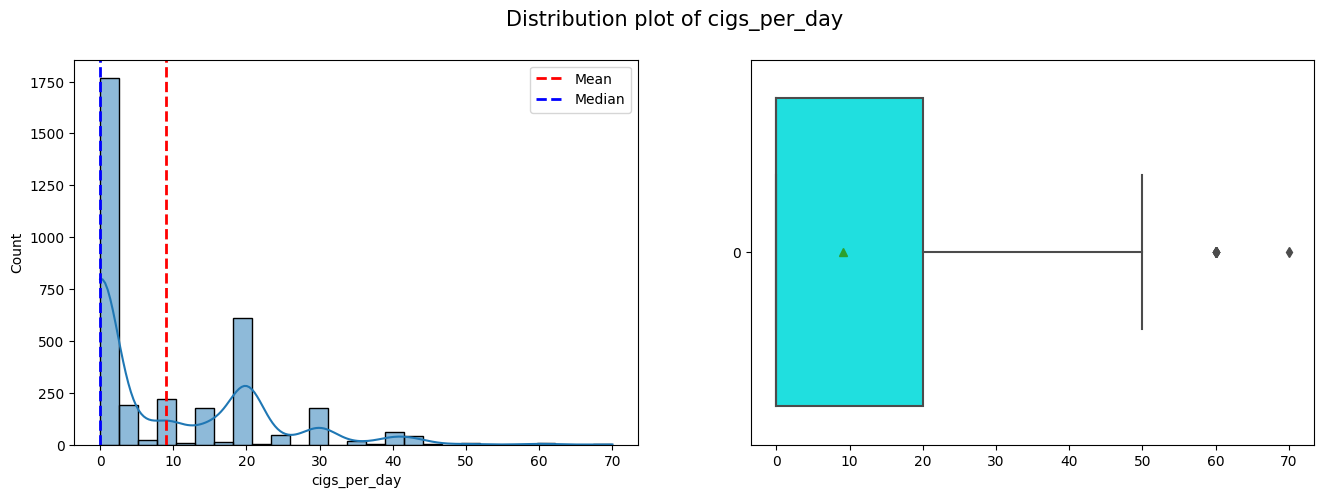

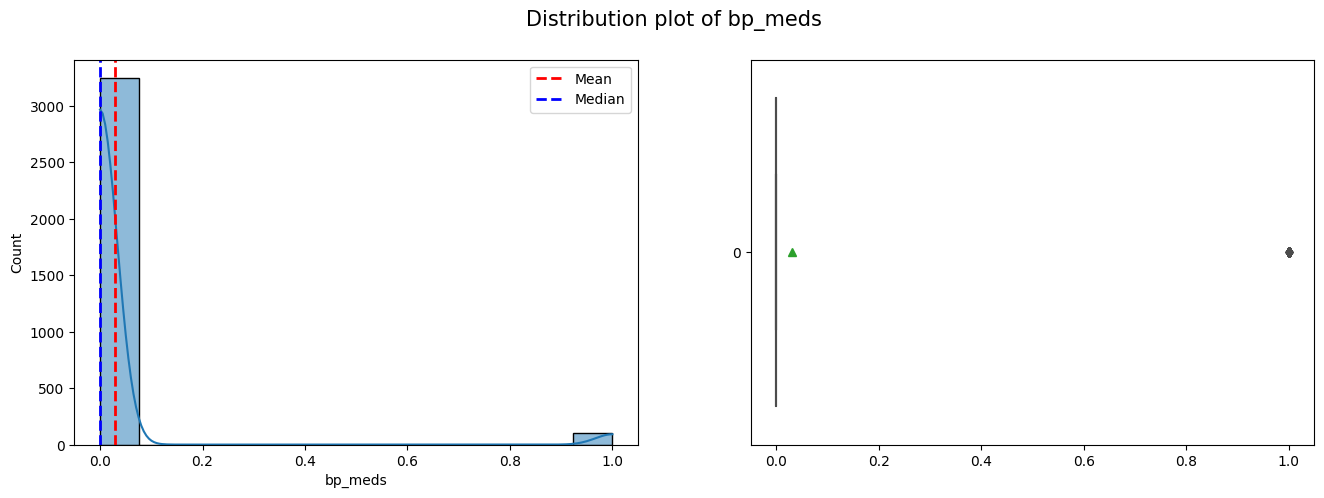

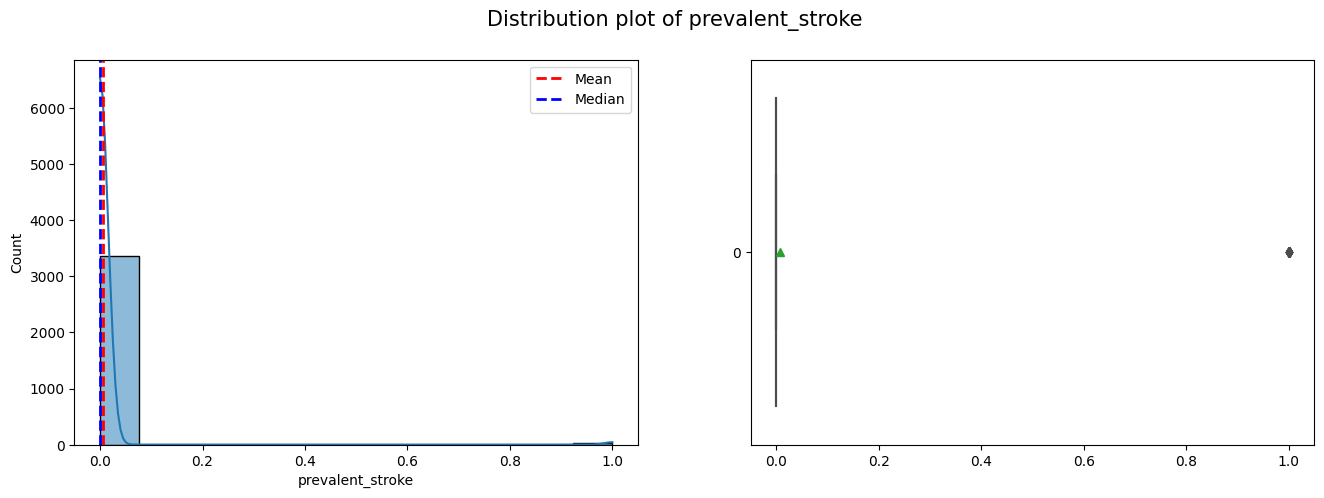

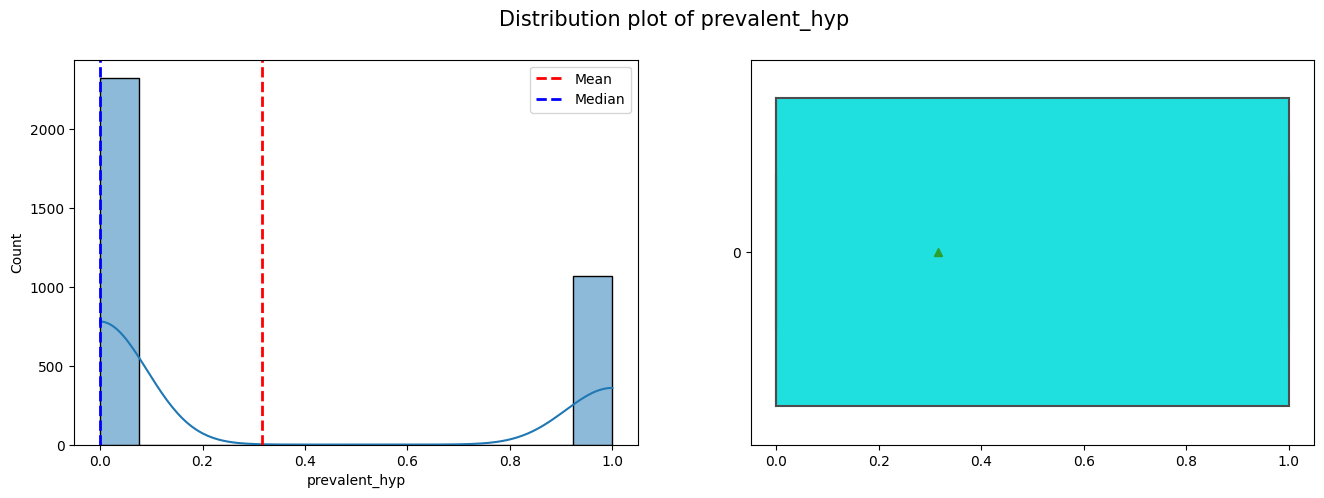

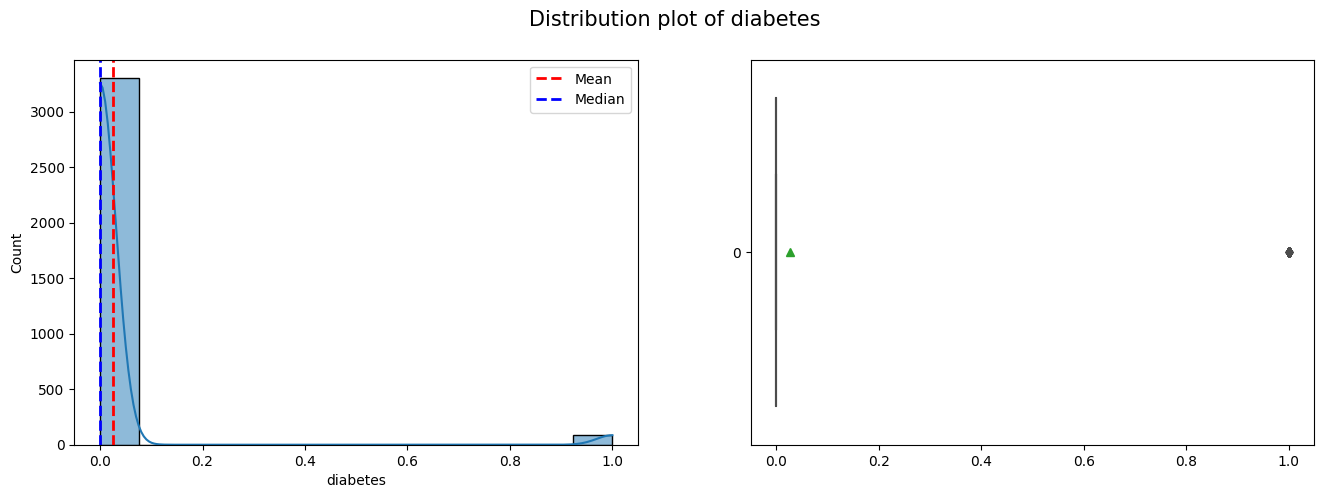

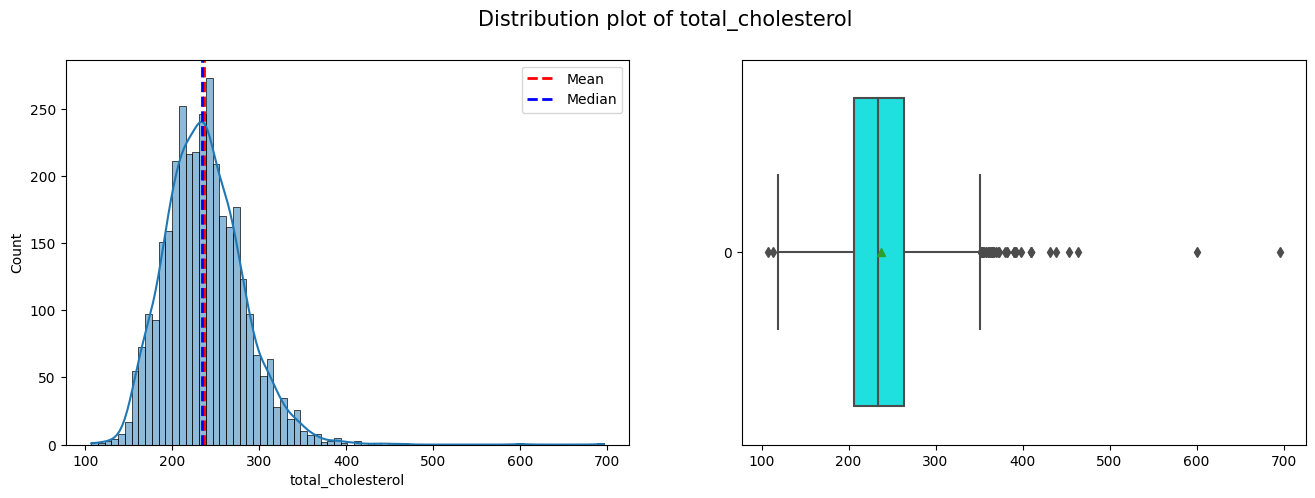

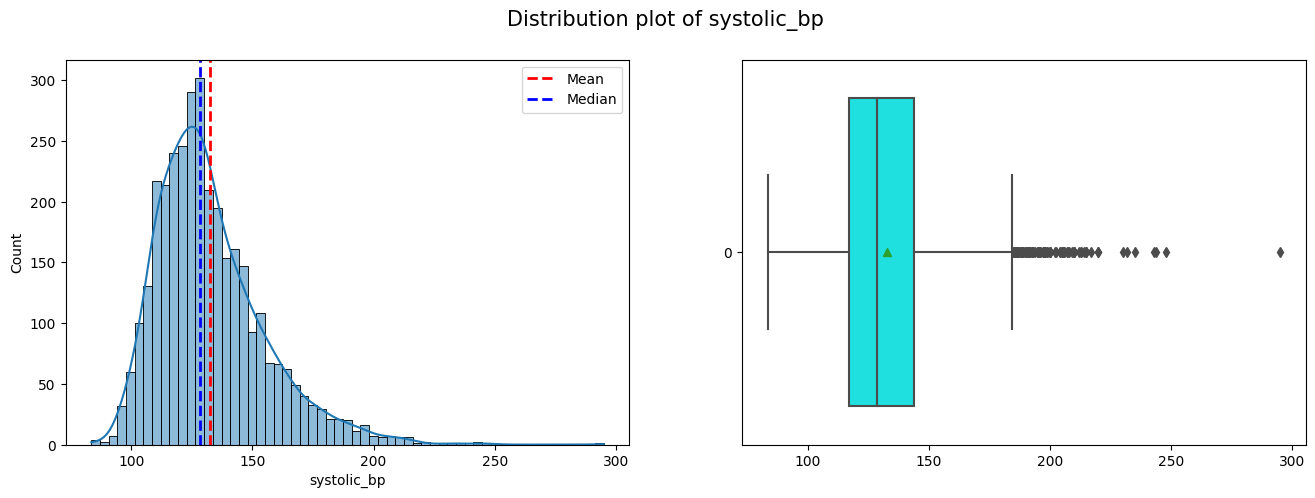

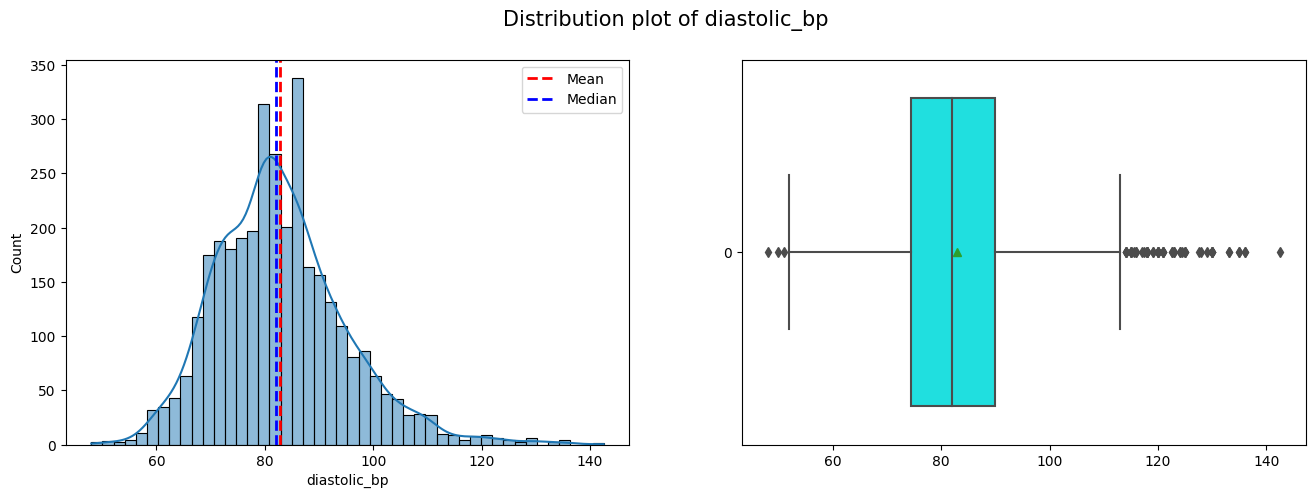

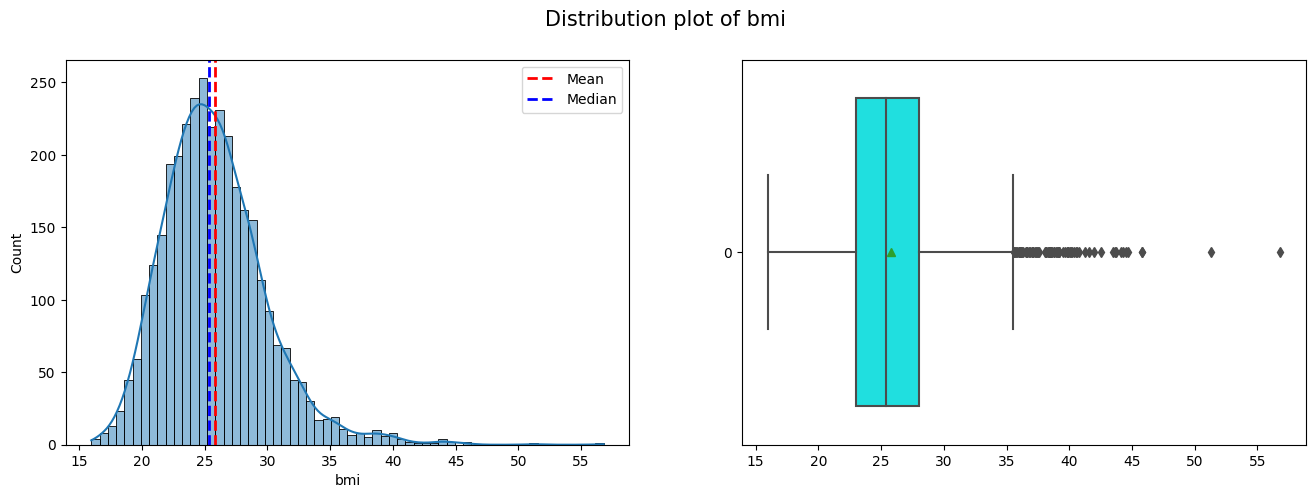

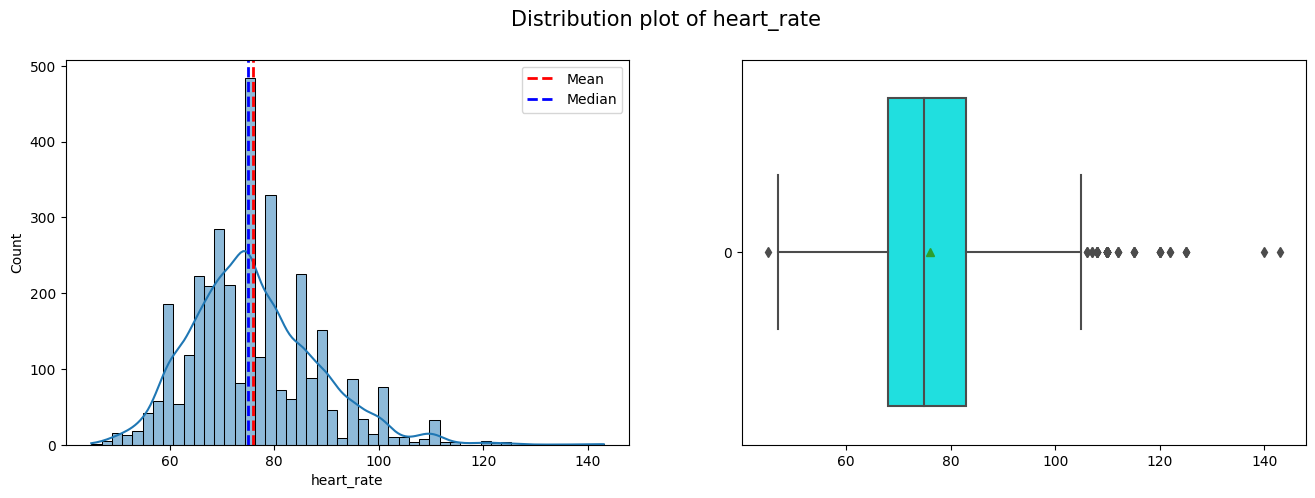

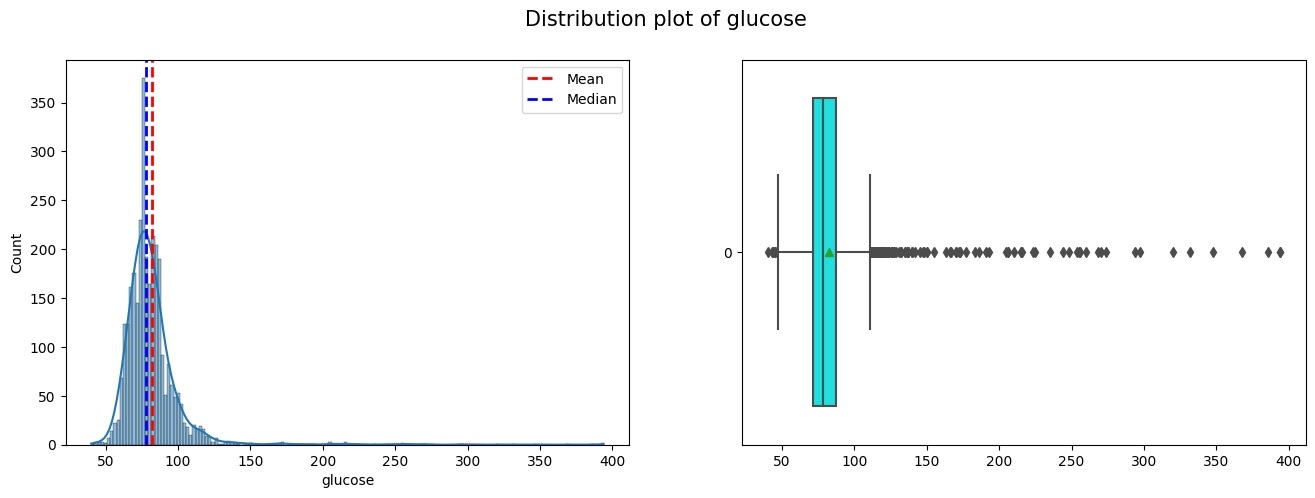

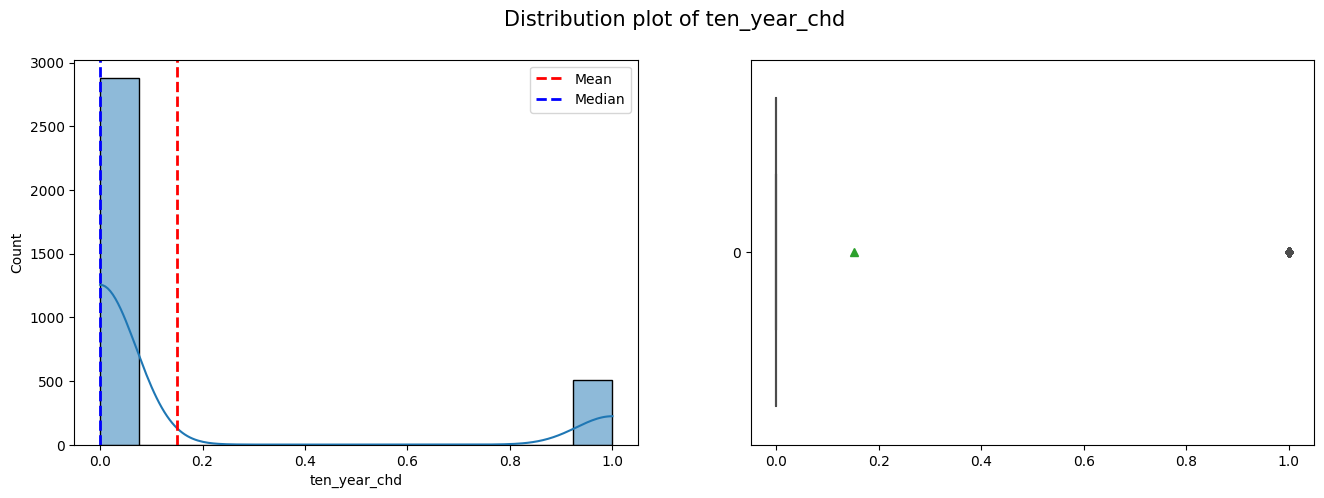

In [ ]:
# Chart - 2 visualization code
# Visualizing code of histogram plot & boxplot for each column to know the data distribution
for col in clas.describe().columns:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

    # Histogram with mean and median lines
    sns.histplot(clas[col], ax=axes[0], kde=True)
    axes[0].axvline(clas[col].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
    axes[0].axvline(clas[col].median(), color='blue', linestyle='dashed', linewidth=2, label='Median')
    axes[0].legend()

    # Boxplot with mean line
    sns.boxplot(clas[col], ax=axes[1], orient='h', showmeans=True, color='cyan')

    fig.suptitle("Distribution plot of " + col, fontsize=15)
    plt.show()

##### 1. Why did you pick the specific chart?

The specific charts chosen here are histogram plots and boxplots for each column, providing a visual representation of the distribution and central tendency of the numerical data. These charts help in understanding the spread, shape, and key statistics of each feature.

##### 2. What is/are the insight(s) found from the chart?

**Distribution Insights:**

* Most patients in the dataset are in the age range of 40 to 60, with the mean age being 49.54 and a minimum age of 32 and maximum of 70.
* The education level is mostly concentrated in categories 1 to 3.
* The majority of patients are non-smokers (is_smoking = 'NO') and female.
* Cigarettes per day ('cigsPerDay') have a right-skewed distribution, with a mean of 9.07 and a maximum of 70.
* Blood pressure medication ('BPMeds') and prevalent stroke ('prevalentStroke') are infrequent, while prevalent hypertension ('prevalentHyp') is more common.
* The distribution of total cholesterol ('totChol'), systolic blood pressure ('sysBP'), diastolic blood pressure ('diaBP'), BMI, heart rate, and glucose levels varies.

**Summary Statistics:**
* The mean and standard deviation provide insights into the central tendency and spread of the numerical features.
* For example, the mean BMI is 25.79 with a standard deviation of 4.12.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can positively impact business decisions in healthcare. Understanding the distribution of risk factors and patient characteristics allows for targeted interventions and personalized healthcare strategies. For instance, focusing on preventive measures for patients with high-risk factors.
Insights leading to negative growth?

**Negative Insight/Concern:** One potential concern could be the high maximum value for 'totChol' (total cholesterol) at 696, which seems unusually high. Such extreme values might indicate data entry errors or outliers that could impact the accuracy of predictive models. Addressing and validating these outliers is crucial to ensure the reliability of insights and prevent negative impact on decision-making.

#### Chart - 3

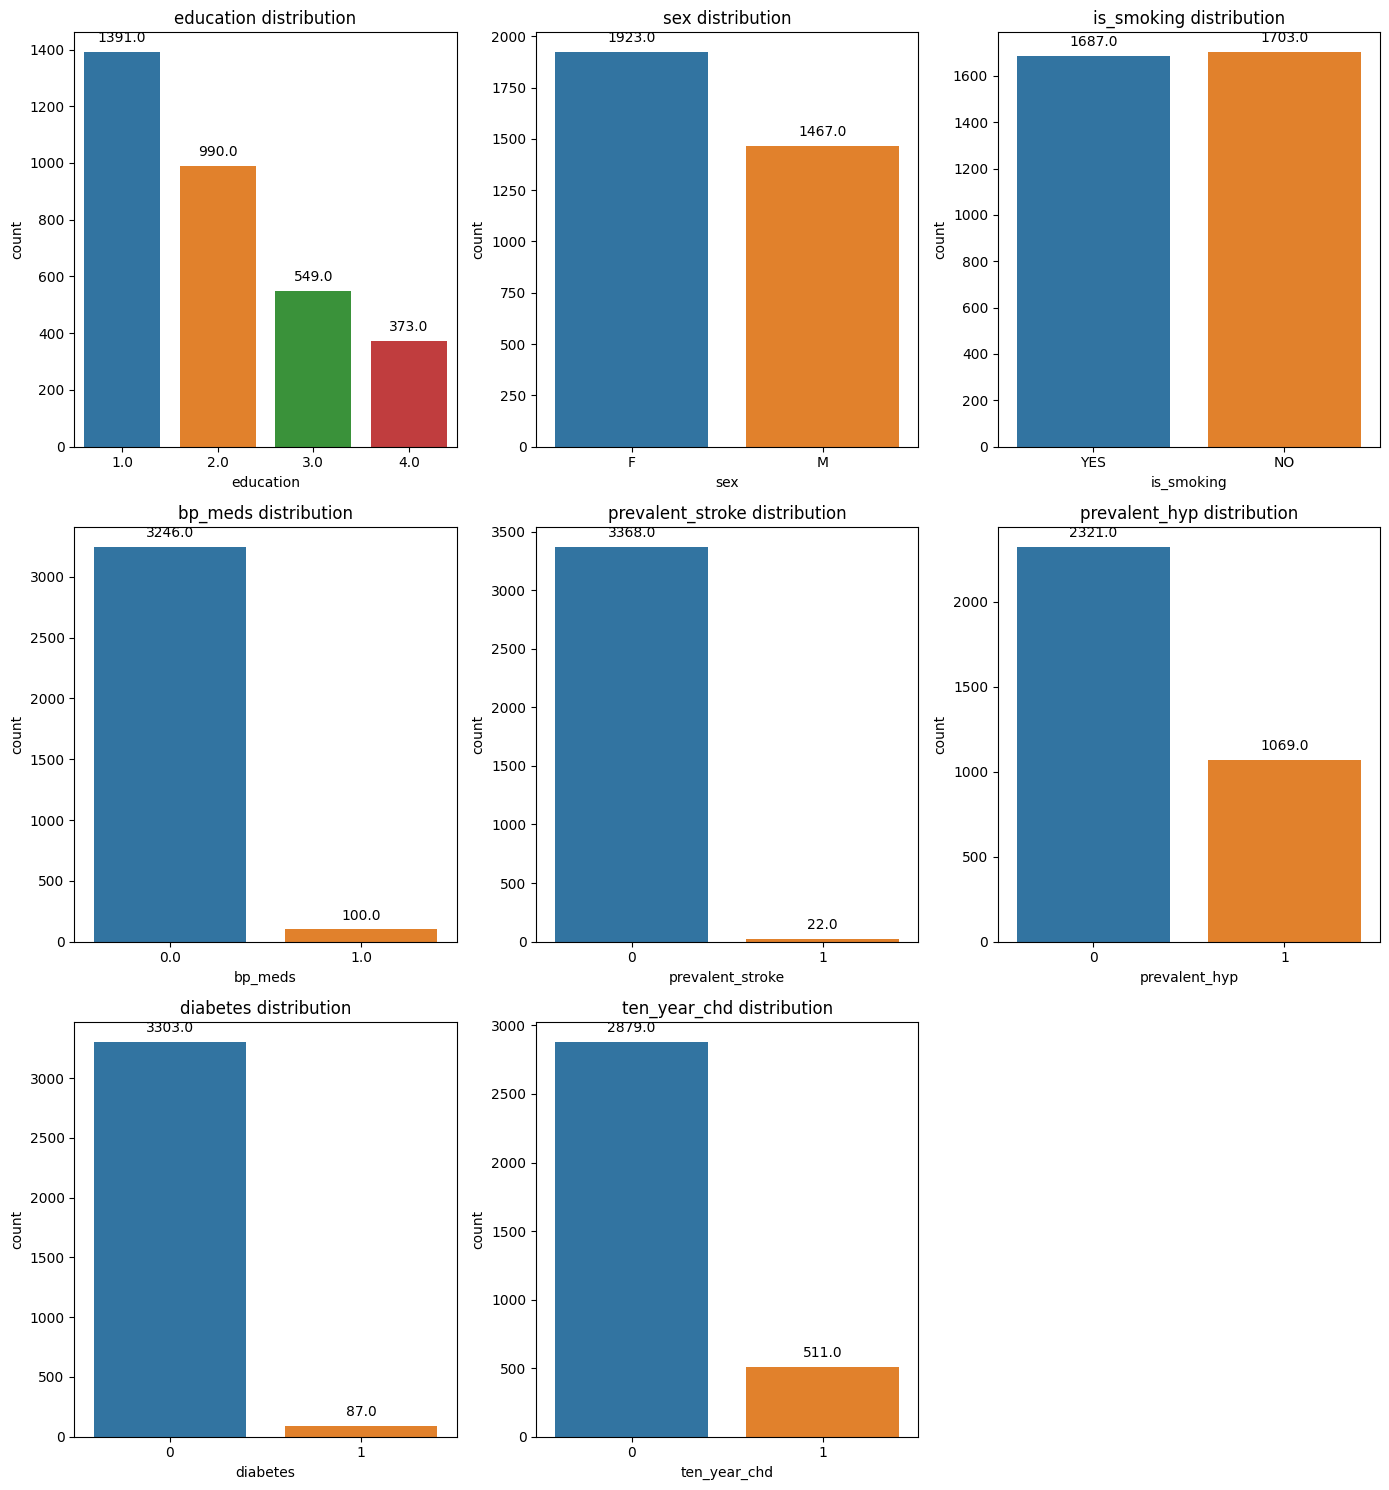

In [ ]:
# Analysing the distribution of categorical variables in the dataset
import math

# Calculate the number of rows needed based on the number of categorical variables
num_vars = len(categorical_var)
num_cols = 3
num_rows = math.ceil(num_vars / num_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 5 * num_rows))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate through categorical variables
for i, cat_var in enumerate(categorical_var):
    plt.sca(axes[i])
    p = sns.countplot(x=cat_var, data=clas)
    plt.xlabel(cat_var)
    plt.title(cat_var + ' distribution')

    # Annotate each bar with the count
    for bar in p.patches:
        plt.annotate(f'{bar.get_height()}', (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Hide any empty subplots
for j in range(len(categorical_var), len(axes)):
    axes[j].axis('off')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose countplots because they are effective for visualizing the distribution of categorical variables. The count of each category is displayed, providing a quick overview of the dataset's categorical composition.

##### 2. What is/are the insight(s) found from the chart?

**Distribution Insights:**
The countplots display the distribution of each categorical variable, offering insights into the prevalence of different categories.
For example, you can observe the gender distribution, smoking habits, and other categorical characteristics.

**Frequency of Categories:**
The counts annotated on each bar provide a clear understanding of the frequency of each category within a variable.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can positively impact business decisions, especially in healthcare. Understanding the distribution of categorical variables allows for targeted interventions and tailored healthcare strategies. For instance, identifying the prevalence of certain risk factors or lifestyle choices can guide health promotion programs.

#### Chart - 4

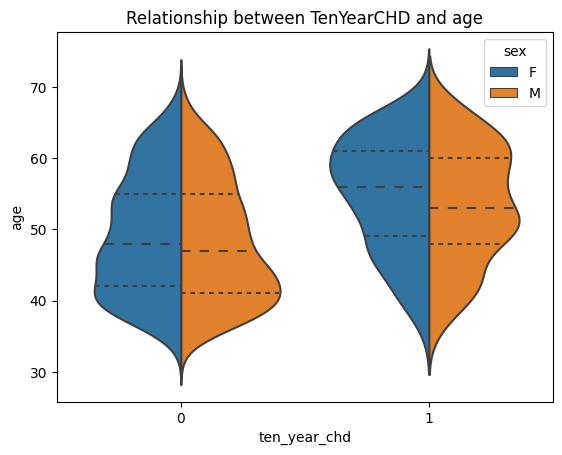

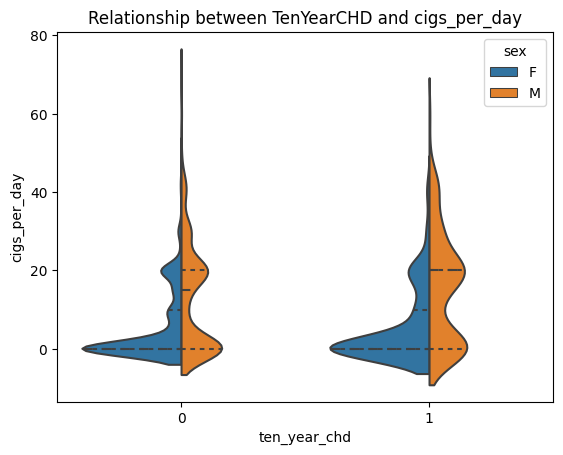

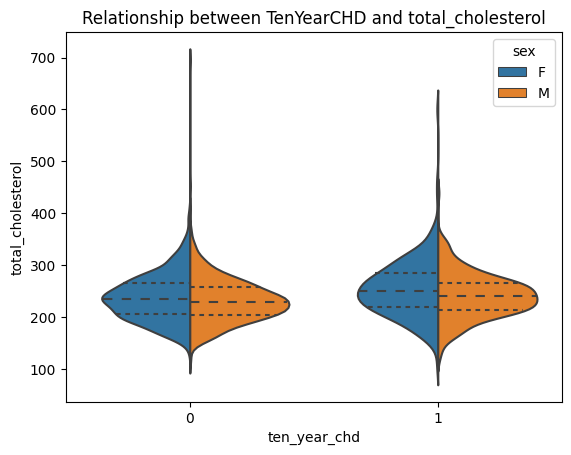

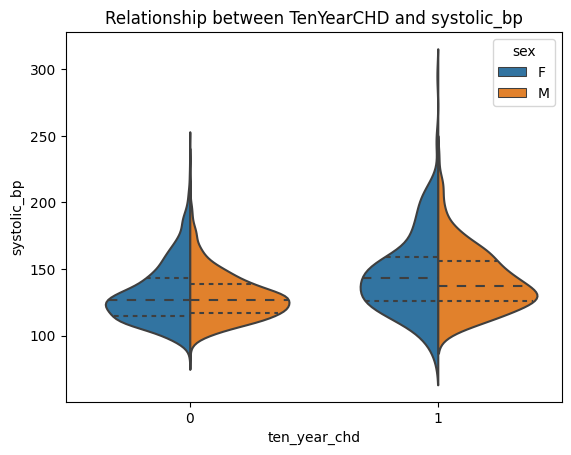

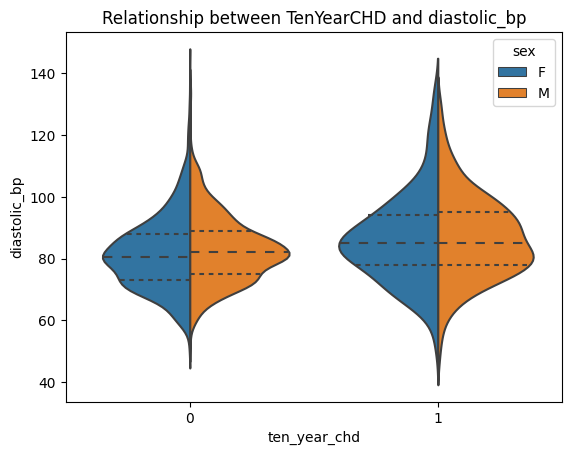

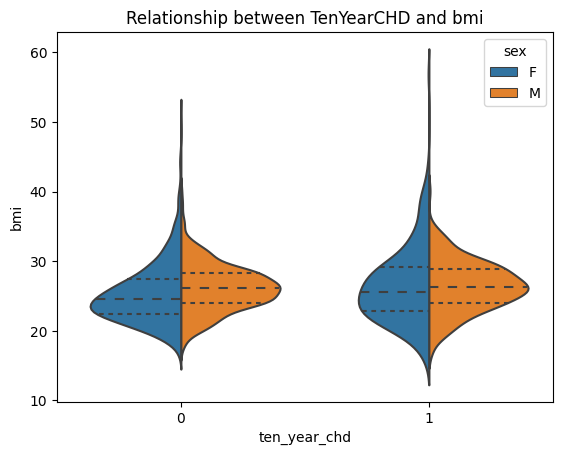

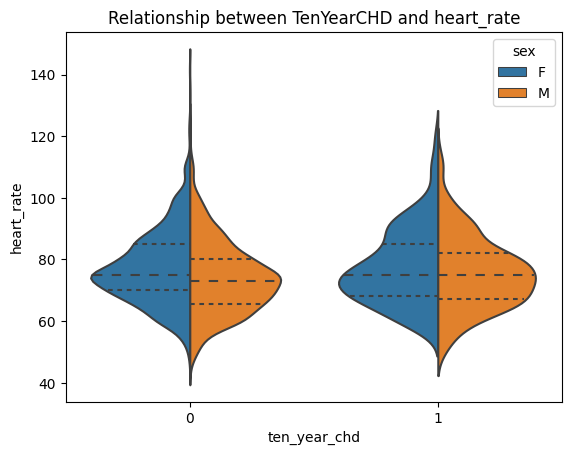

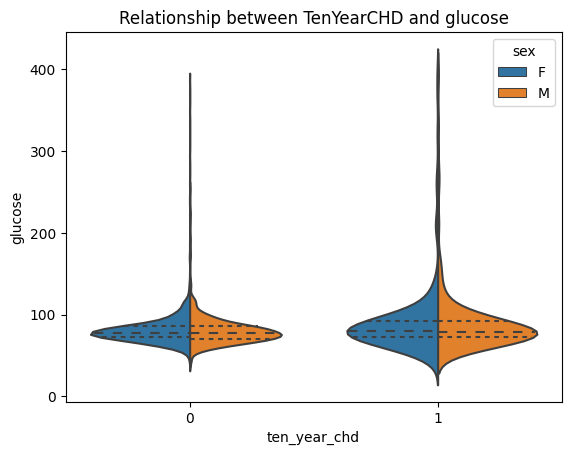

In [ ]:
# Chart - 4 visualization code
# Relationship between the dependent variable and continuous independent variables with the help of catplot named violinplot
for i in continuous_var:
    sns.violinplot(data=clas, x="ten_year_chd", y=i, hue="sex", split=True, inner="quart")
    plt.title(f'Relationship between TenYearCHD and {i}')
    plt.show()

##### 1. Why did you pick the specific chart?

The specific chart used here is a violin plot. A violin plot is suitable for visualizing the distribution of a continuous variable across different categories, in this case, the relationship between the dependent variable ("TenYearCHD") and each continuous independent variable. The use of hue and split allows for additional insights by incorporating the "sex" variable.

##### 2. What is/are the insight(s) found from the chart?

* **Distribution Insights:**
The violin plots show the distribution of each continuous variable for different categories of the dependent variable ("TenYearCHD").
Patterns in the shape of the violins can indicate how the distribution of the continuous variable varies with the target variable.

* **Sex-Based Comparison:**
The split violins based on "sex" allow for a comparison between male and female distributions within each category of the dependent variable.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can positively impact business decisions in healthcare. Understanding how continuous variables are distributed concerning the risk of coronary heart disease ("TenYearCHD") can guide targeted interventions. For instance, identifying differences in distributions between males and females may help in tailoring preventive strategies for specific demographic groups.

**No negative growth insights** are apparent from the provided information. However, it's essential to interpret the results cautiously. If the distribution of certain continuous variables significantly differs between high and low-risk groups for heart disease, it could highlight areas for targeted interventions.

#### Chart - 5

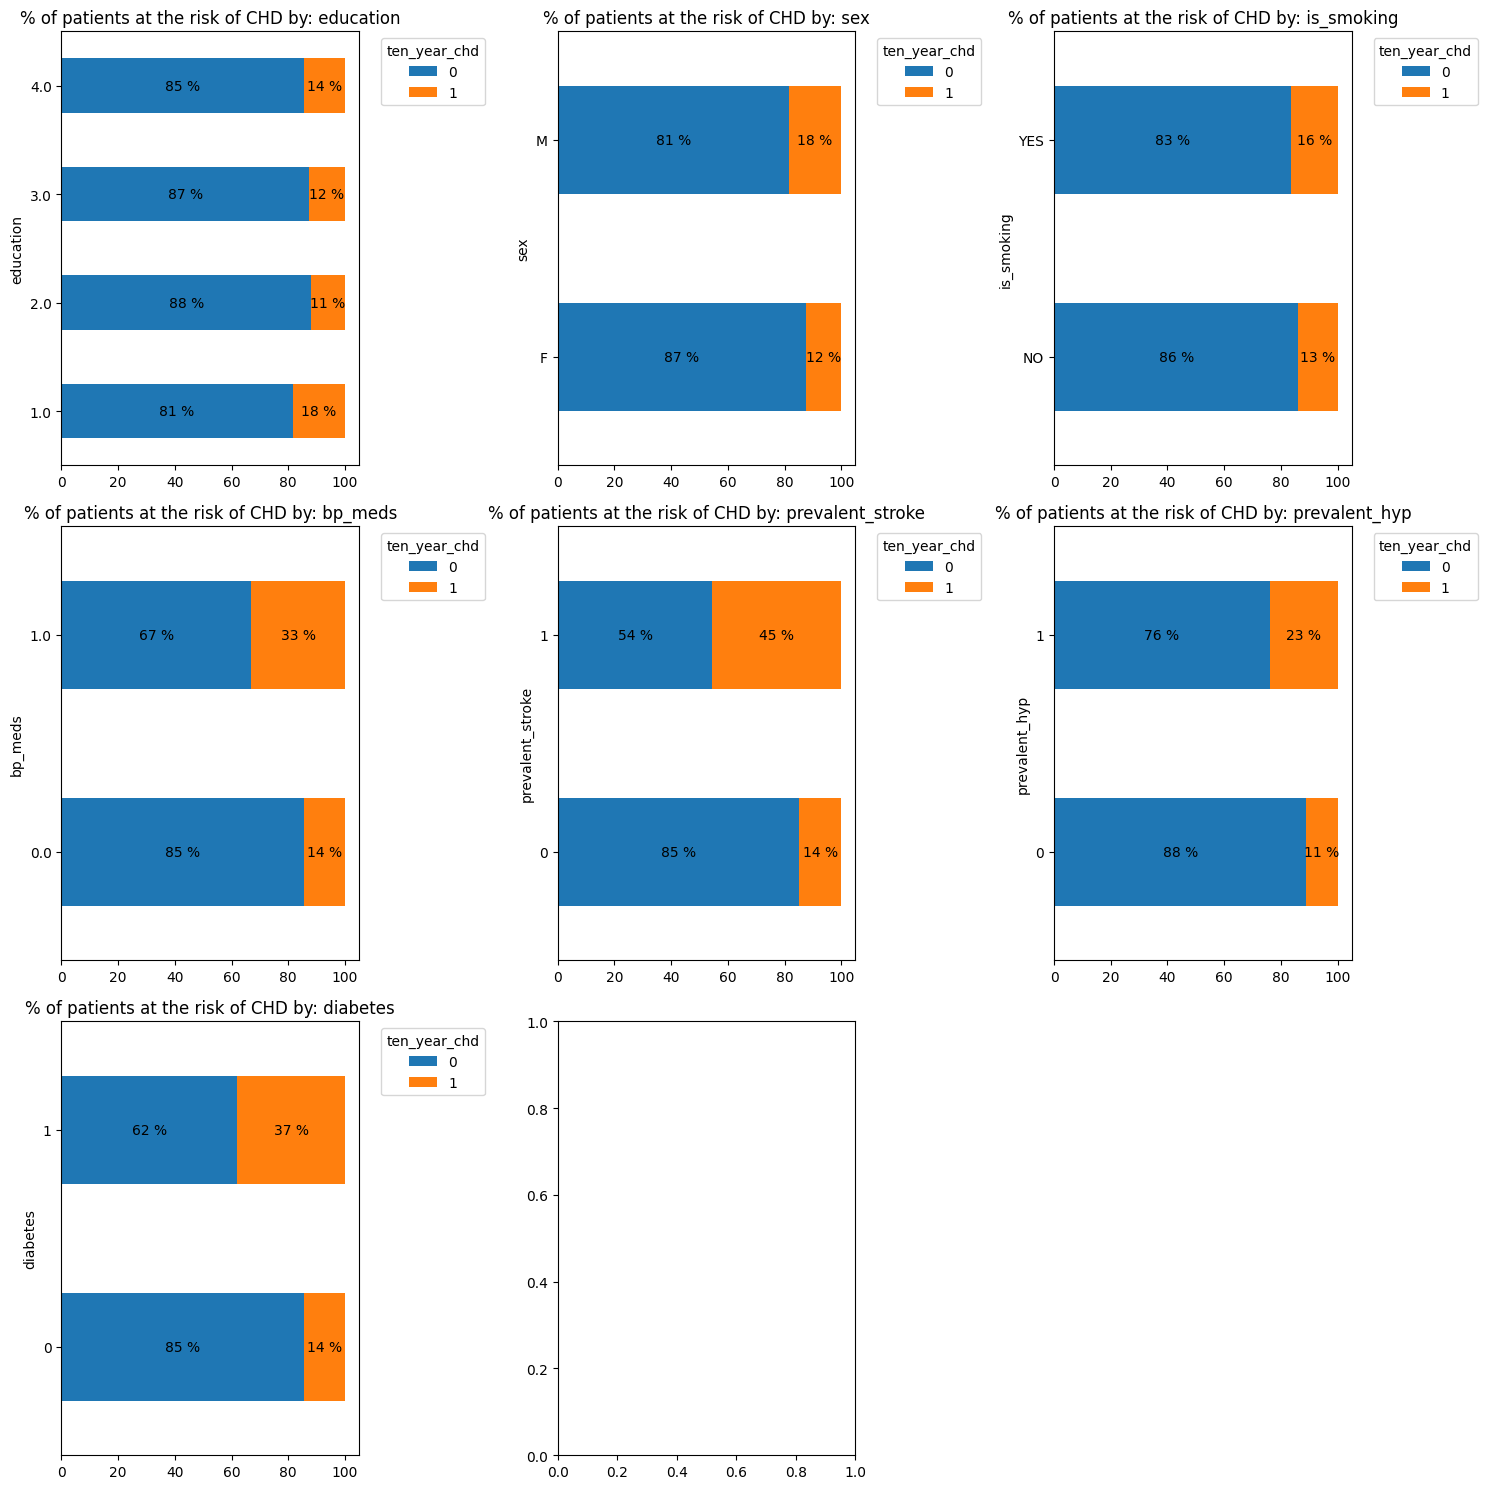

In [ ]:
# Chart - 5 visualization code
# 100% stacked bar chart

# Calculate the number of rows needed based on the number of categorical variables
num_rows = (len(categorical_var) - 1) // 3 + 1

# Create subplots with 3 columns
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over categorical variables
for i, ax in zip(categorical_var[:-1], axes):
    x_var, y_var = i, dependent_var[0]

    # Calculate percentage and create 100% stacked bar chart
    df_grouped = clas.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var) * 100
    df_grouped.plot.barh(stacked=True, ax=ax)

    ax.legend(
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        title=y_var
    )

    ax.set_title("% of patients at the risk of CHD by: " + i)

    for ix, row in df_grouped.reset_index(drop=True).iterrows():
        cumulative = 0
        for element in row:
            if element > 0.1:
                ax.text(
                    cumulative + element / 2,
                    ix,
                    f"{int(element)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
# Hide any empty subplots
for j in range(len(categorical_var), len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlap and show plot
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart chosen is a 100% stacked bar chart. This type of chart is effective for visualizing the percentage distribution of categorical variables concerning a binary outcome, in this case, the risk of coronary heart disease (CHD). The stacked bars show the composition of each category, providing a clear comparison of the proportions.

##### 2. What is/are the insight(s) found from the chart?

**Risk Distribution Insights:**
* The chart displays the distribution of patients at risk of CHD across different categories of each categorical variable.
* Each bar represents 100%, and the segments show the percentage of patients at risk and not at risk within each category.

**Comparative Analysis:**
* The chart allows for a visual comparison of the proportions of patients at risk for CHD across different categories of each variable.
* It provides insights into how the risk of CHD varies within different groups.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can positively impact business decisions in healthcare. Understanding how the risk of CHD is distributed across various categorical factors enables targeted interventions and personalized healthcare strategies. For instance, identifying categories with a higher proportion of patients at risk can guide preventive measures and interventions.

**No negative growth insights:** If certain categories consistently show a higher percentage of patients at risk for CHD, it may indicate areas that require focused attention and intervention.

#### Chart - 6

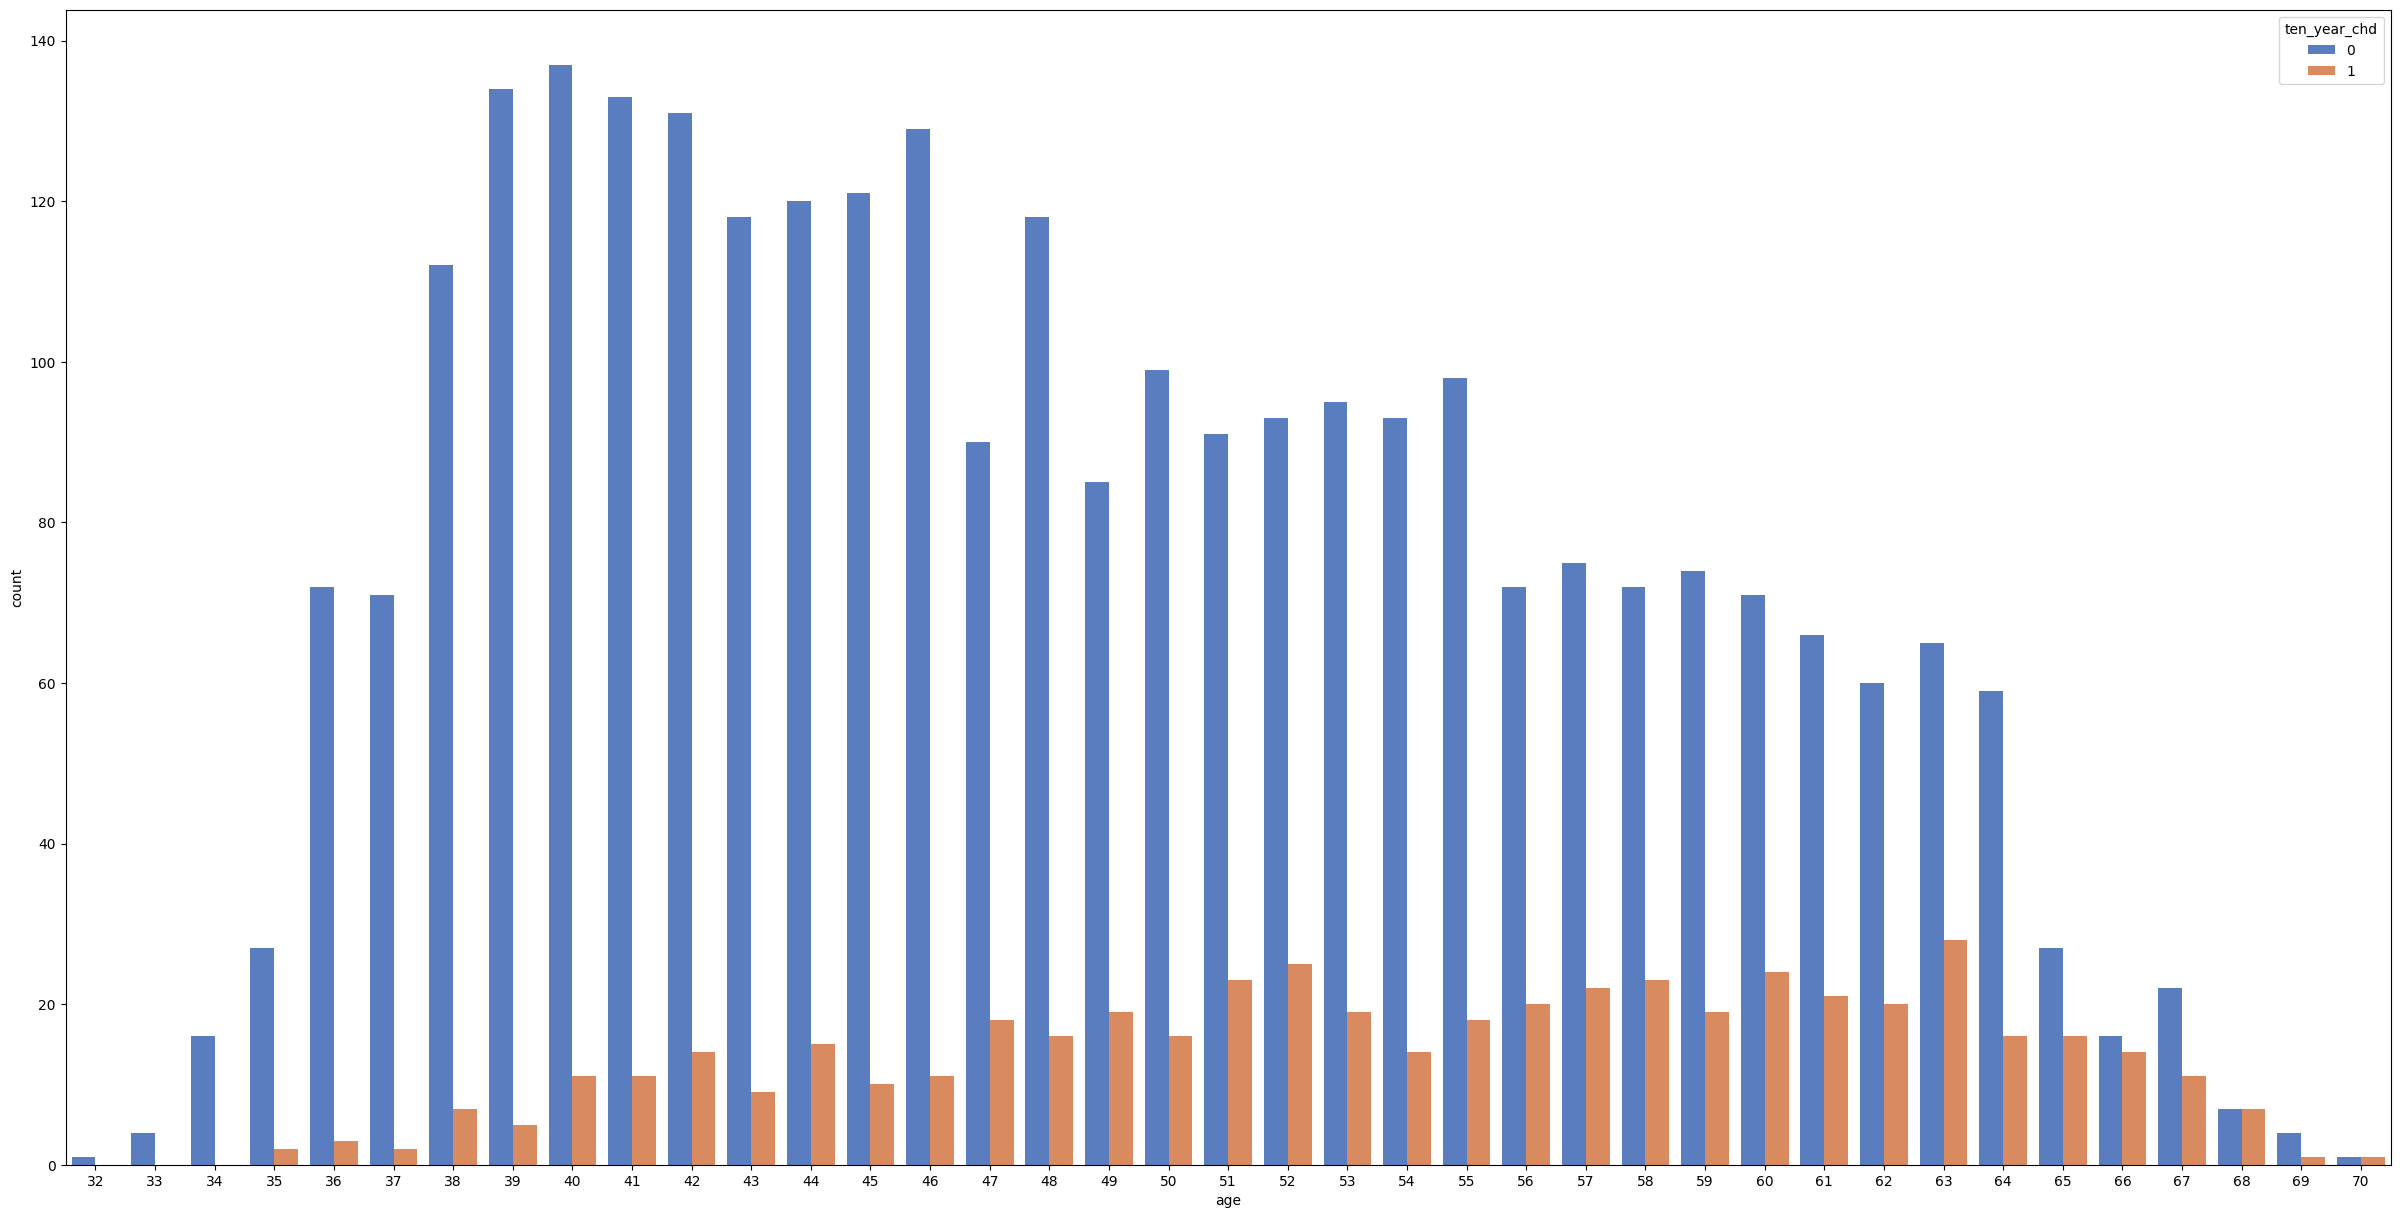

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(30,15))
sns.countplot(data=clas,x='age',hue='ten_year_chd',palette='muted')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

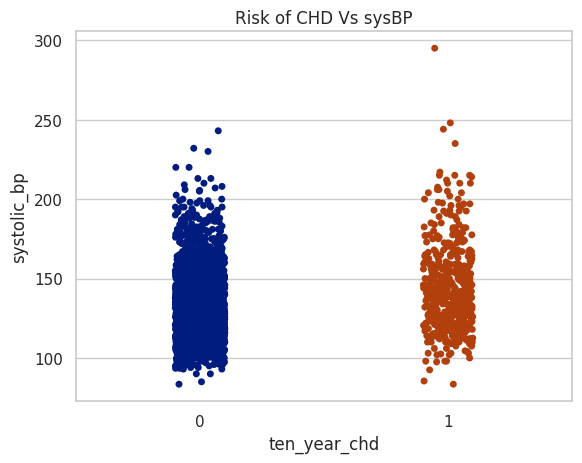

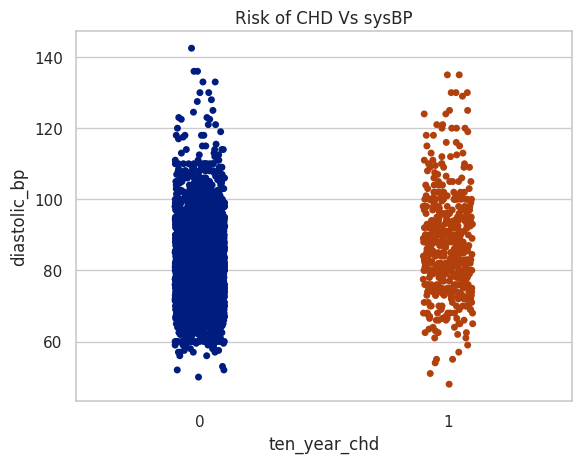

In [ ]:
# Chart - 7 visualization code
sns.set(style='whitegrid')
ax=sns.stripplot(x='ten_year_chd',y='systolic_bp',data=clas,palette='dark')
plt.title('Risk of CHD Vs sysBP')
plt.show()

sns.set(style='whitegrid')
ax=sns.stripplot(x='ten_year_chd',y='diastolic_bp',data=clas,palette='dark')
plt.title('Risk of CHD Vs sysBP')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

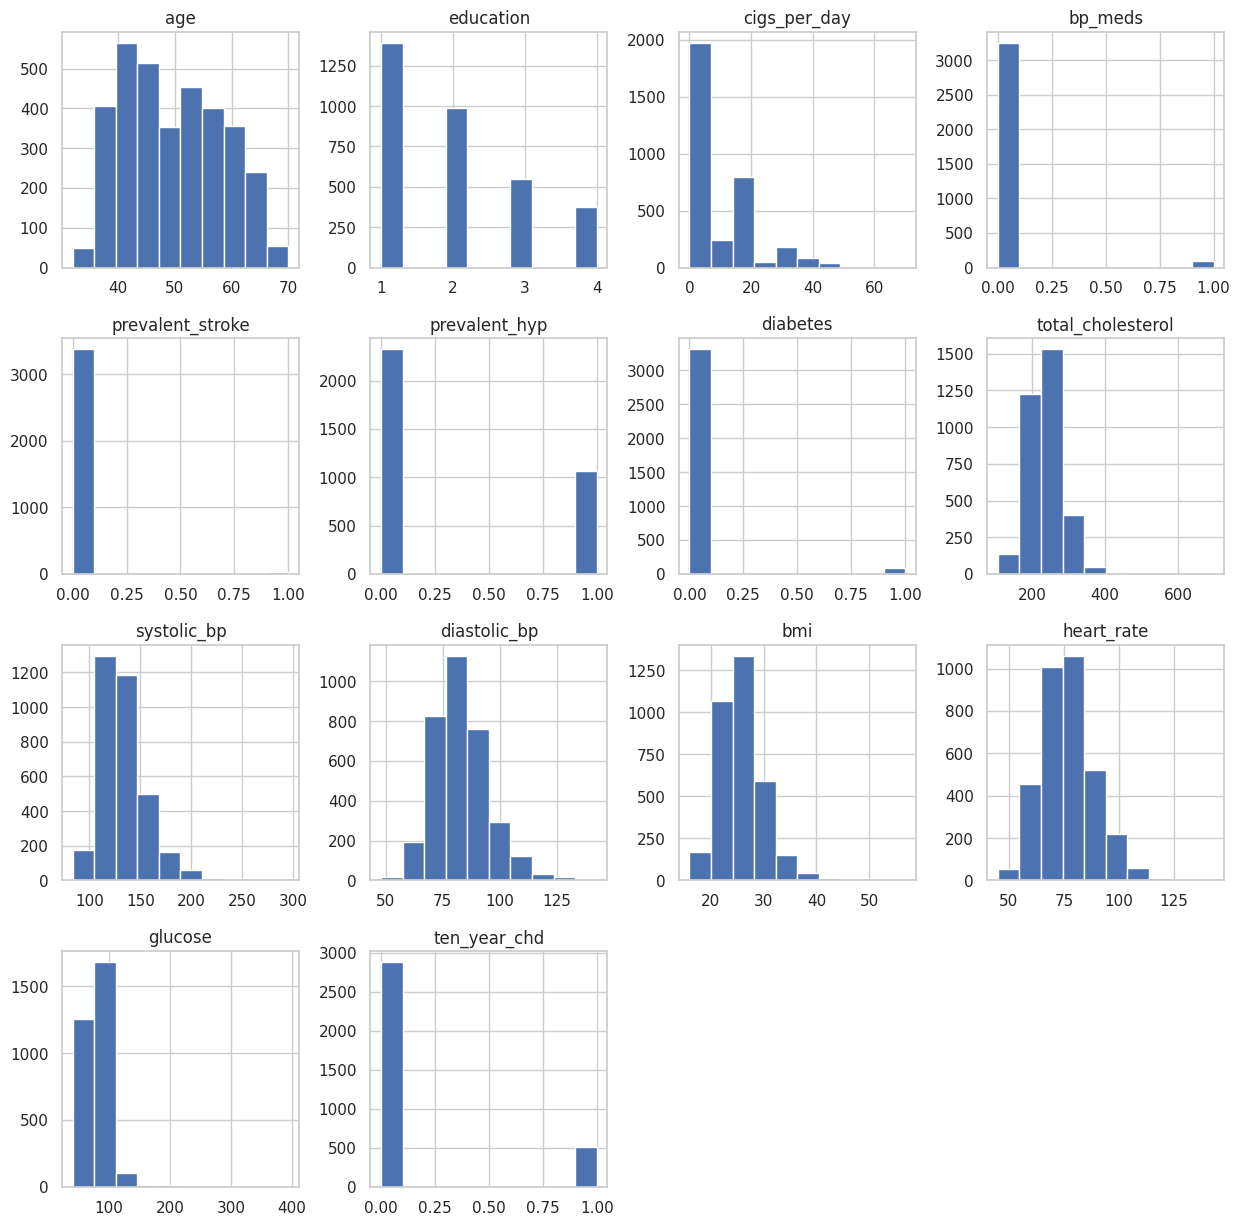

In [ ]:
# Chart - 8 visualization code
fig=plt.figure(figsize=(15,15))
ax =fig.gca()
clas.hist(ax = ax)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

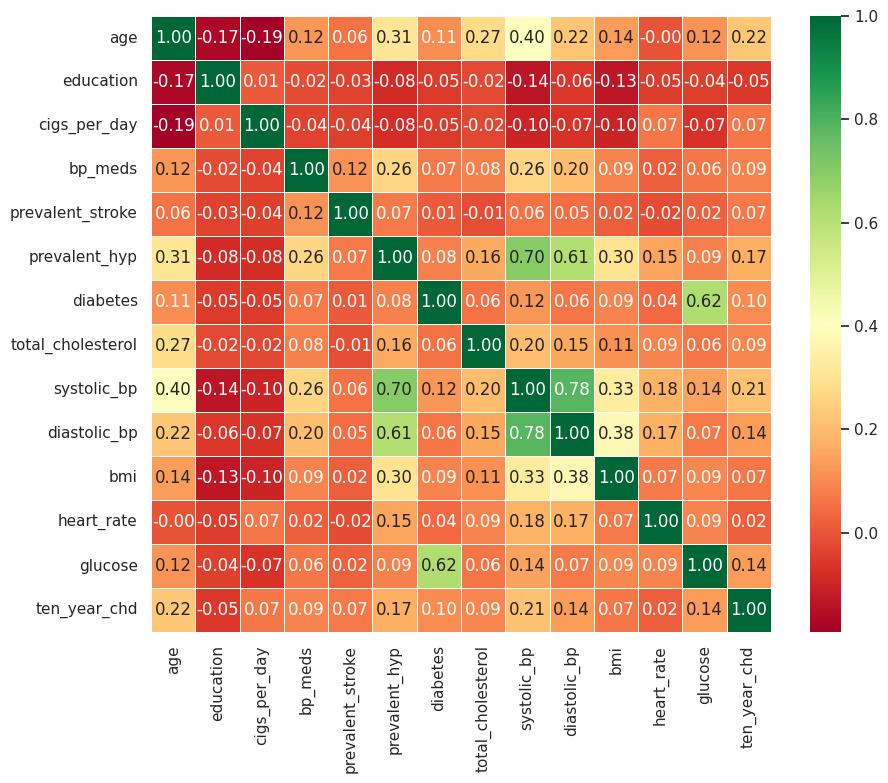

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,8))
sns.heatmap(clas.corr(),annot=True,cmap='RdYlGn', linewidths=.5,fmt='.2f')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code
#sns.pairplot(clas, hue="ten_year_chd", corner = True)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

To check whether discrete variables are related, chi2 test can be used. We define:
1. Null Hypothesis (H0): Two variables are independent.
2. Alternate Hypothesis (H1): Two variables are not independent.

We can use Chi2 test to get a p-value and check if a categorical variable is dependent or independent to the dependent variable. If the p value obtained is greater than 0.05 then we reject the null hypothesis, and accept the alternate hypothesis.

MY

The null and alternate hypotheses are framed as follows:
* Null Hypothesis (H0): There is no association or independence between the categorical variable and the dependent variable.
* Alternate Hypothesis (H1): There is an association or dependence between the categorical variable and the dependent variable.

#### 2. Perform an appropriate statistical test.

In [ ]:
# # Perform Statistical Test to obtain P-Value
# # chi2 scores
# chi_scores = chi2(clas[categorical_var], clas[dependent_var])
# chi_scores

In [ ]:
# # P values for discrete features
# p_values = pd.Series(chi_scores[1],index = clas[categorical_var].columns)
# p_values.sort_values(ascending = False , inplace = True)
# print(p_values)
# print('************************************************************************')

# # Plotting p values for chi2 test for discrete features
# plt.figure(figsize=(5,4))
# plt.xscale('log')
# plt.xlabel('P-value')
# plt.title('P-value for discrete features')
# p_values.plot.barh()

##### Which statistical test have you done to obtain P-Value?

The statistical test performed to obtain the p-values is **the chi-squared (chi2) test.**

**Observations:**
* Since prevalent hypertension column (prevalent_hyp) has the smallest p value, we can say that it is the most important feature (among the categorical independent variables) which determines  the outcome of the dependent variable.
* The is_smoking feature has the highest p-value, which indicates that it is the least important feature (among categorical independent variables).

##### Why did you choose the specific statistical test?

* The chi-squared test is chosen to assess the relationship between categorical variables. In this case, it is used to examine whether discrete variables are related.
* The chi-squared test is suitable for analyzing the independence of categorical variables, making it a pertinent choice when assessing the relationship between discrete features and the dependent variable.
* The p-values obtained from this test help determine whether to reject the null hypothesis and conclude that there is a significant association between the variables.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
''' Handling Missing Values & Missing Value Imputation
 Missing data is in considerable amount and we have mere 3990 observations,
 therefore, it needs to be treated with appropriate imputation rather than deleting them.
'''
# percentage of missing data as per category
total = clas.isnull().sum().sort_values(ascending=False)
percent_total = (clas.isnull().sum()/clas.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

Total  Percentage
glucose              304    8.967552
education             87    2.566372
bp_meds               44    1.297935
total_cholesterol     38    1.120944
cigs_per_day          22    0.648968
bmi                   14    0.412979
heart_rate             1    0.029499

In [ ]:
# total null values
clas.isna().sum().sum()

510

In [ ]:
#print(clas['glucose'].mean())
print(clas['glucose'].median())
#print(clas['total_cholesterol'].mean())
print(clas['total_cholesterol'].median(), clas['total_cholesterol'].mean().round(3))
#print(clas['bmi'].mean())
print(clas['bmi'].median())
print('----------------------------------')
print(clas['cigs_per_day'].mean())
print('----------------------------------')
print(clas['heart_rate'].mode())

# Visualizing the mode values of the categorical columns because we are replacing missing values in it with its mode
print(clas['education'].mode())
print(clas['bp_meds'].mode())


78.0
234.0 237.074
25.38
----------------------------------
9.069477434679335
----------------------------------
0    75.0
Name: heart_rate, dtype: float64
0    1.0
Name: education, dtype: float64
0    0.0
Name: bp_meds, dtype: float64


#### **Replacing the missing values in the categorical columns with the most frequent entry:**

In [ ]:
# Replacing the missing values in the categorical columns with its mode
clas['education'] = clas['education'].fillna(clas['education'].mode()[0])
clas['bp_meds'] = clas['bp_meds'].fillna(clas['bp_meds'].mode()[0])

In [ ]:
# education distribution after mode imputation
clas.education.value_counts()

1.0    1478
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

#### Missing values imputation in **cigs_per_day**

In [ ]:
# Mean and median numbers of cigarettes per day
clas.cigs_per_day.mean().round(0),clas.cigs_per_day.median()

(9.0, 0.0)

In [ ]:
# All missing values in the cigs_per_day column
clas[clas['cigs_per_day'].isna()]

age  education sex is_smoking  cigs_per_day  bp_meds  prevalent_stroke  \
422    55        1.0   F        YES           NaN      0.0                 0   
466    45        3.0   M        YES           NaN      0.0                 0   
469    42        1.0   M        YES           NaN      0.0                 0   
491    61        1.0   F        YES           NaN      0.0                 0   
538    41        1.0   F        YES           NaN      0.0                 0   
767    54        1.0   M        YES           NaN      0.0                 0   
1461   47        2.0   F        YES           NaN      0.0                 0   
1467   49        1.0   F        YES           NaN      0.0                 0   
1597   57        1.0   F        YES           NaN      0.0                 0   
1986   49        2.0   F        YES           NaN      0.0                 0   
2031   58        4.0   F        YES           NaN      0.0                 0   
2087   49        4.0   M        YES           NaN      0.0                 0   
2240   47        3.0   F        YES           NaN      0.0                 0   
2284   45        2.0   M        YES           NaN      0.0                 0   
2527   58        2.0   M        YES           NaN      0.0                 0   
2638   57        1.0   M        YES           NaN      0.0                 0   
2648   39        2.0   M        YES           NaN      0.0                 0   
2723   43        4.0   M        YES           NaN      0.0                 0   
2879   42        1.0   M        YES           NaN      0.0                 0   
2945   53        2.0   M        YES           NaN      0.0                 0   
3301   55        1.0   M        YES           NaN      0.0                 0   
3378   39        3.0   F        YES           NaN      0.0                 0   

      prevalent_hyp  diabetes  total_cholesterol  systolic_bp  diastolic_bp  \
422               1         0              213.0        163.0          91.0   
466               1         0              170.0        145.5          99.0   
469               0         0              196.0        123.0          73.0   
491               1         0              356.0        168.0          98.0   
538               0         0              171.0        135.0          82.5   
767               0         0              219.0        110.0          72.0   
1461              0         0              365.0        127.0          76.0   
1467              0         0              252.0        123.0          69.0   
1597              0         0              229.0        115.0          69.0   
1986              1         0              233.0        158.0         102.0   
2031              1         0              270.0        195.0         117.5   
2087              0         0              256.0        127.5          81.5   
2240              0         0              321.0        132.0          88.0   
2284              0         0              248.0        121.0          72.0   
2527              0         0              235.0        127.5          76.0   
2638              0         0              223.0        107.5          72.5   
2648              0         0              285.0        121.0          82.0   
2723              0         0              222.0        109.5          69.0   
2879              0         0              226.0        119.0          80.0   
2945              0         0              276.0        130.0          86.0   
3301              0         0              214.0        132.5          85.5   
3378              0         0              197.0        126.5          76.5   

        bmi  heart_rate  glucose  ten_year_chd  
422   28.66        69.0     66.0             0  
466   26.74        83.0     85.0             0  
469   22.06        66.0      NaN             0  
491   27.30       103.0    106.0             0  
538   24.35        79.0     82.0             0  
767   26.05        95.0     86.0             0  
1461

It is observed that the missing value of the **cigs per day for all entries** has the **'is smoking'** column as **YES** means that they smoke.

Let's check the mean and median number of cigarettes smoked by patients, who reported that they smoke.

In [ ]:
# mean and median numbers of cigarettes per day for a SMOKERS (excluding non-smokers)
clas[clas['is_smoking']=='YES']['cigs_per_day'].mean().round(3),clas[clas['is_smoking']=='YES']['cigs_per_day'].median()

(18.346, 20.0)

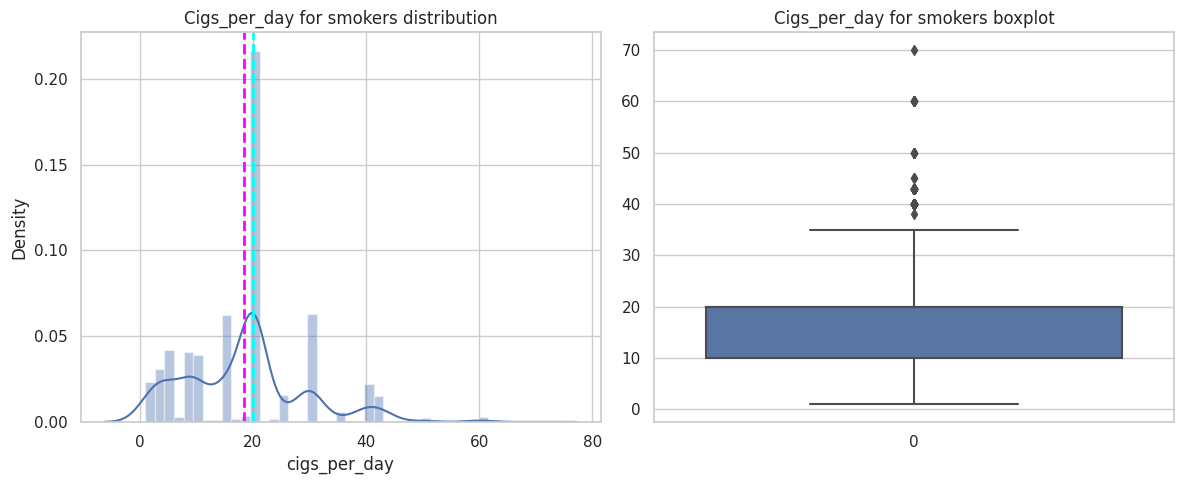

In [ ]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Distribution of number of cigarettes per day for smokers (excluding non-smokers)
sns.distplot(clas[clas['is_smoking'] == 'YES']['cigs_per_day'], ax=axes[0])
axes[0].axvline(clas[clas['is_smoking'] == 'YES']['cigs_per_day'].mean(), color='magenta', linestyle='dashed', linewidth=2)
axes[0].axvline(clas[clas['is_smoking'] == 'YES']['cigs_per_day'].median(), color='cyan', linestyle='dashed', linewidth=2)
axes[0].set_title('Cigs_per_day for smokers distribution')

# Boxplot for the number of cigarettes per day for smokers (excluding non-smokers)
sns.boxplot(clas[clas['is_smoking'] == 'YES']['cigs_per_day'], ax=axes[1])
axes[1].set_title('Cigs_per_day for smokers boxplot')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

**Since the number of cigarettes smoked by the patients who smoke contains outliers, the missing values in ths cigs_per_day column can be imputed with its median value. Because median is not sensitive to outliers like mean.**

In [ ]:
# Imputing the missing values in the cigs_per_day
clas['cigs_per_day'] = clas['cigs_per_day'].fillna(clas[clas['is_smoking']=='YES']['cigs_per_day'].median())

##### Cross Column Dependency:

In [ ]:
# Checking for any wrong entries where the patient is not a smoker
# and cigarettes per day above 0

clas[(clas['is_smoking']==0) & (clas['cigs_per_day']>0)]

Empty DataFrame
Columns: [age, education, sex, is_smoking, cigs_per_day, bp_meds, prevalent_stroke, prevalent_hyp, diabetes, total_cholesterol, systolic_bp, diastolic_bp, bmi, heart_rate, glucose, ten_year_chd]
Index: []

In [ ]:
# Checking for any wrong entries where the patient is a smoker
# and cigarettes per day is 0

clas[(clas['is_smoking']==1) & (clas['cigs_per_day']==0)]

Empty DataFrame
Columns: [age, education, sex, is_smoking, cigs_per_day, bp_meds, prevalent_stroke, prevalent_hyp, diabetes, total_cholesterol, systolic_bp, diastolic_bp, bmi, heart_rate, glucose, ten_year_chd]
Index: []

**There are no errors in these columns.**

#### Missing value imputation in **total_cholestrol, bmi, heart_rate:**

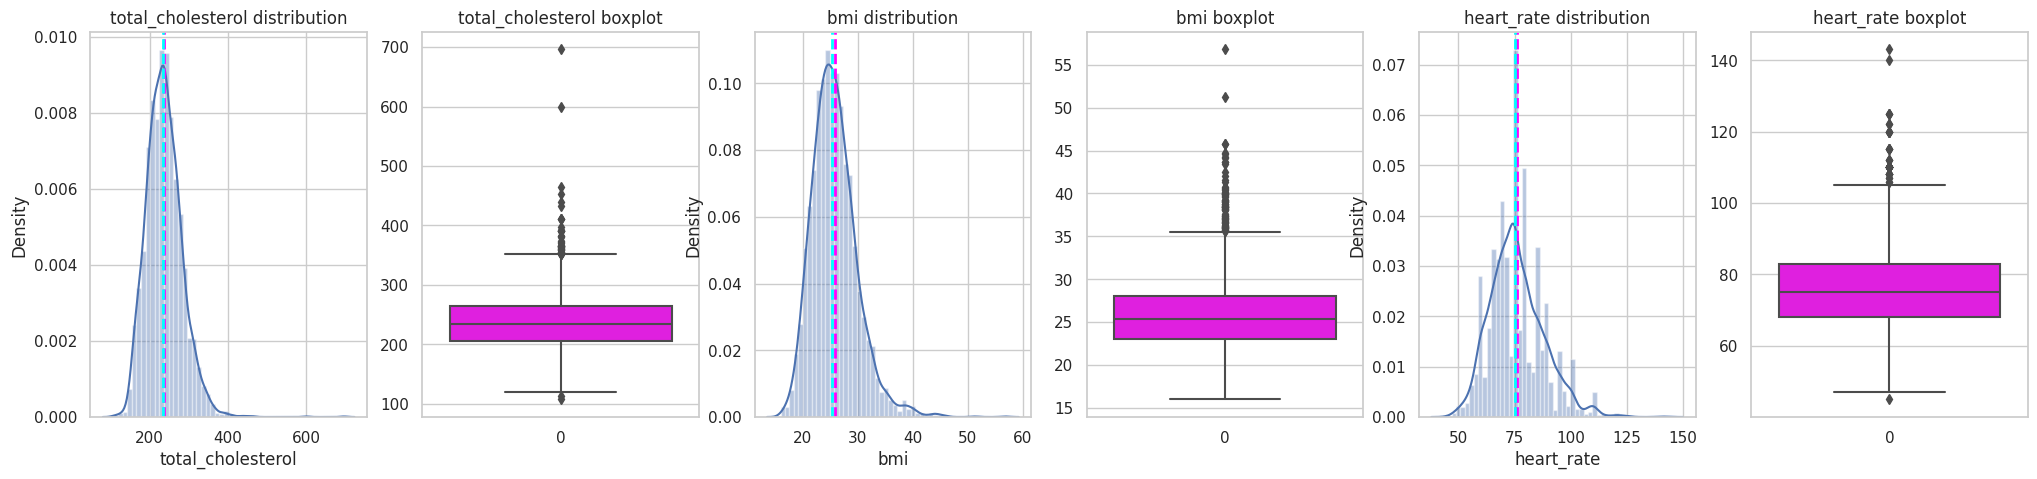

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with three subplots
fig, axes = plt.subplots(1, 6, figsize=(25, 5))

# Checking the distribution and boxplot for total_cholesterol, bmi, and heart_rate
variables = ['total_cholesterol', 'bmi', 'heart_rate']

for i, variable in enumerate(variables):
    # Distribution Plot
    sns.distplot(clas[variable], ax=axes[i * 2])
    axes[i * 2].axvline(clas[variable].mean(), color='magenta', linestyle='dashed', linewidth=2)
    axes[i * 2].axvline(clas[variable].median(), color='cyan', linestyle='dashed', linewidth=2)
    axes[i * 2].set_title(f'{variable} distribution')

    # Boxplot
    sns.boxplot(clas[variable], ax=axes[i * 2 + 1], color='magenta')
    axes[i * 2 + 1].set_title(f'{variable} boxplot')

plt.show()

**Since the above distribution plot and boxplot for total_cholestrol, bmi, and heart_rate columns shows that they are positively/rightward skewed, and also contains outliers.**

In [ ]:
# Variables to loop through
variables = ['total_cholesterol', 'bmi', 'heart_rate']

# Loop through each variable and print mean and median
for var in variables:
    mean_val = clas[var].mean()
    median_val = clas[var].median()

    print(f"Mean and median for {var}: {mean_val}, {median_val}")

Mean and median for total_cholesterol: 237.07428400954655, 234.0
Mean and median for bmi: 25.7949644549763, 25.38
Mean and median for heart_rate: 75.97727943346119, 75.0


**The total_cholestrol, bmi, and heart_rate columns contain outliers. We can impute the missing values with its median.**

In [ ]:
# Imputing missing values in the total_cholesterol, bmi, and heart_rate with their medain values because of outlier presence.
clas['total_cholesterol'] = clas['total_cholesterol'].fillna(clas['total_cholesterol'].median())
clas['bmi'] = clas['bmi'].fillna(clas['bmi'].median())
clas['heart_rate'] = clas['heart_rate'].fillna(clas['heart_rate'].median())

#### Missing values imputation in **glucose:**

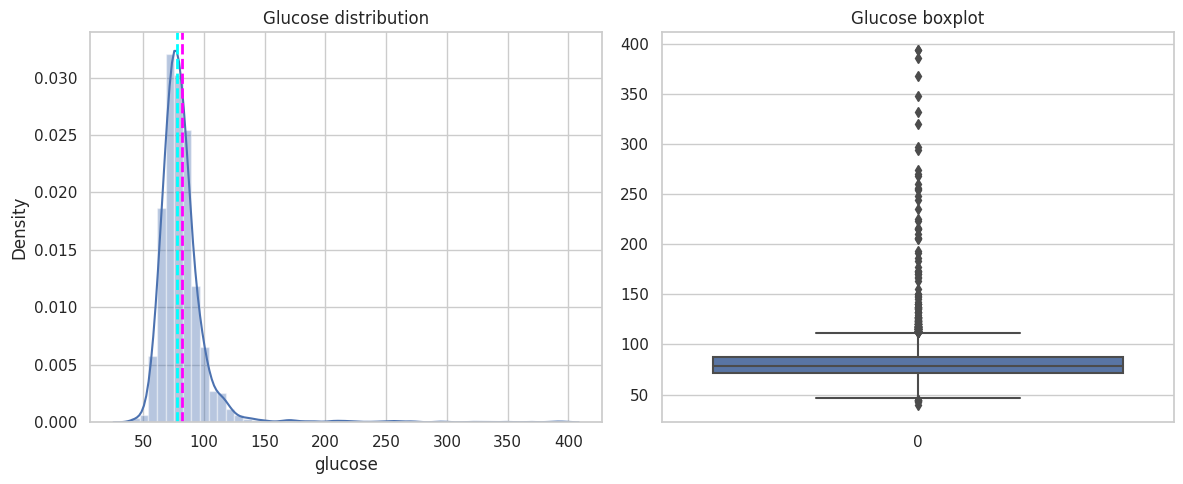

In [ ]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Distribution of glucose
sns.distplot(clas['glucose'], ax=axes[0])
axes[0].axvline(clas['glucose'].mean(), color='magenta', linestyle='dashed', linewidth=2)
axes[0].axvline(clas['glucose'].median(), color='cyan', linestyle='dashed', linewidth=2)
axes[0].set_title('Glucose distribution')

# Visualizing Outliers in glucose
sns.boxplot(clas['glucose'], ax=axes[1])
axes[1].set_title('Glucose boxplot')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

**Since the above distribution plot and boxplot for glucose column shows that they are positively/rightward skewed, and also contains outliers.**

In [ ]:
# Mean, median, and mode for glucose
clas.glucose.mean(),clas.glucose.median(),clas.glucose.mode()

(82.08651976668827,
 78.0,
 0    75.0
 Name: glucose, dtype: float64)

* The **distribution exhibits positive/rightward skewness and includes outliers**.
* The glucose column contains **304** missing values. **Opting to impute them with a singular mean or median value would introduce significant bias.**
* To mitigate this, an alternative approach is to utilize **a KNN imputer** for handling the missing values.
* In the context of **a time series dataset**, **interpolation** could have been employed as a method to impute missing values. Interpolation methods, such as linear or spline interpolation, take advantage of **trends or seasonality** patterns to estimate missing values based on the observed values.
* However, in the absence of temporal structure, other methods like KNN imputation may be more appropriate. **KNN imputation** considers the **similarity between data points** to impute missing values, making it a more data-driven approach.


In [ ]:
# Separate numerical columns
continuous_var = clas.select_dtypes(include=['float64']).columns

# Apply KNNImputer to numerical columns
imputer = KNNImputer(n_neighbors=10)
numerical_imputed = imputer.fit_transform(clas[continuous_var])
clas[continuous_var] = pd.DataFrame(numerical_imputed, columns=continuous_var)

In [ ]:
# mean, median, and mode for glucose after knn imputation
clas.glucose.mean(),clas.glucose.median(),clas.glucose.mode()

(82.04392330383482,
 78.0,
 0    75.0
 Name: glucose, dtype: float64)

**After KNN imputation, We can see that there is no massive change in the values of mean. And the values of median and mode remain the same.**

In [ ]:
clas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3390 non-null   int64  
 1   education          3390 non-null   float64
 2   sex                3390 non-null   object 
 3   is_smoking         3390 non-null   object 
 4   cigs_per_day       3390 non-null   float64
 5   bp_meds            3390 non-null   float64
 6   prevalent_stroke   3390 non-null   int64  
 7   prevalent_hyp      3390 non-null   int64  
 8   diabetes           3390 non-null   int64  
 9   total_cholesterol  3390 non-null   float64
 10  systolic_bp        3390 non-null   float64
 11  diastolic_bp       3390 non-null   float64
 12  bmi                3390 non-null   float64
 13  heart_rate         3390 non-null   float64
 14  glucose            3390 non-null   float64
 15  ten_year_chd       3390 non-null   int64  
dtypes: float64(9), int64(5),

In [ ]:
# changing datatypes
clas = clas.astype({'age': int,'education':int,'sex':object,'is_smoking':object,'cigs_per_day':int,
               'bp_meds':int,'prevalent_stroke':int,'prevalent_hyp':int,'diabetes':int,
               'total_cholesterol':float,'systolic_bp':float,'diastolic_bp':float,
               'bmi':float,'heart_rate':float,'glucose':float,'ten_year_chd':int})

In [ ]:
# checking for missing values if any
clas.isna().sum().sum()

0

#### What all missing value imputation techniques have you used and why did you use those techniques?

* I have used median, mode and KNN imputation techniques to handle missing values in the dataset. I chose to use these techniques because they are appropriate for the nature of the data and the specific problem at hand.

For example:
* I used median imputation for numerical variables that were skewed, as it is a robust measure of central tendency that is not affected by outliers.

* I used mode imputation for categorical variables, as it is the most common value and can be a good estimate for missing values.

* I also used KNN imputation, which works by finding similar observations in the dataset and using their values to impute missing values. This technique can be useful when there are patterns or relationships in the data that can be leveraged to make more accurate imputations.

### 2. Handling Outliers

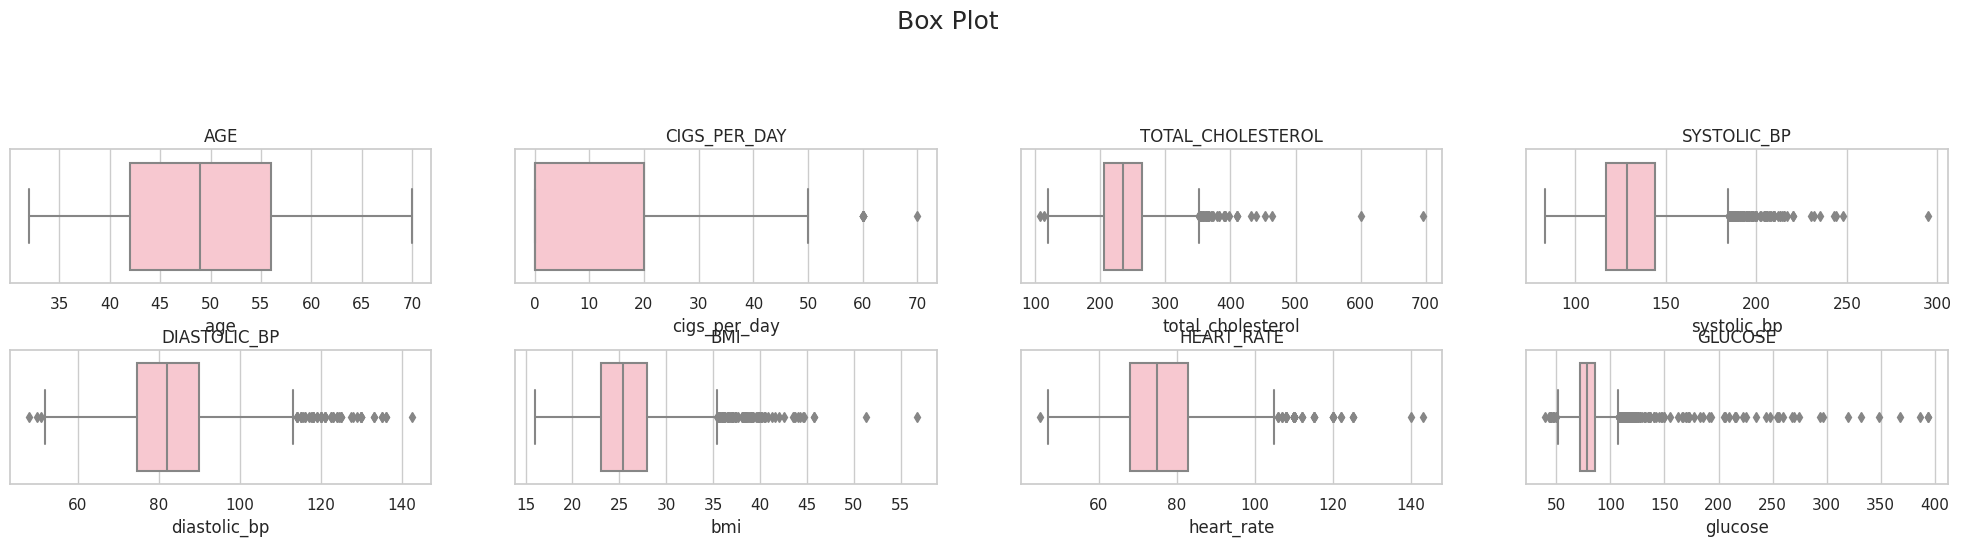

In [ ]:
# Selecting continuous variables from the DataFrame
numerical_var= ['age', 'cigs_per_day', 'total_cholesterol', 'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose']

# Create a new DataFrame with the selected columns
data_a = clas[numerical_var]

# Handling Outliers & Outlier treatments
# Create a new DataFrame with the selected columns
col_list = list(data_a.describe().columns)

# Find the outliers using boxplot
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot", fontsize=18, y=0.95)

for n, ticker in enumerate(col_list):
    ax = plt.subplot(8, 4, n + 1)
    plt.subplots_adjust(hspace=0.5, wspace=0.2)
    sns.boxplot(x=data_a[ticker], color='pink', ax=ax)

    # Chart formatting
    ax.set_title(ticker.upper())

* **There are outliers in the data, the effect of the outliers can be reduced to some extent by transforming it.**
* **Once the data is transformed, if outliers beyond 3 standard deviations from the mean still remain, then they can be imputed with its respective median value.**
* **This is done on the train data only to prevent data leakage.**

In [ ]:
# Removing outliers
for col in numerical_var:
  # Using IQR method to define the range of inliners:
  q1, q3, median = clas[col].quantile([0.25,0.75,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  # Replacing Outliers
  clas[col] = np.where(clas[col] > upper_limit, upper_limit,np.where(
                         clas[col] < lower_limit,lower_limit,clas[col]))

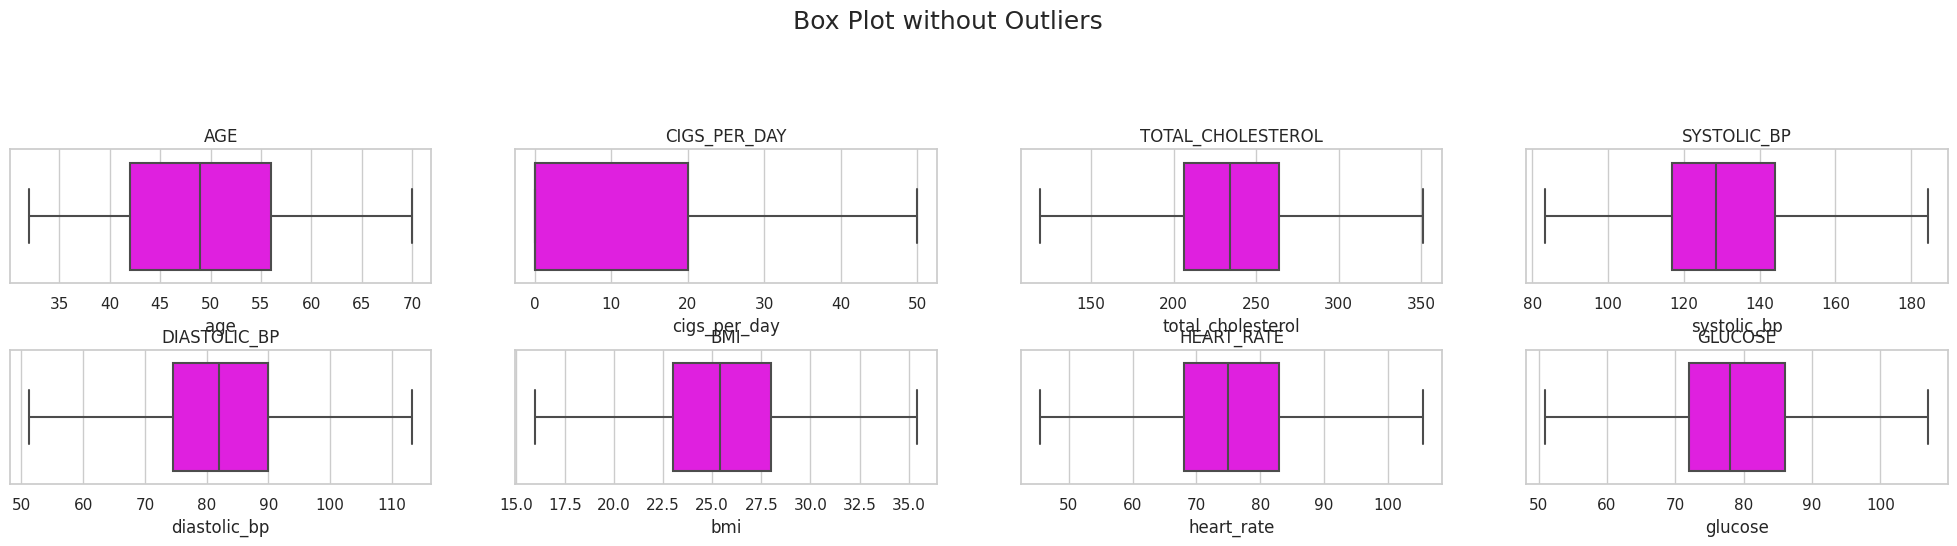

In [ ]:
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot without Outliers", fontsize=18, y=0.95)
#plot the all figures in loop with boxplot
for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=clas[ticker],color='magenta',ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())

In [ ]:
# We can see outliers in cigs_per_day has been imputed.
clas['cigs_per_day'].unique()

array([ 3.,  0., 10., 20., 30., 35., 40., 15.,  9., 50., 17., 25.,  5.,
       43.,  7., 19., 18.,  1., 45.,  2.,  6., 11.,  8.,  4., 14., 16.,
       23., 13., 12., 38.])

##### What all outlier treatment techniques have you used and why did you use those techniques?

* Interquartile Range (IQR) Method:
Utilized the IQR method for identifying and handling outliers in the continuous columns of the dataset.
* Robust Outlier Detection:
Chose the IQR method due to its robust nature in outlier detection, unaffected by extreme values in the data.
* Calculation of IQR:
Calculated the IQR as the difference between the 75th and 25th percentiles of the data.
* Outlier Definition:
Defined outliers as values falling below the 25th percentile minus 1.5 times the IQR or above the 75th percentile plus 1.5 times the IQR.
* Objective Outlier Removal:
Applied the IQR method to identify and consistently remove outliers in a manner unaffected by extreme data points.

* The np.where() function is used to replace the outliers with the upper or lower limit values, depending on which side they fall.
* The np.where() function takes three arguments:
a condition, a value to return if the condition is True, and a value to return if the condition is False.
The function returns an array with the same shape as the input array, but with the values replaced according to the condition.

* A nested np.where() function to handle both upper and lower outliers.
* The outer np.where() function checks if the values in the column are greater than the upper limit,
and if so, it replaces them with the upper limit value.
* The inner np.where() function checks if the values in the column are less than the lower limit,
and if so, it replaces them with the lower limit value.
* Otherwise, it returns the original values in the column.
* The result is a new column with the outliers replaced by the limit values.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

# Encoding the binary columns
clas['sex'] = np.where(clas['sex'] == 'M',1,0)
clas['is_smoking'] = np.where(clas['is_smoking'] == 'YES',1,0)

# Encode categorical variables
label_encoder = LabelEncoder()
clas['education'] = label_encoder.fit_transform(clas['education'].astype(str))

# I also tried One Hot Encoding but does not make any impact.
#clas = pd.get_dummies(clas, columns=['education'])

In [ ]:
clas.head()

age  education  sex  is_smoking  cigs_per_day  bp_meds  prevalent_stroke  \
0  64.0          1    0           1           3.0        0                 0   
1  36.0          3    1           0           0.0        0                 0   
2  46.0          0    0           1          10.0        0                 0   
3  50.0          0    1           1          20.0        0                 0   
4  64.0          0    0           1          30.0        0                 0   

   prevalent_hyp  diabetes  total_cholesterol  systolic_bp  diastolic_bp  \
0              0         0              221.0        148.0          85.0   
1              1         0              212.0        168.0          98.0   
2              0         0              250.0        116.0          71.0   
3              1         0              233.0        158.0          88.0   
4              0         0              241.0        136.5          85.0   

     bmi  heart_rate  glucose  ten_year_chd  
0  25.38        90.0     80.0             1  
1  29.77        72.0     75.0             0  
2  20.35        88.0     94.0             0  
3  28.26        68.0     94.0             1  
4  26.42        70.0     77.0             0

In [ ]:
clas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3390 non-null   float64
 1   education          3390 non-null   int64  
 2   sex                3390 non-null   int64  
 3   is_smoking         3390 non-null   int64  
 4   cigs_per_day       3390 non-null   float64
 5   bp_meds            3390 non-null   int64  
 6   prevalent_stroke   3390 non-null   int64  
 7   prevalent_hyp      3390 non-null   int64  
 8   diabetes           3390 non-null   int64  
 9   total_cholesterol  3390 non-null   float64
 10  systolic_bp        3390 non-null   float64
 11  diastolic_bp       3390 non-null   float64
 12  bmi                3390 non-null   float64
 13  heart_rate         3390 non-null   float64
 14  glucose            3390 non-null   float64
 15  ten_year_chd       3390 non-null   int64  
dtypes: float64(8), int64(8)


#### What all categorical encoding techniques have you used & why did you use those techniques?

**Binary Encoding:**
* Used for columns with binary values like 'sex' and 'is_smoking.'
* Replaced 'M' with 1 and other values with 0 for 'sex.'
* Replaced 'YES' with 1 and other values with 0 for 'is_smoking.'
* This encoding is suitable for columns with two distinct categories.

**Label Encoding:**
* Applied to the 'education' column.
* Used LabelEncoder to convert categorical values into numerical labels.
* Label encoding is appropriate for ordinal categorical variables where the order matters.
* Transformed categorical values into integer labels, allowing numerical representation for machine learning algorithms.

**One-Hot Encoding (commented out):**
* Not used in the provided code but mentioned in comments.
* One-hot encoding creates binary columns for each category in the 'education' column.
* Suitable for nominal categorical variables with no inherent order.
* Increases the dimensionality of the dataset but avoids introducing ordinal relationships that label encoding might imply.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# Remove multicollinearity by using VIF technique
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
continuous_feature_df = pd.DataFrame(clas[numerical_var])
continuous_feature_df

age  cigs_per_day  total_cholesterol  systolic_bp  diastolic_bp    bmi  \
0     64.0           3.0              221.0        148.0         85.00  25.38   
1     36.0           0.0              212.0        168.0         98.00  29.77   
2     46.0          10.0              250.0        116.0         71.00  20.35   
3     50.0          20.0              233.0        158.0         88.00  28.26   
4     64.0          30.0              241.0        136.5         85.00  26.42   
...    ...           ...                ...          ...           ...    ...   
3385  60.0           0.0              261.0        123.5         79.00  29.28   
3386  46.0           0.0              199.0        102.0         56.00  21.96   
3387  44.0           3.0              351.0        164.0        113.25  28.92   
3388  60.0           0.0              191.0        167.0        105.00  23.01   
3389  54.0           0.0              288.0        124.0         77.00  29.88   

      heart_rate  glucose  
0           90.0     80.0  
1           72.0     75.0  
2           88.0     94.0  
3           68.0     94.0  
4           70.0     77.0  
...          ...      ...  
3385        70.0    103.0  
3386        80.0     84.0  
3387        73.0     72.0  
3388        80.0     85.0  
3389        79.0     92.0  

[3390 rows x 8 columns]

In [ ]:
calc_vif(clas[[i for i in continuous_feature_df]])

variables         VIF
0                age   42.758266
1       cigs_per_day    1.641466
2  total_cholesterol   33.396105
3        systolic_bp  124.489313
4       diastolic_bp  135.525400
5                bmi   50.003165
6         heart_rate   40.618278
7            glucose   39.078799

In [ ]:
# Selecting features wisely to avoid overfitting
correlation_sys_dia = clas['systolic_bp'].corr(clas['diastolic_bp'])
# Print the correlation coefficients
print(f"Correlation between 'systolic_bp' and 'diastolic_bp': {correlation_sys_dia:.2f}")

Correlation between 'systolic_bp' and 'diastolic_bp': 0.78


* **The variables systolic BP and diastolic BP are highly correlated.**

* To handle multicollinearity between these two independent continuous variables, we can replace these two columns with a new variable 'pulse pressure', which is given as follows:

**Pulse Pressure = Systolic BP - Diastolic BP**

[Reference1](https://my.clevelandclinic.org/health/body/21629-pulse-pressure)

[Reference2](https://www.ahajournals.org/doi/pdf/10.1161/01.CIR.100.4.354#:~:text=Conclusions%E2%80%94In%20the%20middle-aged%20and%20elderly%2C%20CHD%20risk%20increased,Words%3A%20blood%20pressure%20n%20hypertension%20n%20coronary%20disease)

From the above resource, we also found that:
* The normal pulse pressure is around 40 mmHg
* Pulse pressures of 50 mmHg or more can increase the risk of heart disease, heart rhythm disorders, stroke and more.
* Higher pulse pressures are also thought to play a role in eye and kidney damage from diseases like diabetes.
* Low pulse pressure - is where the pulse pressure is one-fourth or less of the systolic blood pressure.
* This happens when your heart isn’t pumping enough blood, which is seen in heart failure and certain heart valve diseases. It also happens when a person has been injured and lost a lot of blood or is bleeding internally.

According to some studies, pulse pressure (PP) is a better predictor of coronary heart disease (CHD) risk than mean arterial pressure (MAP) in middle-aged and older subjects. PP reflects the stiffness of the large arteries and the pulsatile stress on the heart and blood vessels. PP is calculated as the difference between systolic blood pressure (SBP) and diastolic blood pressure (DBP). MAP is calculated as one-third of SBP plus two-thirds of DBP. Increases of 10 mmHg in DBP, SBP, and PP are associated with an increased CHD hazard ratio of about 10%. However, PP may be the most reliable blood pressure indicator of risk when high-normal SBP or systolic hypertension is accompanied by normal or low DBP. Therefore, PP may be more useful than MAP in predicting 10 year CHD risk.

In [ ]:
# Creating a new column pulse_pressure
# and dropping systolic_bp and diastolic_bp

clas['pulse_pressure'] = clas['systolic_bp']-clas['diastolic_bp']
clas.drop('systolic_bp',axis=1,inplace=True)
clas.drop('diastolic_bp',axis=1,inplace=True)

In [ ]:
# Updating the continuous_var list

numerical_var.remove('systolic_bp')
numerical_var.remove('diastolic_bp')
numerical_var.append('pulse_pressure')

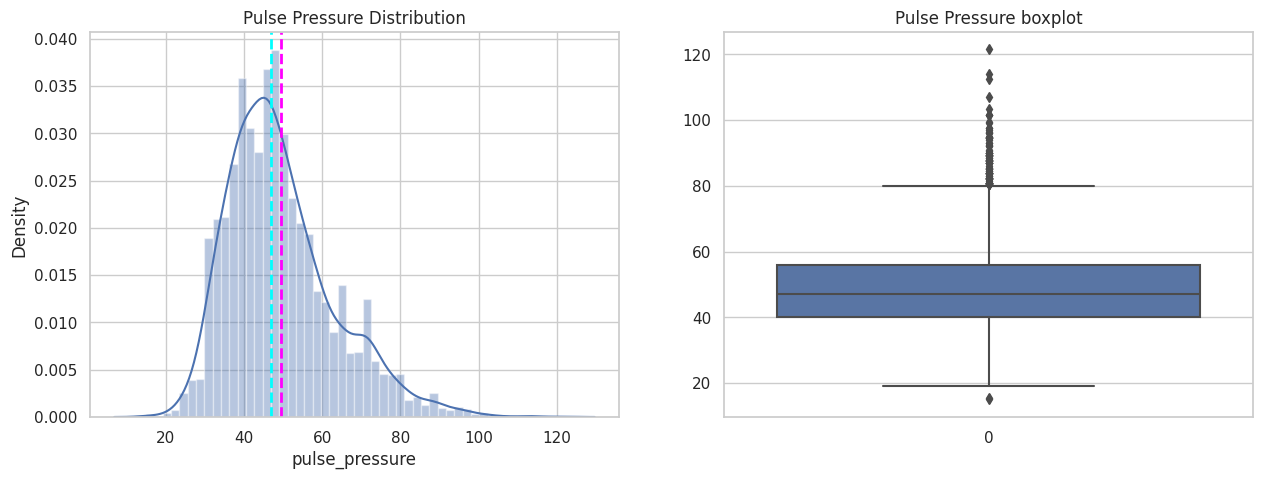

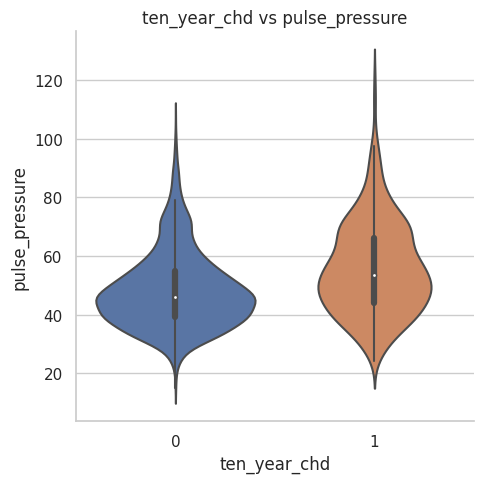

In [ ]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribution of glucose
sns.distplot(clas['pulse_pressure'], ax=axes[0])
axes[0].axvline(clas['pulse_pressure'].mean(), color='magenta', linestyle='dashed', linewidth=2)
axes[0].axvline(clas['pulse_pressure'].median(), color='cyan', linestyle='dashed', linewidth=2)
axes[0].set_title('Pulse Pressure Distribution')

# Visualizing Outliers in glucose
sns.boxplot(clas['pulse_pressure'], ax=axes[1])
axes[1].set_title('Pulse Pressure boxplot')

# Relationship between pulse pressure with the dependent variable
sns.catplot(x='ten_year_chd',y='pulse_pressure',data=clas,kind='violin')
plt.title('ten_year_chd vs pulse_pressure')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

* The pulse pressures are positively skewed and contains outliers.

* On average, the patients with higher pulse pressure are exposed to the coronary heart disease over the period of 10 years.

<Axes: title={'center': 'Correlation Analysis'}>

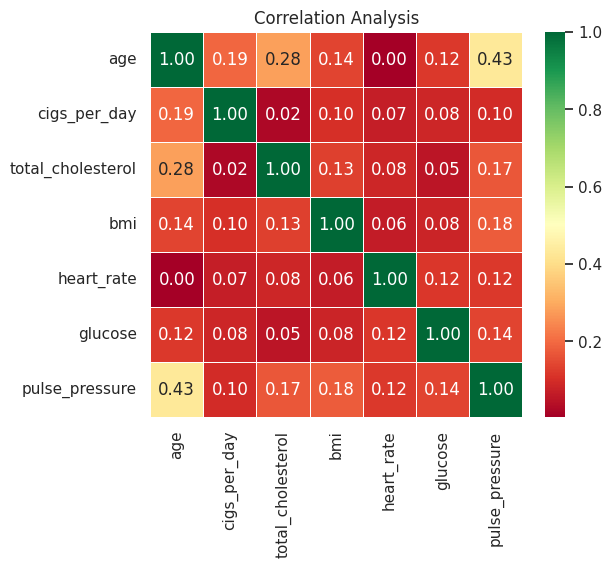

In [ ]:
# Updated correlations
plt.figure(figsize=(6,5))
plt.title('Correlation Analysis')
correlation = clas[numerical_var].corr()
sns.heatmap(abs(correlation),annot=True,cmap='RdYlGn', linewidths=.5,fmt='.2f')

**We were successful in handling multicollinearity amongst the continuous variables in the dataset.**

#### 2. Feature Selection

**Dropping 'is_smoking' column Using CROSS COLUMN DEPENDENCY.**
* We can drop this column since we already have a column cigs_per_day, which gives the number of cigarettes smoked by the patient in a day. The patients who don't smoke have entered zero in this column.

In [ ]:
# Select your features wisely to avoid overfitting
# dropping is_smoking
clas.drop('is_smoking',axis=1,inplace=True)
categorical_var.remove('is_smoking')
categorical_var

['education',
 'sex',
 'bp_meds',
 'prevalent_stroke',
 'prevalent_hyp',
 'diabetes',
 'ten_year_chd']

In [ ]:
clas.columns

Index(['age', 'education', 'sex', 'cigs_per_day', 'bp_meds',
       'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'total_cholesterol',
       'bmi', 'heart_rate', 'glucose', 'ten_year_chd', 'pulse_pressure'],
      dtype='object')

##### What all feature selection methods have you used  and why?

We have used variance inflation factor to remove multicollinearity and we found that the systolic and diastolic blood pressure have high VIF, so we created a new feature which is pulse pressure.

It was also found that the is smoking column just had the values yes or no for smoking and the same was conveyed in the cigs per day column where for non smoker, the column had 0 and for smoker it had the number of cigeratte per day.

##### Which all features you found important and why?

Finally the important colums are 'age', 'education', 'sex', 'cigs_per_day', 'bp_meds', 'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'total_cholesterol', 'bmi', 'heart_rate', 'glucose', 'ten_year_chd' 'pulse_pressure'.

All these columns contains **the demographic, behavioural, current medical and historic medical data.**

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
# skewness along the index axis
(clas[numerical_var]).skew(axis = 0)

age                  0.225796
cigs_per_day         1.127284
total_cholesterol    0.340533
bmi                  0.450492
heart_rate           0.418170
glucose              0.467736
pulse_pressure       0.946833
dtype: float64

 * A rule of thumb is that skewness between -0.5 and 0.5 indicates a nearly symmetric distribution, while values beyond that range suggest skewness.
 * Positive values suggest a right skew, and negative values suggest a left skew.
 * In our case, variables like 'cigs_per_day' and 'pulse_pressure' exhibit noticeable skewness.
 * I chose log1p transformation to handle **zero** values in cigs_per_day column.

In [ ]:
# Features to be log-transformed
features_to_transform = ['cigs_per_day', 'pulse_pressure']

# Log transformation
clas[features_to_transform] = np.log1p(clas[features_to_transform])

# Check skewness after log transformation
skewness_after_transformation = clas[features_to_transform].skew(axis=0)
print(skewness_after_transformation)

cigs_per_day      0.273181
pulse_pressure    0.168465
dtype: float64


In [ ]:
(clas[numerical_var]).skew(axis = 0)

age                  0.225796
cigs_per_day         0.273181
total_cholesterol    0.340533
bmi                  0.450492
heart_rate           0.418170
glucose              0.467736
pulse_pressure       0.168465
dtype: float64

### 6. Data Scaling

In [ ]:
features = [i for i in clas.columns if i not in ['ten_year_chd']]
features

['age',
 'education',
 'sex',
 'cigs_per_day',
 'bp_meds',
 'prevalent_stroke',
 'prevalent_hyp',
 'diabetes',
 'total_cholesterol',
 'bmi',
 'heart_rate',
 'glucose',
 'pulse_pressure']

In [ ]:
clas.head()

age  education  sex  cigs_per_day  bp_meds  prevalent_stroke  \
0  64.0          1    0      1.386294        0                 0   
1  36.0          3    1      0.000000        0                 0   
2  46.0          0    0      2.397895        0                 0   
3  50.0          0    1      3.044522        0                 0   
4  64.0          0    0      3.433987        0                 0   

   prevalent_hyp  diabetes  total_cholesterol    bmi  heart_rate  glucose  \
0              0         0              221.0  25.38        90.0     80.0   
1              1         0              212.0  29.77        72.0     75.0   
2              0         0              250.0  20.35        88.0     94.0   
3              1         0              233.0  28.26        68.0     94.0   
4              0         0              241.0  26.42        70.0     77.0   

   ten_year_chd  pulse_pressure  
0             1        4.158883  
1             0        4.262680  
2             0        3.828641  
3             1        4.262680  
4             0        3.960813

In [ ]:
# Identify numerical and categorical variables
numerical_var
categorical_var

# Separate numerical variables for scaling
numerical_data = clas[numerical_var]

# Apply Min-Max scaling to numerical variables
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(numerical_data)

# Create a DataFrame with scaled numerical variables
scaled_df = pd.DataFrame(scaled_numerical_data, columns=numerical_var)

# Concatenate scaled numerical variables with categorical variables
clas_scaled = pd.concat([scaled_df, clas[categorical_var]], axis=1)

# Now, 'clas_scaled' contains scaled numerical variables and original categorical variables

In [ ]:
clas_scaled.head()

age  cigs_per_day  total_cholesterol       bmi  heart_rate   glucose  \
0  1.682783      0.007009          -0.362779 -0.085301    1.226815  0.004571   
1 -1.576210     -0.936579          -0.572897  1.066765   -0.332741 -0.411289   
2 -0.412284      0.695561           0.314268 -1.405321    1.053531  1.168977   
3  0.053287      1.135691          -0.082622  0.670496   -0.679309  1.168977   
4  1.682783      1.400782           0.104150  0.187626   -0.506025 -0.244945   

   pulse_pressure  education  sex  bp_meds  prevalent_stroke  prevalent_hyp  \
0        1.040384          1    0        0                 0              0   
1        1.433846          3    1        0                 0              1   
2       -0.211461          0    0        0                 0              0   
3        1.433846          0    1        0                 0              1   
4        0.289561          0    0        0                 0              0   

   diabetes  ten_year_chd  
0         0             1  
1         0             0  
2         0             0  
3         0             1  
4         0             0

##### Which method have you used to scale you data and why?

* In this we have different independent features of different scale so we have used **Standard Scalar** method to scale our independent features into one scale.
* **Standard Scalar** Centers the data around 0 with a standard deviation of 1. Does not bound the data to a specific range. Less sensitive to outliers compared to Min-Max scaling.

**Which is good practice while doing data scaling: Scaling with dependent variable or without it?**

The general practice in data scaling is to perform scaling without including the dependent variable. Scaling is typically applied to the independent variables (features or predictors) in dataset.
Scaling is primarily applied to the features**(Numerical features)** to ensure that they contribute equally to the model.

**Reasoning:** Scaling the dependent variable could alter the interpretability of the model's predictions. For example, if you are predicting prices, scaling the prices may make it difficult to interpret the predicted values in the original scale.

**While doing data scaling should one only consider numerical variables for data scaling or take categorical features except dependent variable?**

For data scaling, it's generally recommended to scale only the numerical variables. Categorical variables with binary encoding (0 and 1) or other encoded categorical variables usually don't require scaling because they are already on a similar scale.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No, not needed. We have already reduced the number of features and only the important features are left.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X = clas_scaled.drop("ten_year_chd", axis=1)
y = clas_scaled['ten_year_chd']

# Splitting the data into 80:20 ration
# I also tried 70:30 split but model accuracy(False Negative Increased) dropped.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10, stratify=y, shuffle=True)

# Checking the train distribution of dependent variable
print(y_train.value_counts())

# Proportion of positive ten_year_chd outcomes in train dataset
y_train_proportion= (358/(358+2015))
print(y_train_proportion)
print('\n')

# Checking the test distribution of dependent variable
print(y_test.value_counts())

# Proportion of positive ten_year_chd outcomes in test dataset
y_test_proportion= (153/(153+864))
print(y_test_proportion)

0    2303
1     409
Name: ten_year_chd, dtype: int64
0.15086388537715972


0    576
1    102
Name: ten_year_chd, dtype: int64
0.1504424778761062


**The train and test set contain almost equal proportion(15%) of respective classes.**

##### What data splitting ratio have you used and why?

* To train the model we have split the data into train and test using train_test_split method.
* Since we are working with limited amount of data, ie, around 3390 records, **30%** of the records are set aside for testing, 70%  for training.
* Since the data is imbalanced, **stratified split** was employed to get almost equal proportion of classes of dependent variables in the train and test sets.
* We have split 70% of our data into train and 30% into test, this ratio provides a good balance between having enough data to train a model effectively and having enough data to evaluate the model’s performance on unseen data. By using 70% of the data for training, the model has access to a large amount of information to learn from, while the remaining 30% of the data can be used to assess how well the model generalizes to new data.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

* Since we are dealing with unbalanced data, ie, only ~15% of the patients were diagnosed with coronary heart disease, we oversample the train dataset using SMOTE (Synthetic Minority Oversampling Technique).
* This ensures that the model has trained equally on all kinds of results, and it is not biased to one particular class.

Samples in the original dataset 2712
Samples in the resampled dataset 4594
***********************************************************************




<Axes: title={'center': 'Target variable after SMOTE'}>

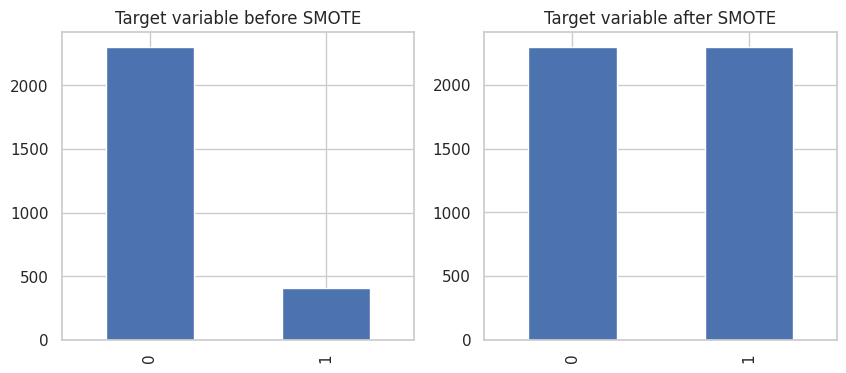

In [ ]:
# Handling Imbalanced Dataset (If needed)
# Oversampling using SMOTETomek
# fit predictor and target variable
X_smote, y_smote = SMOTETomek(random_state=0).fit_resample(X_train, y_train)

print('Samples in the original dataset', len(y_train))
print('Samples in the resampled dataset', len(y_smote))
print('***********************************************************************')
print('\n')

# visualize the target variable before SMOTE
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
y_train.value_counts().plot(kind='bar', title='Target variable before SMOTE')

# visualize the target variable after SMOTE
plt.subplot(1,2,2)
y_smote.value_counts().plot(kind='bar', title='Target variable after SMOTE')

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

* I used the SMOTE combined with Tomek links oversampling technique to handle the imbalanced dataset. SMOTE works by generating synthetic samples from the minority class to balance the class distribution. It does this by selecting instances that are close in the feature space and drawing a line between them, then creating new instances along this line. Tomek links oversampling removes Tomek links, which are pairs of instances from different classes that are very close to each other in the feature space. By removing these instances, the decision boundary between the classes can be made clearer.
* I chose to use this technique because it can improve the performance of machine learning models on imbalanced datasets by balancing the class distribution and making the decision boundary between classes clearer. By combining oversampling of the minority class with undersampling of the majority class, I was able to achieve a balanced dataset while also removing potential noise and ambiguity from the data.
* **We have successfully oversampled the minority class using SMOTETomek. Now the model we build will be able to learn from both the classes without any bias.**

## ***7. ML Model Implementation***

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test
    '''

    # fit the model on the training data
    model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:,1]
    pred_prob_test = model.predict_proba(X_test)[:,1]

    # calculate ROC AUC score
    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    # plot the ROC curve
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="BuPu", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="BuPu", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    try:
      try:
        feature_importance = model.feature_importances_
      except:
        feature_importance = model.coef_
      feature_importance = np.absolute(feature_importance)
      if len(feature_importance)==len(features):
        pass
      else:
        feature_importance = feature_importance[0]


      feat = pd.Series(feature_importance, index=features)
      feat = feat.sort_values(ascending=True)
      plt.figure(figsize=(10,6))
      plt.title('Feature Importances for '+str(model), fontsize = 18)
      plt.xlabel('Relative Importance')
      feat.plot(kind='barh')
    except AttributeError:
        print("\nThe model does not have feature importances attribute.")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test ]
    return model_score

# Create a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test','ROC-AUC Train', 'ROC-AUC Test','F1 macro Train', 'F1 macro Test'])

### ML Model - 1 Logistic Regression

In [ ]:
# ML Model - 1 Implementation
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)

# model is trained (fit ) and predicted in the evaluate model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Train ROC AUC: 0.6700043535045712
Test ROC AUC: 0.6372549019607844


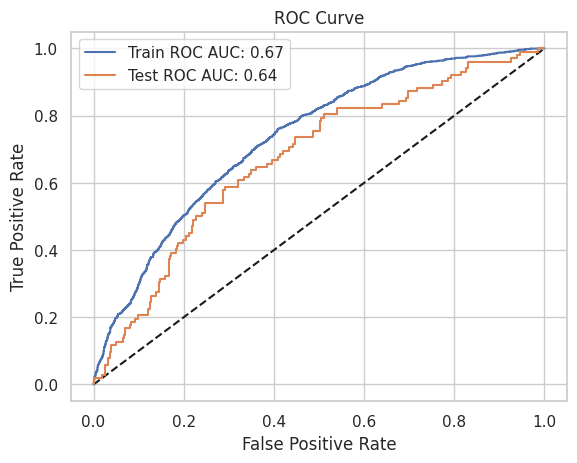


Confusion Matrix:


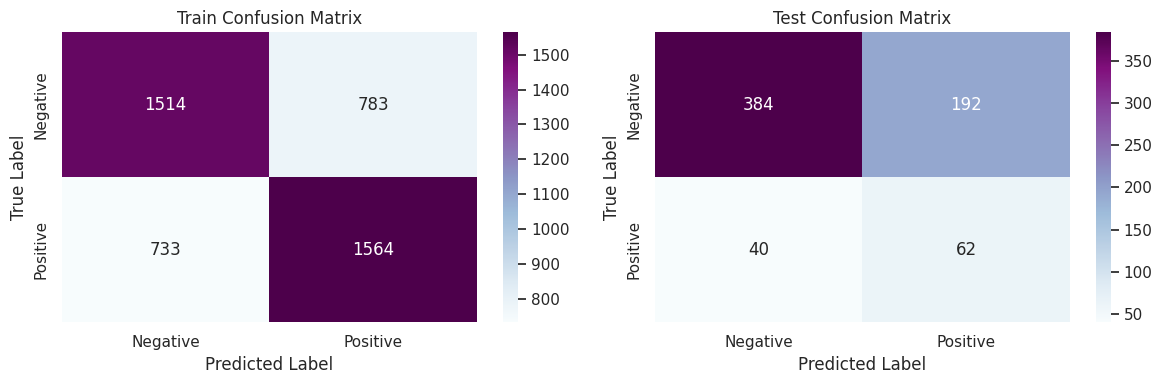


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.673787 | 0.659121 |   0.666373 | 2297        |
| 1            |    0.666383 | 0.680888 |   0.673557 | 2297        |
| accuracy     |    0.670004 | 0.670004 |   0.670004 |    0.670004 |
| macro avg    |    0.670085 | 0.670004 |   0.669965 | 4594        |
| weighted avg |    0.670085 | 0.670004 |   0.669965 | 4594        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.90566  | 0.666667 |   0.768    | 576        |
| 1            |    0.244094 | 0.607843 |   0.348315 | 102        |
| accuracy     |    0.657817 | 0.657817 |   0.657817 |   0.657817 |
| macro avg    |    0.574877 | 0.637255 |   0.558157 | 678        |
| weighted avg |    0.806133 | 0.657817 |   0.7048

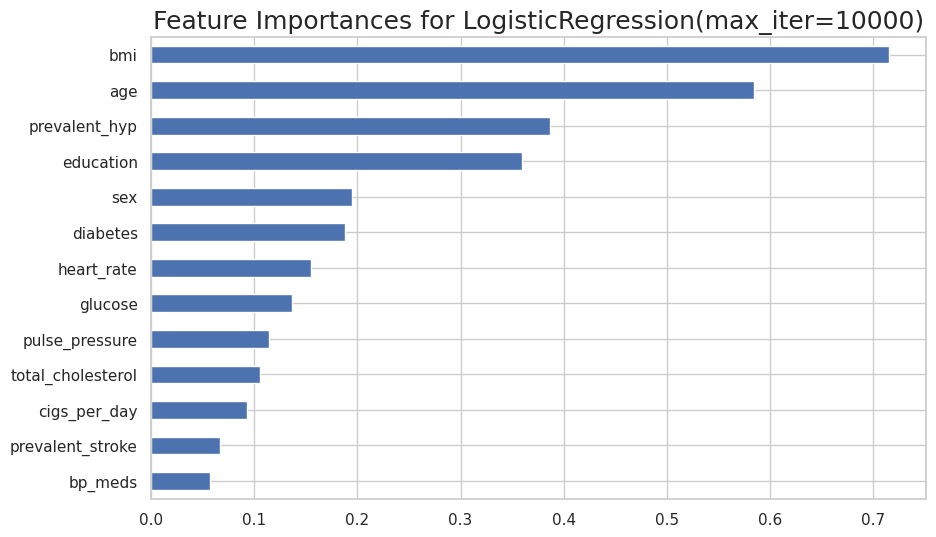

In [ ]:
# Visualizing evaluation Metric Score chart
lr_score = evaluate_model(lr_model, X_smote, X_test, y_smote, y_test)

In [ ]:
score['Logistic regression'] = lr_score
score

Logistic regression
Precision Train             0.670085
Precision Test              0.806133
Recall Train                0.670004
Recall Test                 0.657817
Accuracy Train              0.670004
Accuracy Test               0.657817
ROC-AUC Train               0.670004
ROC-AUC Test                0.637255
F1 macro Train              0.669965
F1 macro Test               0.704861

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {'C': [100,10,1,0.1,0.01,0.001,0.0001],
              'penalty': ['l1', 'l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Initializing the logistic regression model
logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0)

# Using GridSearchCV to tune the hyperparameters using cross-validation
grid = GridSearchCV(logreg, param_grid, cv=rskf)
grid.fit(X_smote, y_smote)

best_params = grid.best_params_
# The best hyperparameters found by GridSearchCV
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
# Initiate model with best parameters
lr_model2 = LogisticRegression(C=best_params['C'],
                                  penalty=best_params['penalty'],
                                  solver=best_params['solver'],
                                  max_iter=10000, random_state=0)


Train ROC AUC: 0.67457553330431
Test ROC AUC: 0.6331699346405228


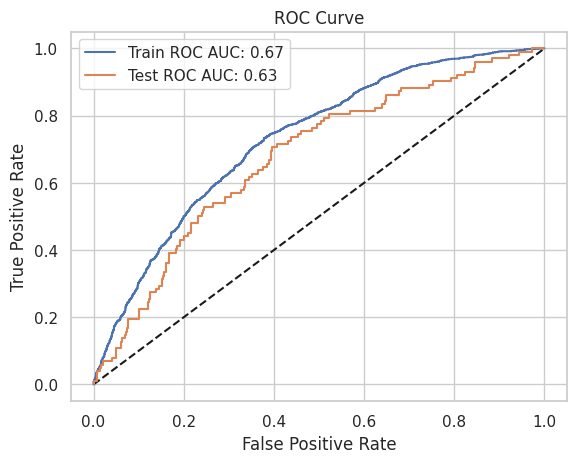


Confusion Matrix:


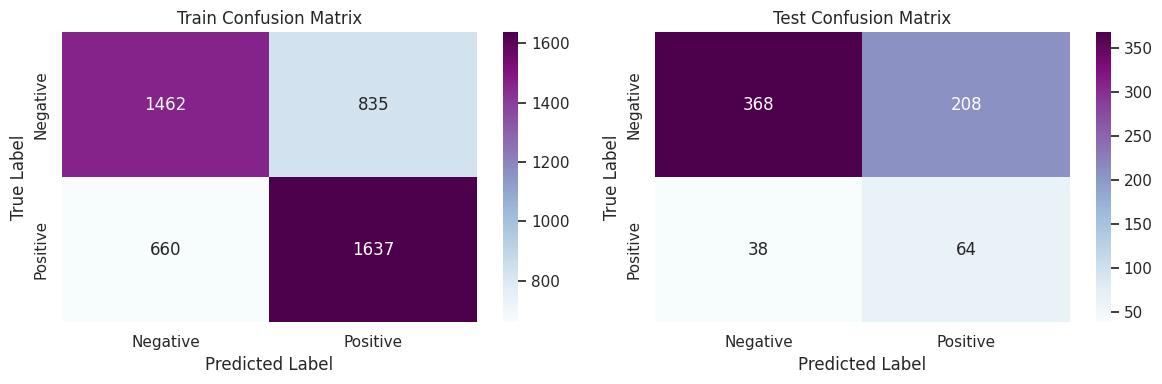


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.688973 | 0.636482 |   0.661688 | 2297        |
| 1            |    0.662217 | 0.712669 |   0.686517 | 2297        |
| accuracy     |    0.674576 | 0.674576 |   0.674576 |    0.674576 |
| macro avg    |    0.675595 | 0.674576 |   0.674103 | 4594        |
| weighted avg |    0.675595 | 0.674576 |   0.674103 | 4594        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.906404 | 0.638889 |   0.749491 | 576        |
| 1            |    0.235294 | 0.627451 |   0.342246 | 102        |
| accuracy     |    0.637168 | 0.637168 |   0.637168 |   0.637168 |
| macro avg    |    0.570849 | 0.63317  |   0.545868 | 678        |
| weighted avg |    0.805441 | 0.637168 |   0.6882

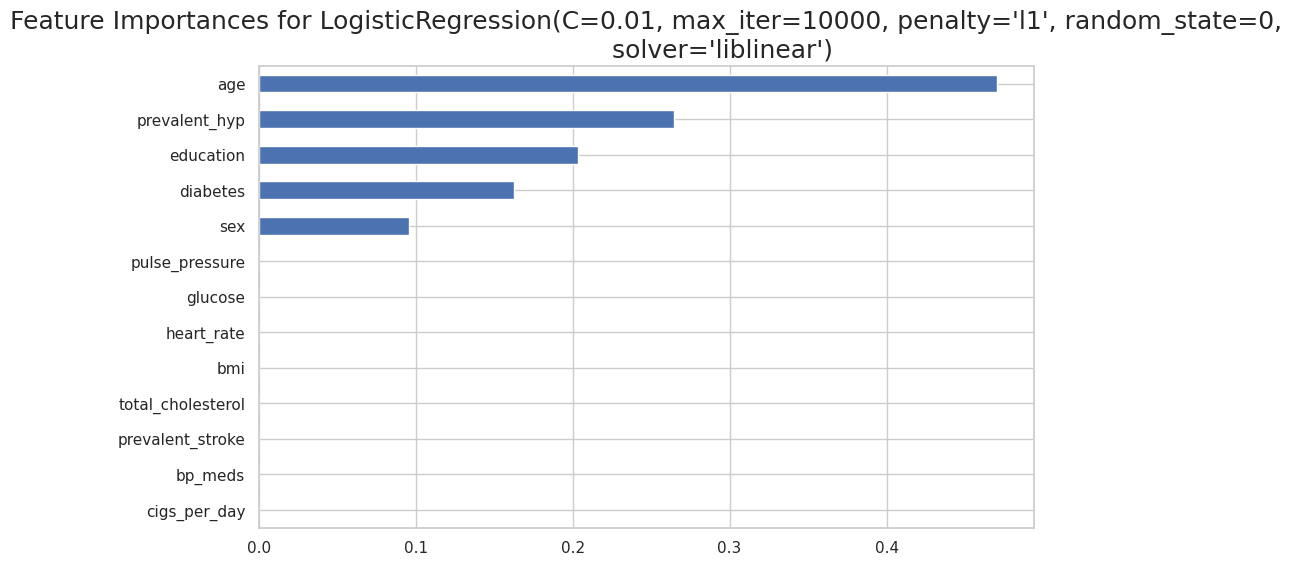

In [ ]:
# Visualizing evaluation Metric Score chart
lr_score2 = evaluate_model(lr_model2, X_smote, X_test, y_smote, y_test)

##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used is GridSearchCV. GridSearchCV is a method that performs an exhaustive search over a specified parameter grid to find the best hyperparameters for a model. It is a popular method for hyperparameter tuning because it is simple to implement and can be effective in finding good hyperparameters for a model.

The choice of hyperparameter optimization technique depends on various factors such as the size of the parameter space, the computational resources available, and the time constraints. GridSearchCV can be a good choice when the parameter space is relatively small and computational resources are not a major concern.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
score['Logistic regression tuned'] = lr_score2
score

Logistic regression  Logistic regression tuned
Precision Train             0.670085                   0.675595
Precision Test              0.806133                   0.805441
Recall Train                0.670004                   0.674576
Recall Test                 0.657817                   0.637168
Accuracy Train              0.670004                   0.674576
Accuracy Test               0.657817                   0.637168
ROC-AUC Train               0.670004                   0.674576
ROC-AUC Test                0.637255                   0.633170
F1 macro Train              0.669965                   0.674103
F1 macro Test               0.704861                   0.688224

It appears that hyperparameter tuning did not improve the performance of the Logistic Regression model on the test set. The precision, recall, accuracy, ROC-AUC, and F1 scores on the test set are the same for both the untuned and tuned Logistic Regression models.

### ML Model - 2 Decision Tree

In [ ]:
# ML Model - 2 Implementation
dt = DecisionTreeClassifier(random_state=20)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Train ROC AUC: 1.0
Test ROC AUC: 0.5532577614379085


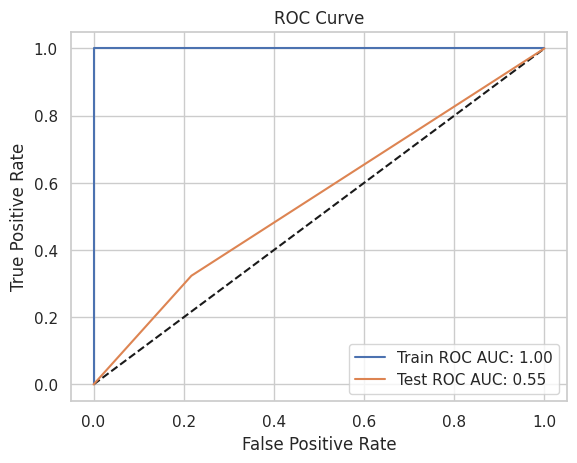


Confusion Matrix:


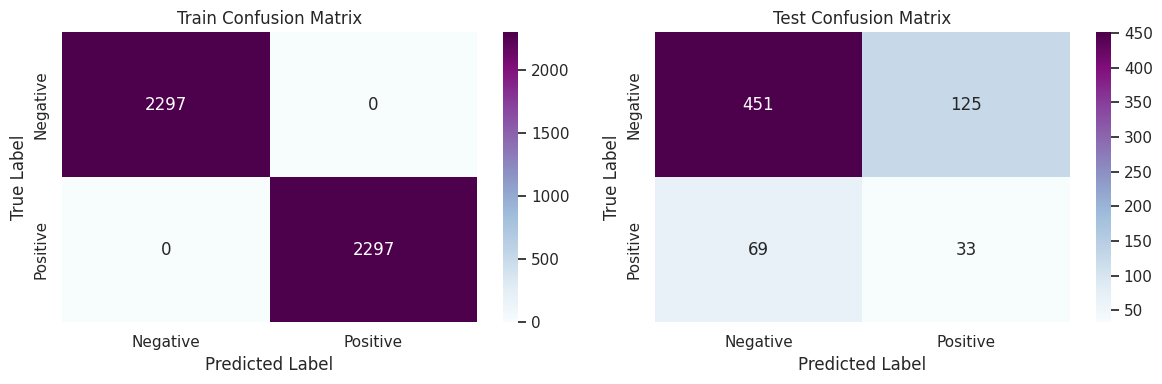


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |      2297 |
| 1            |           1 |        1 |          1 |      2297 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |      4594 |
| weighted avg |           1 |        1 |          1 |      4594 |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.867308 | 0.782986 |   0.822993 | 576        |
| 1            |    0.208861 | 0.323529 |   0.253846 | 102        |
| accuracy     |    0.713864 | 0.713864 |   0.713864 |   0.713864 |
| macro avg    |    0.538084 | 0.553258 |   0.538419 | 678        |
| weighted avg |    0.768249 | 0.713864 |   0.737369 | 678      

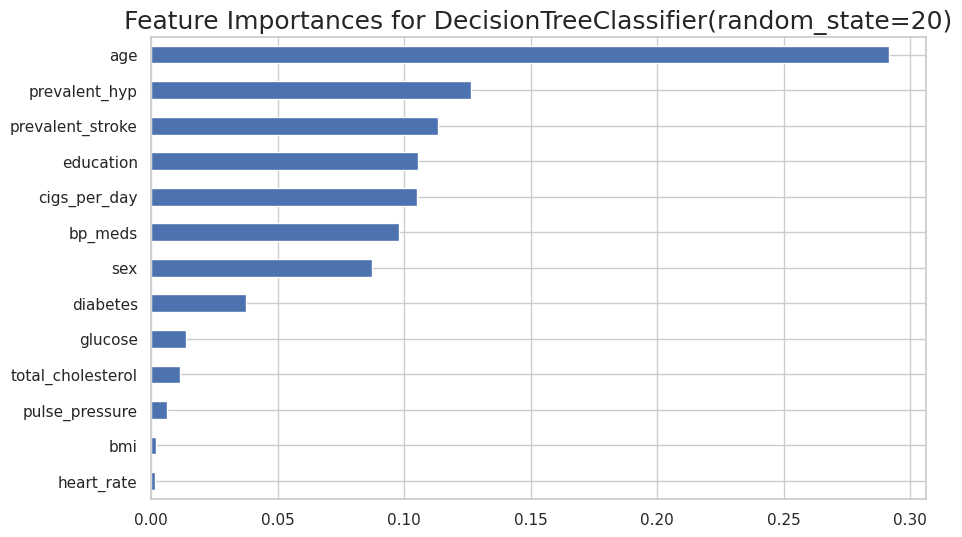

In [ ]:
# Visualizing evaluation Metric Score chart
dt_score = evaluate_model(dt, X_smote, X_test, y_smote, y_test)

In [ ]:
score['Decision Tree'] = dt_score
score

Logistic regression  Logistic regression tuned  Decision Tree
Precision Train             0.670085                   0.675595       1.000000
Precision Test              0.806133                   0.805441       0.768249
Recall Train                0.670004                   0.674576       1.000000
Recall Test                 0.657817                   0.637168       0.713864
Accuracy Train              0.670004                   0.674576       1.000000
Accuracy Test               0.657817                   0.637168       0.713864
ROC-AUC Train               0.670004                   0.674576       1.000000
ROC-AUC Test                0.637255                   0.633170       0.553258
F1 macro Train              0.669965                   0.674103       1.000000
F1 macro Test               0.704861                   0.688224       0.737369

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'max_depth' : [3,4,5,6,7,8],
        'min_samples_split' : np.arange(2,8),
        'min_samples_leaf' : np.arange(10,20)}

# Initialize the model
model = DecisionTreeClassifier()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, grid, cv=rskf)

# Fit the GridSearchCV to the training data
grid_search.fit(X_smote, y_smote)

# Select the best hyperparameters
best_params = grid_search.best_params_
best_params

{'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 3}

In [ ]:
# Train a new model with the best hyperparameters
dt2 = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 min_samples_split=best_params['min_samples_split'],
                                 random_state=20)


Train ROC AUC: 0.7766652154984763
Test ROC AUC: 0.6083537581699348


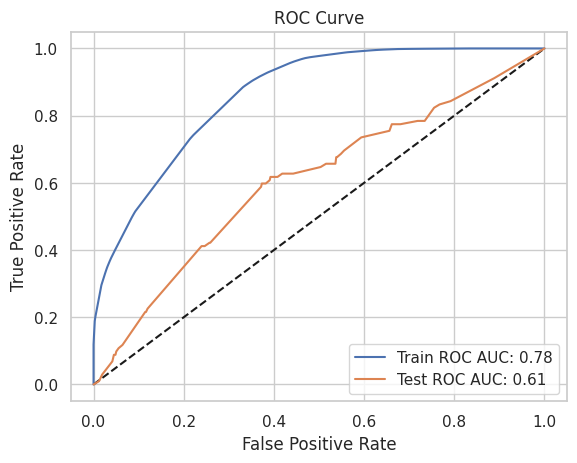


Confusion Matrix:


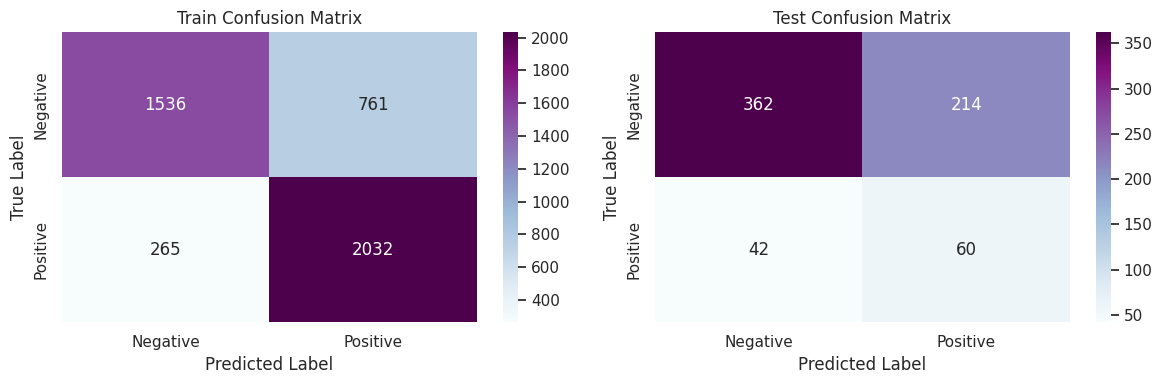


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.85286  | 0.668698 |   0.749634 | 2297        |
| 1            |    0.727533 | 0.884632 |   0.798428 | 2297        |
| accuracy     |    0.776665 | 0.776665 |   0.776665 |    0.776665 |
| macro avg    |    0.790196 | 0.776665 |   0.774031 | 4594        |
| weighted avg |    0.790196 | 0.776665 |   0.774031 | 4594        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.89604  | 0.628472 |   0.738776 | 576        |
| 1            |    0.218978 | 0.588235 |   0.319149 | 102        |
| accuracy     |    0.622419 | 0.622419 |   0.622419 |   0.622419 |
| macro avg    |    0.557509 | 0.608354 |   0.528962 | 678        |
| weighted avg |    0.794181 | 0.622419 |   0.6756

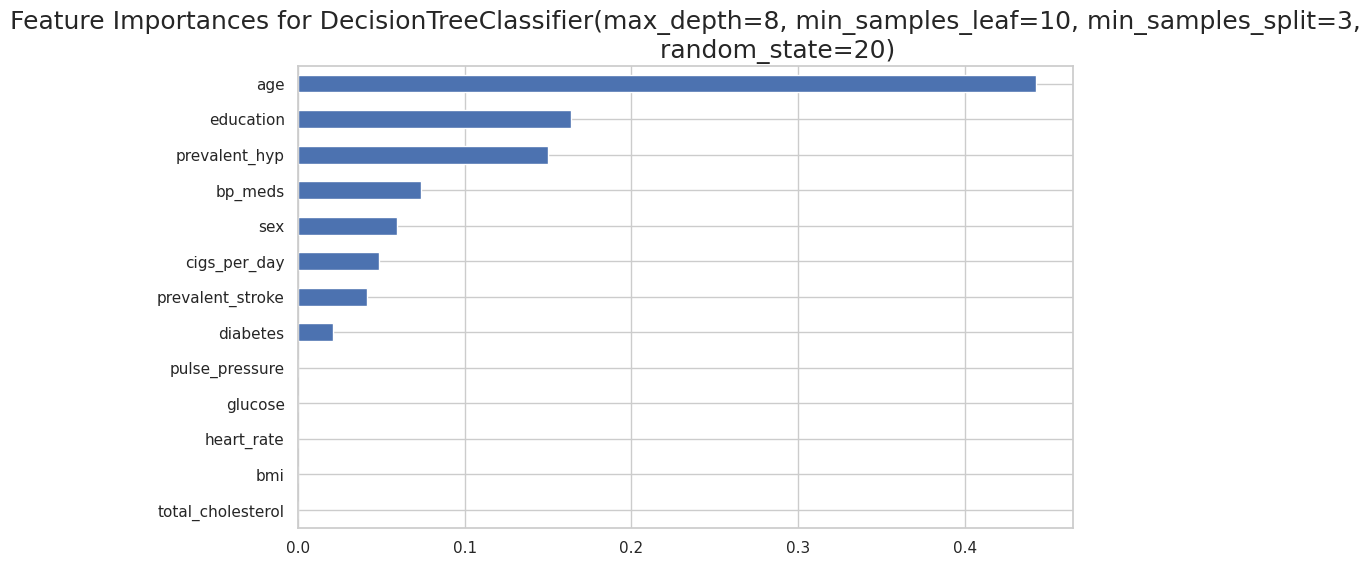

In [ ]:
dt2_score = evaluate_model(dt2, X_smote, X_test, y_smote, y_test)

##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used is GridSearchCV. GridSearchCV is a method that performs an exhaustive search over a specified parameter grid to find the best hyperparameters for a model. It is a popular method for hyperparameter tuning because it is simple to implement and can be effective in finding good hyperparameters for a model.

The choice of hyperparameter optimization technique depends on various factors such as the size of the parameter space, the computational resources available, and the time constraints. GridSearchCV can be a good choice when the parameter space is relatively small and computational resources are not a major concern.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
score['Decision Tree tuned'] = dt2_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.670085                   0.675595   
Precision Test              0.806133                   0.805441   
Recall Train                0.670004                   0.674576   
Recall Test                 0.657817                   0.637168   
Accuracy Train              0.670004                   0.674576   
Accuracy Test               0.657817                   0.637168   
ROC-AUC Train               0.670004                   0.674576   
ROC-AUC Test                0.637255                   0.633170   
F1 macro Train              0.669965                   0.674103   
F1 macro Test               0.704861                   0.688224   

                 Decision Tree  Decision Tree tuned  
Precision Train       1.000000             0.790196  
Precision Test        0.768249             0.794181  
Recall Train          1.000000             0.776665  
Recall Test           0.713864             0.622419  
Accuracy Train        1.000000             0.776665  
Accuracy Test         0.713864             0.622419  
ROC-AUC Train         1.000000             0.776665  
ROC-AUC Test          0.553258             0.608354  
F1 macro Train        1.000000             0.774031  
F1 macro Test         0.737369             0.675646

It appears that hyperparameter tuning improved the performance of the Decision Tree model on the test set. The tuned Decision Tree model has higher precision and F1 score on the test set compared to the untuned Decision Tree model. However, the recall, accuracy, and ROC-AUC scores on the test set decreased slightly after tuning.

The tuned model is not overfitting like the untuned model.

### ML Model - 3 Random Forest

In [ ]:
# ML Model - 3 Implementation
# Initialize the model
rf = RandomForestClassifier(random_state=0)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Train ROC AUC: 1.0
Test ROC AUC: 0.5462111928104576


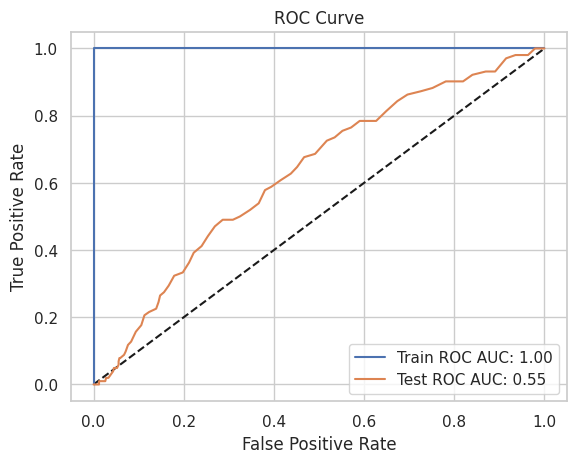


Confusion Matrix:


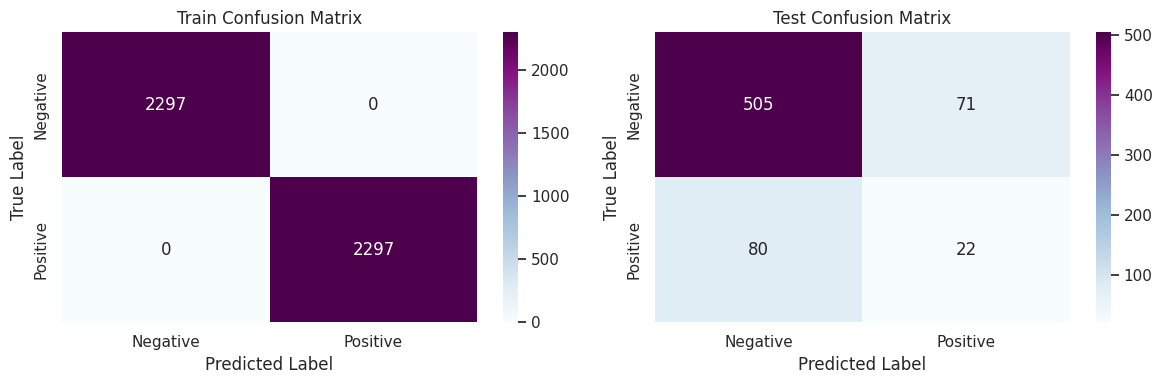


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |      2297 |
| 1            |           1 |        1 |          1 |      2297 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |      4594 |
| weighted avg |           1 |        1 |          1 |      4594 |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.863248 | 0.876736 |   0.86994  | 576        |
| 1            |    0.236559 | 0.215686 |   0.225641 | 102        |
| accuracy     |    0.777286 | 0.777286 |   0.777286 |   0.777286 |
| macro avg    |    0.549904 | 0.546211 |   0.54779  | 678        |
| weighted avg |    0.768967 | 0.777286 |   0.77301  | 678      

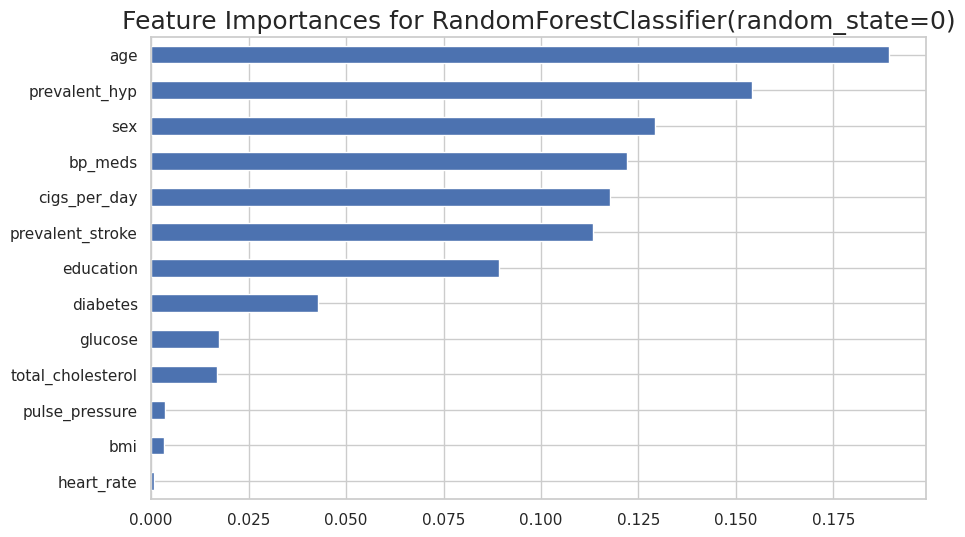

In [ ]:
# Visualizing evaluation Metric Score chart
rf_score = evaluate_model(rf, X_smote, X_test, y_smote, y_test)

In [ ]:
score['Random Forest'] = rf_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.670085                   0.675595   
Precision Test              0.806133                   0.805441   
Recall Train                0.670004                   0.674576   
Recall Test                 0.657817                   0.637168   
Accuracy Train              0.670004                   0.674576   
Accuracy Test               0.657817                   0.637168   
ROC-AUC Train               0.670004                   0.674576   
ROC-AUC Test                0.637255                   0.633170   
F1 macro Train              0.669965                   0.674103   
F1 macro Test               0.704861                   0.688224   

                 Decision Tree  Decision Tree tuned  Random Forest  
Precision Train       1.000000             0.790196       1.000000  
Precision Test        0.768249             0.794181       0.768967  
Recall Train          1.000000             0.776665       1.000000  
Recall Test           0.713864             0.622419       0.777286  
Accuracy Train        1.000000             0.776665       1.000000  
Accuracy Test         0.713864             0.622419       0.777286  
ROC-AUC Train         1.000000             0.776665       1.000000  
ROC-AUC Test          0.553258             0.608354       0.546211  
F1 macro Train        1.000000             0.774031       1.000000  
F1 macro Test         0.737369             0.675646       0.773010

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [8, 9, 10, 11, 12,13, 14, 15],
              'min_samples_split': [2, 3, 4, 5]}

# Initialize the model
rf = RandomForestClassifier(random_state=0)

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomSearchCV
random_search = RandomizedSearchCV(rf, grid,cv=rskf, n_iter=10, n_jobs=-1)

# Fit the GridSearchCV to the training data
random_search.fit(X_smote, y_smote)

# Select the best hyperparameters
best_params = random_search.best_params_
best_params

{'n_estimators': 200, 'min_samples_split': 3, 'max_depth': 13}

In [ ]:
# Initialize model with best parameters
rf2 = RandomForestClassifier(n_estimators = best_params['n_estimators'],
                                 min_samples_leaf= best_params['min_samples_split'],
                                 max_depth = best_params['max_depth'],
                                 random_state=0)


Train ROC AUC: 0.9690901175446235
Test ROC AUC: 0.5683210784313726


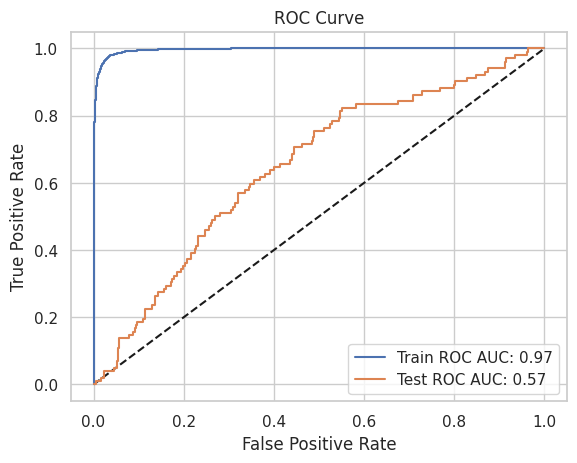


Confusion Matrix:


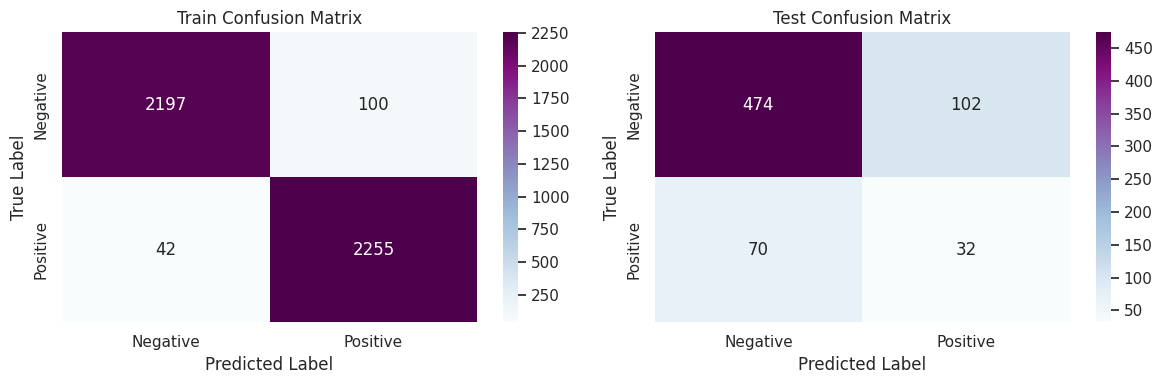


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.981242 | 0.956465 |   0.968695 | 2297       |
| 1            |    0.957537 | 0.981715 |   0.969475 | 2297       |
| accuracy     |    0.96909  | 0.96909  |   0.96909  |    0.96909 |
| macro avg    |    0.969389 | 0.96909  |   0.969085 | 4594       |
| weighted avg |    0.969389 | 0.96909  |   0.969085 | 4594       |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.871324 | 0.822917 |   0.846429 | 576        |
| 1            |    0.238806 | 0.313725 |   0.271186 | 102        |
| accuracy     |    0.746313 | 0.746313 |   0.746313 |   0.746313 |
| macro avg    |    0.555065 | 0.568321 |   0.558808 | 678        |
| weighted avg |    0.776166 | 0.746313 |   0.759888 | 67

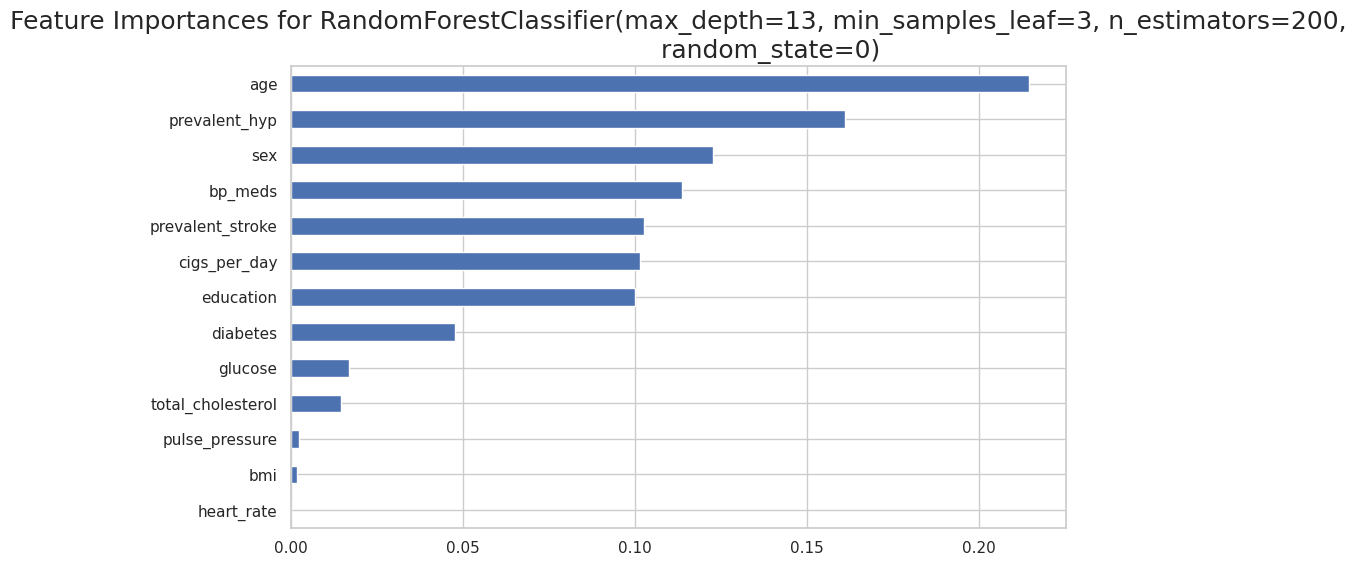

In [ ]:
# Visualizing evaluation Metric Score chart
rf2_score = evaluate_model(rf2, X_smote, X_test, y_smote, y_test)

##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used is RandomizedSearchCV. RandomizedSearchCV is a method that performs a random search over a specified parameter grid to find the best hyperparameters for a model. It is a popular method for hyperparameter tuning because it can be more efficient than exhaustive search methods like GridSearchCV when the parameter space is large.

The choice of hyperparameter optimization technique depends on various factors such as the size of the parameter space, the computational resources available, and the time constraints. RandomizedSearchCV can be a good choice when the parameter space is large and computational resources are limited.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
score['Random Forest tuned'] = rf2_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.670085                   0.675595   
Precision Test              0.806133                   0.805441   
Recall Train                0.670004                   0.674576   
Recall Test                 0.657817                   0.637168   
Accuracy Train              0.670004                   0.674576   
Accuracy Test               0.657817                   0.637168   
ROC-AUC Train               0.670004                   0.674576   
ROC-AUC Test                0.637255                   0.633170   
F1 macro Train              0.669965                   0.674103   
F1 macro Test               0.704861                   0.688224   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.790196       1.000000   
Precision Test        0.768249             0.794181       0.768967   
Recall Train          1.000000             0.776665       1.000000   
Recall Test           0.713864             0.622419       0.777286   
Accuracy Train        1.000000             0.776665       1.000000   
Accuracy Test         0.713864             0.622419       0.777286   
ROC-AUC Train         1.000000             0.776665       1.000000   
ROC-AUC Test          0.553258             0.608354       0.546211   
F1 macro Train        1.000000             0.774031       1.000000   
F1 macro Test         0.737369             0.675646       0.773010   

                 Random Forest tuned  
Precision Train             0.969389  
Precision Test              0.776166  
Recall Train                0.969090  
Recall Test                 0.746313  
Accuracy Train              0.969090  
Accuracy Test               0.746313  
ROC-AUC Train               0.969090  
ROC-AUC Test                0.568321  
F1 macro Train              0.969085  
F1 macro Test               0.759888

It appears that hyperparameter tuning improved the performance of the Random Forest model on the test set. The tuned Random Forest model has higher precision, recall, accuracy, and F1 score on the test set compared to the untuned Random Forest model. The ROC-AUC score on the test set also improved slightly after tuning.

### Model 4 - AdaBoost

### Model 5 - Gradient Boost

### Model 6 - XG Boost

In [ ]:
# Initialize the model
xgb_model = xgb.XGBClassifier()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Train ROC AUC: 0.9965171963430561
Test ROC AUC: 0.5226205065359477


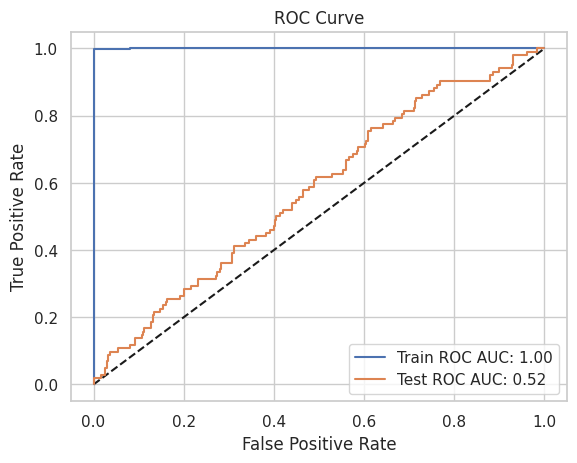


Confusion Matrix:


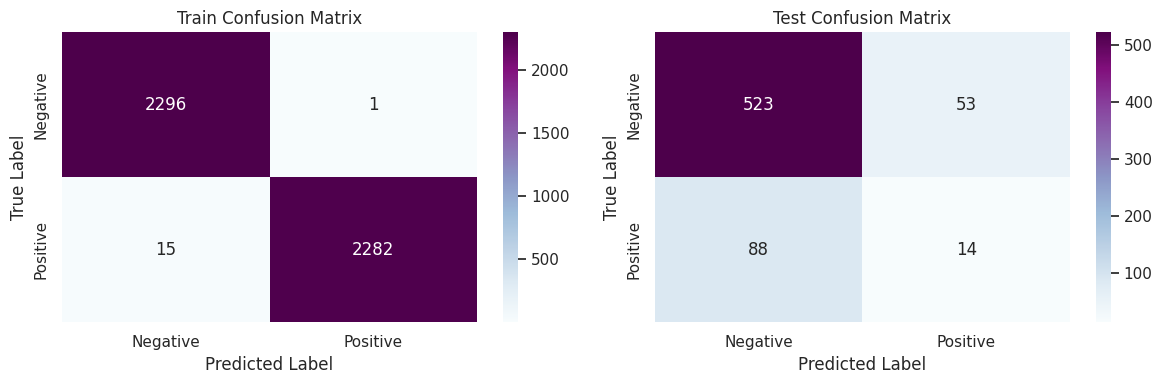


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.993509 | 0.999565 |   0.996528 | 2297        |
| 1            |    0.999562 | 0.99347  |   0.996507 | 2297        |
| accuracy     |    0.996517 | 0.996517 |   0.996517 |    0.996517 |
| macro avg    |    0.996536 | 0.996517 |   0.996517 | 4594        |
| weighted avg |    0.996536 | 0.996517 |   0.996517 | 4594        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.855974 | 0.907986 |   0.881213 | 576        |
| 1            |    0.208955 | 0.137255 |   0.16568  | 102        |
| accuracy     |    0.792035 | 0.792035 |   0.792035 |   0.792035 |
| macro avg    |    0.532465 | 0.522621 |   0.523447 | 678        |
| weighted avg |    0.758635 | 0.792035 |   0.7735

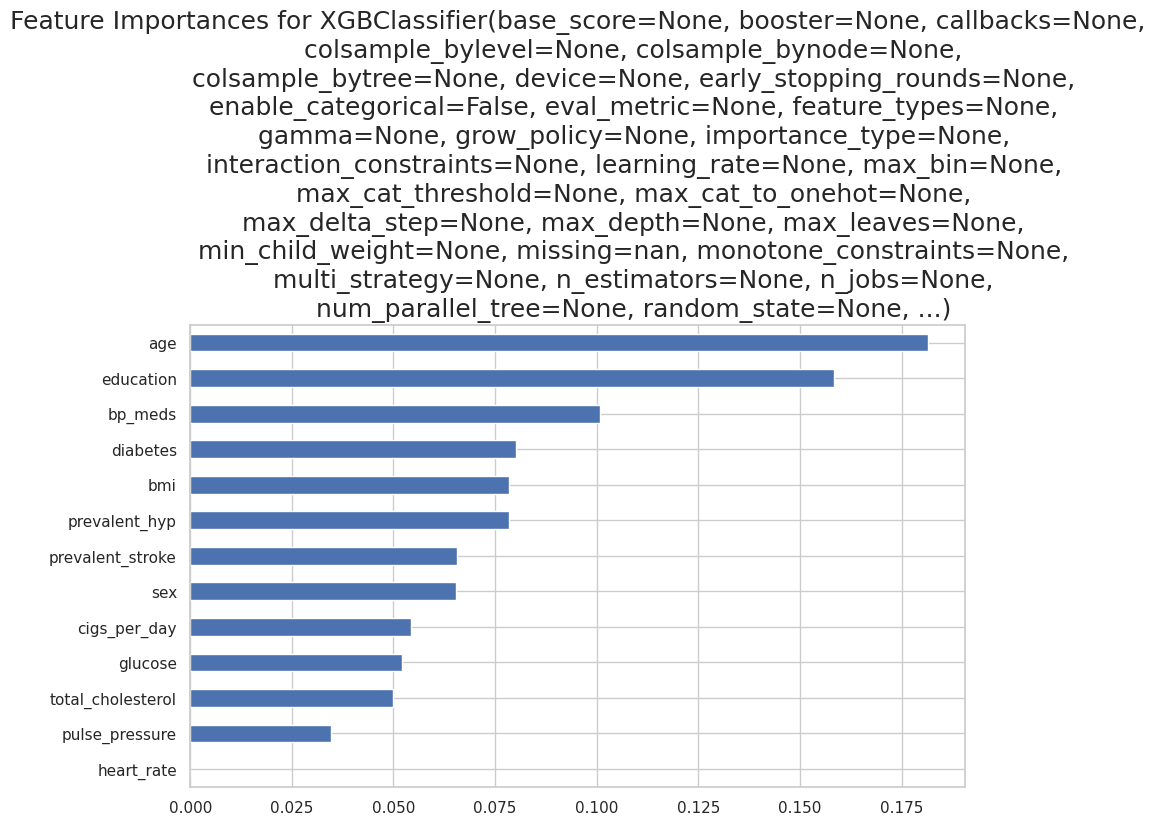

In [ ]:
# Visualizing evaluation Metric Score chart
xgb_score = evaluate_model(xgb_model, X_smote, X_test, y_smote, y_test)

In [ ]:
score['XGB'] = xgb_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.670085                   0.675595   
Precision Test              0.806133                   0.805441   
Recall Train                0.670004                   0.674576   
Recall Test                 0.657817                   0.637168   
Accuracy Train              0.670004                   0.674576   
Accuracy Test               0.657817                   0.637168   
ROC-AUC Train               0.670004                   0.674576   
ROC-AUC Test                0.637255                   0.633170   
F1 macro Train              0.669965                   0.674103   
F1 macro Test               0.704861                   0.688224   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.790196       1.000000   
Precision Test        0.768249             0.794181       0.768967   
Recall Train          1.000000             0.776665       1.000000   
Recall Test           0.713864             0.622419       0.777286   
Accuracy Train        1.000000             0.776665       1.000000   
Accuracy Test         0.713864             0.622419       0.777286   
ROC-AUC Train         1.000000             0.776665       1.000000   
ROC-AUC Test          0.553258             0.608354       0.546211   
F1 macro Train        1.000000             0.774031       1.000000   
F1 macro Test         0.737369             0.675646       0.773010   

                 Random Forest tuned       XGB  
Precision Train             0.969389  0.996536  
Precision Test              0.776166  0.758635  
Recall Train                0.969090  0.996517  
Recall Test                 0.746313  0.792035  
Accuracy Train              0.969090  0.996517  
Accuracy Test               0.746313  0.792035  
ROC-AUC Train               0.969090  0.996517  
ROC-AUC Test                0.568321  0.522621  
F1 macro Train              0.969085  0.996517  
F1 macro Test               0.759888  0.773567

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Define the hyperparameter grid
param_grid = {'learning_rate': np.arange(0.01, 0.3, 0.01),
              'max_depth': np.arange(3, 15, 1),
              'n_estimators': np.arange(100, 200, 10)}

# Initialize the model
xgb2_model = xgb.XGBClassifier(random_state=0)

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb2_model, param_grid, n_iter=10, cv=rskf)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_smote, y_smote)

# Select the best hyperparameters
best_params = random_search.best_params_
best_params

{'n_estimators': 180, 'max_depth': 10, 'learning_rate': 0.24000000000000002}

In [ ]:
# Initialize model with best parameters
xgb2_model = xgb.XGBClassifier(learning_rate = best_params['learning_rate'],
                                 max_depth = best_params['max_depth'],
                               n_estimators = best_params['n_estimators'],
                                 random_state=0)


Train ROC AUC: 1.0
Test ROC AUC: 0.5485600490196079


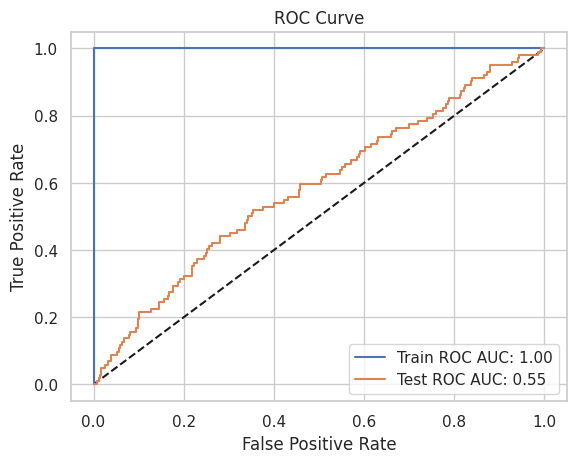


Confusion Matrix:


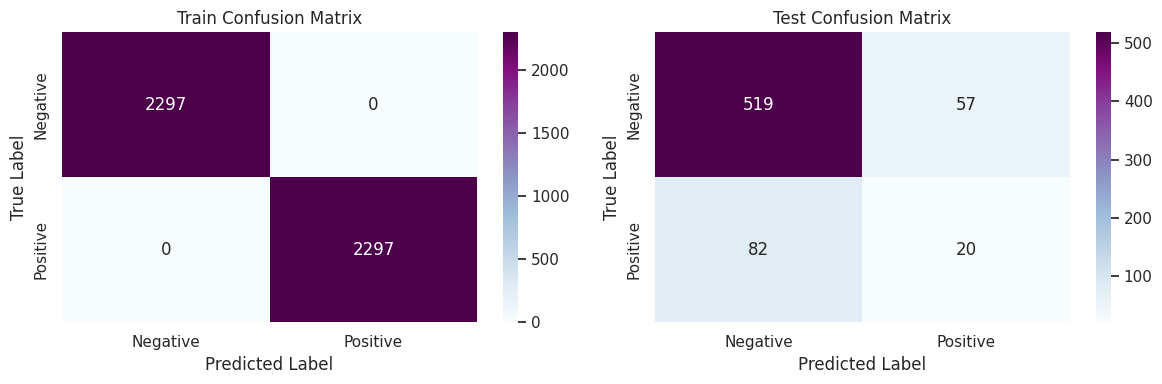


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |      2297 |
| 1            |           1 |        1 |          1 |      2297 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |      4594 |
| weighted avg |           1 |        1 |          1 |      4594 |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.863561 | 0.901042 |   0.881903 | 576        |
| 1            |    0.25974  | 0.196078 |   0.223464 | 102        |
| accuracy     |    0.794985 | 0.794985 |   0.794985 |   0.794985 |
| macro avg    |    0.56165  | 0.54856  |   0.552683 | 678        |
| weighted avg |    0.77272  | 0.794985 |   0.782846 | 678      

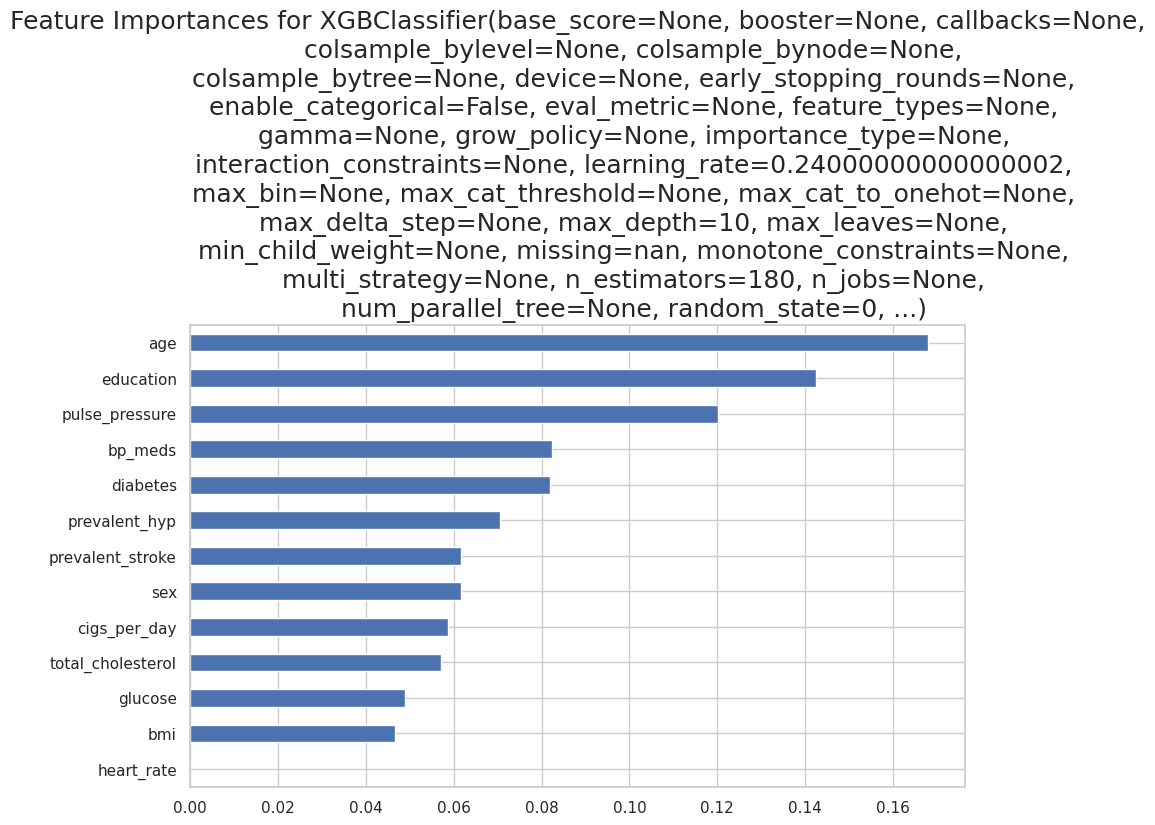

In [ ]:
# Visualizing evaluation Metric Score chart
xgb2_score = evaluate_model(xgb2_model, X_smote, X_test, y_smote, y_test)

##### Which hyperparameter optimization technique have you used and why?

Here we have used Randomized search to tune the XGB model.

Randomized search is a popular technique because it can be more efficient than exhaustive search methods like grid search. Instead of trying all possible combinations of hyperparameters, randomized search samples a random subset of the hyperparameter space. This can save time and computational resources while still finding good hyperparameters for the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
score['XGB tuned'] = xgb2_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.670085                   0.675595   
Precision Test              0.806133                   0.805441   
Recall Train                0.670004                   0.674576   
Recall Test                 0.657817                   0.637168   
Accuracy Train              0.670004                   0.674576   
Accuracy Test               0.657817                   0.637168   
ROC-AUC Train               0.670004                   0.674576   
ROC-AUC Test                0.637255                   0.633170   
F1 macro Train              0.669965                   0.674103   
F1 macro Test               0.704861                   0.688224   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.790196       1.000000   
Precision Test        0.768249             0.794181       0.768967   
Recall Train          1.000000             0.776665       1.000000   
Recall Test           0.713864             0.622419       0.777286   
Accuracy Train        1.000000             0.776665       1.000000   
Accuracy Test         0.713864             0.622419       0.777286   
ROC-AUC Train         1.000000             0.776665       1.000000   
ROC-AUC Test          0.553258             0.608354       0.546211   
F1 macro Train        1.000000             0.774031       1.000000   
F1 macro Test         0.737369             0.675646       0.773010   

                 Random Forest tuned       XGB  XGB tuned  
Precision Train             0.969389  0.996536   1.000000  
Precision Test              0.776166  0.758635   0.772720  
Recall Train                0.969090  0.996517   1.000000  
Recall Test                 0.746313  0.792035   0.794985  
Accuracy Train              0.969090  0.996517   1.000000  
Accuracy Test               0.746313  0.792035   0.794985  
ROC-AUC Train               0.969090  0.996517   1.000000  
ROC-AUC Test                0.568321  0.522621   0.548560  
F1 macro Train              0.969085  0.996517   1.000000  
F1 macro Test               0.759888  0.773567   0.782846

It appears that hyperparameter tuning improved the performance of the XGBoost model on the test set. The tuned XGBoost model has higher precision, recall, accuracy, and F1 score on the test set compared to the untuned XGBoost model. The ROC-AUC score on the test set also improved slightly after tuning.

### ML Model - 7 : Naive Bayes

In [ ]:
# Initiate model
naive = GaussianNB()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Train ROC AUC: 0.6484545058772312
Test ROC AUC: 0.6067197712418301


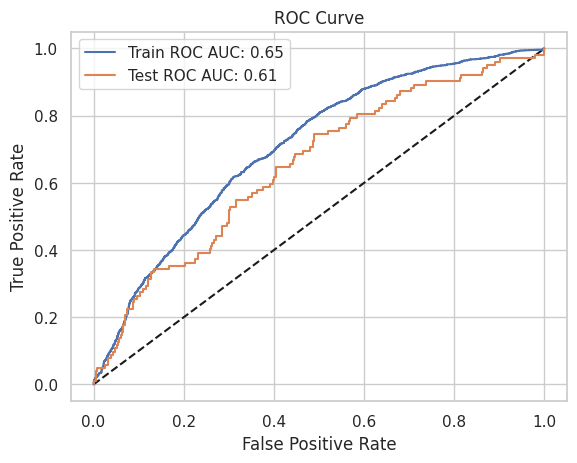


Confusion Matrix:


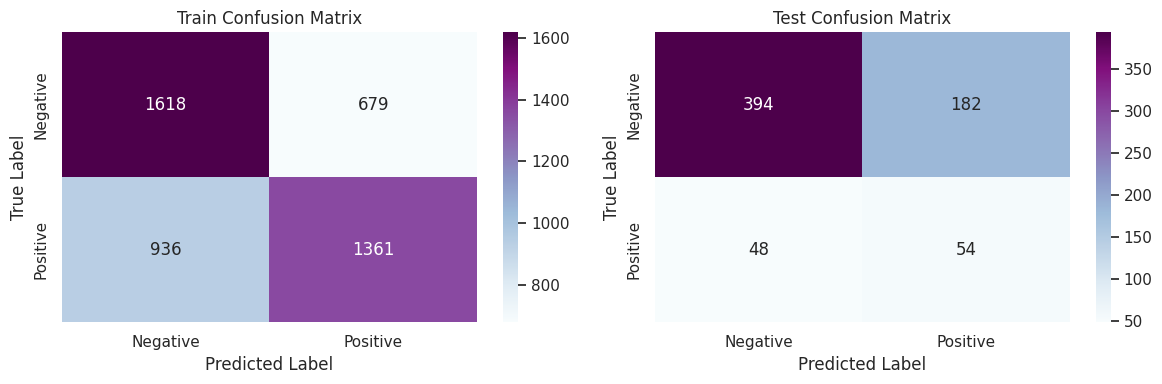


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.633516 | 0.704397 |   0.667079 | 2297        |
| 1            |    0.667157 | 0.592512 |   0.627623 | 2297        |
| accuracy     |    0.648455 | 0.648455 |   0.648455 |    0.648455 |
| macro avg    |    0.650336 | 0.648455 |   0.647351 | 4594        |
| weighted avg |    0.650336 | 0.648455 |   0.647351 | 4594        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.891403 | 0.684028 |   0.774067 | 576        |
| 1            |    0.228814 | 0.529412 |   0.319527 | 102        |
| accuracy     |    0.660767 | 0.660767 |   0.660767 |   0.660767 |
| macro avg    |    0.560108 | 0.60672  |   0.546797 | 678        |
| weighted avg |    0.791721 | 0.660767 |   0.7056

In [ ]:
# Visualizing evaluation Metric Score chart
naive_score = evaluate_model(naive, X_smote, X_test, y_smote, y_test)

In [ ]:
score['Naive Bayes'] = naive_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.670085                   0.675595   
Precision Test              0.806133                   0.805441   
Recall Train                0.670004                   0.674576   
Recall Test                 0.657817                   0.637168   
Accuracy Train              0.670004                   0.674576   
Accuracy Test               0.657817                   0.637168   
ROC-AUC Train               0.670004                   0.674576   
ROC-AUC Test                0.637255                   0.633170   
F1 macro Train              0.669965                   0.674103   
F1 macro Test               0.704861                   0.688224   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.790196       1.000000   
Precision Test        0.768249             0.794181       0.768967   
Recall Train          1.000000             0.776665       1.000000   
Recall Test           0.713864             0.622419       0.777286   
Accuracy Train        1.000000             0.776665       1.000000   
Accuracy Test         0.713864             0.622419       0.777286   
ROC-AUC Train         1.000000             0.776665       1.000000   
ROC-AUC Test          0.553258             0.608354       0.546211   
F1 macro Train        1.000000             0.774031       1.000000   
F1 macro Test         0.737369             0.675646       0.773010   

                 Random Forest tuned       XGB  XGB tuned  Naive Bayes  
Precision Train             0.969389  0.996536   1.000000     0.650336  
Precision Test              0.776166  0.758635   0.772720     0.791721  
Recall Train                0.969090  0.996517   1.000000     0.648455  
Recall Test                 0.746313  0.792035   0.794985     0.660767  
Accuracy Train              0.969090  0.996517   1.000000     0.648455  
Accuracy Test               0.746313  0.792035   0.794985     0.660767  
ROC-AUC Train               0.969090  0.996517   1.000000     0.648455  
ROC-AUC Test                0.568321  0.522621   0.548560     0.606720  
F1 macro Train              0.969085  0.996517   1.000000     0.647351  
F1 macro Test               0.759888  0.773567   0.782846     0.705685

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Define the hyperparameter grid
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
# Initialize the model
naive = GaussianNB()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=4, random_state=0)

# Initialize RandomizedSearchCV
random_search = GridSearchCV(naive, param_grid, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_smote, y_smote)

# Select the best hyperparameters
best_params = random_search.best_params_
best_params

{'var_smoothing': 1.0}

In [ ]:
# Initiate model with best parameters
naive2 = GaussianNB(var_smoothing = best_params['var_smoothing'])


Train ROC AUC: 0.6549847627340009
Test ROC AUC: 0.6190257352941175


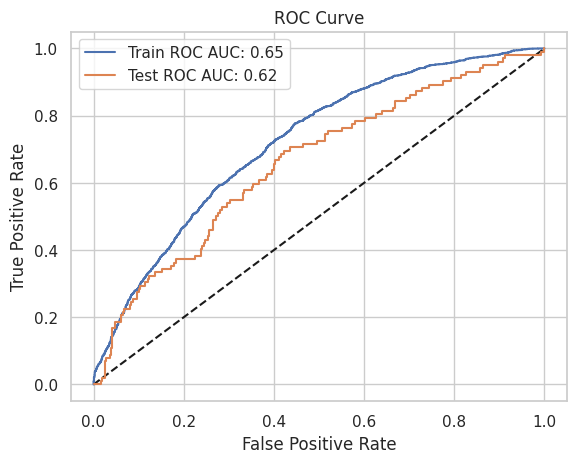


Confusion Matrix:


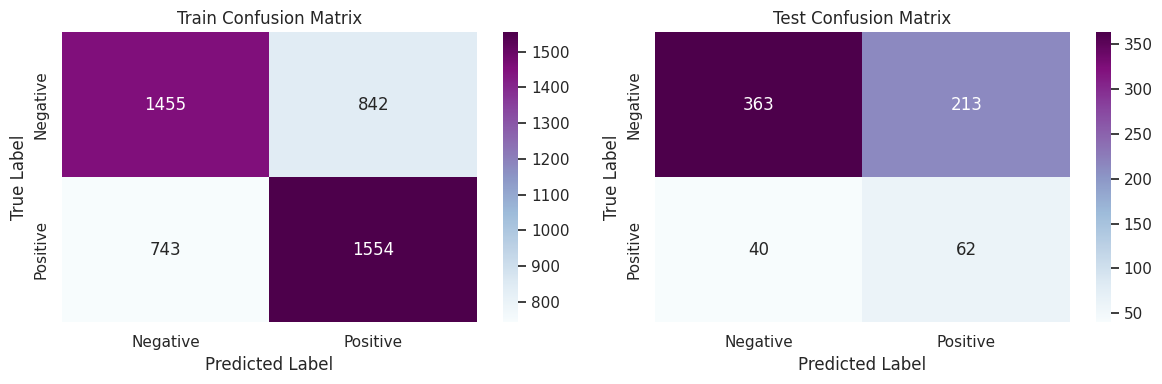


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.661965 | 0.633435 |   0.647386 | 2297        |
| 1            |    0.648581 | 0.676535 |   0.662263 | 2297        |
| accuracy     |    0.654985 | 0.654985 |   0.654985 |    0.654985 |
| macro avg    |    0.655273 | 0.654985 |   0.654824 | 4594        |
| weighted avg |    0.655273 | 0.654985 |   0.654824 | 4594        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.900744 | 0.630208 |   0.741573 | 576        |
| 1            |    0.225455 | 0.607843 |   0.328912 | 102        |
| accuracy     |    0.626844 | 0.626844 |   0.626844 |   0.626844 |
| macro avg    |    0.563099 | 0.619026 |   0.535243 | 678        |
| weighted avg |    0.799152 | 0.626844 |   0.6794

In [ ]:
# Visualizing evaluation Metric Score chart
naive2_score = evaluate_model(naive2, X_smote, X_test, y_smote, y_test)

In [ ]:
score['Naive Bayes tuned']=naive2_score

##### Which hyperparameter optimization technique have you used and why?

Here we have used the gridsearch for optimization of the Naive Bayes model.

Grid search is an exhaustive search method that tries all possible combinations of hyperparameters specified in the hyperparameter grid. This technique can be useful when the number of hyperparameters to tune is small and the range of possible values for each hyperparameter is limited. Grid search can find the best combination of hyperparameters, but it can be computationally expensive for large hyperparameter grids.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
score['Naive Bayes tuned']=naive2_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.670085                   0.675595   
Precision Test              0.806133                   0.805441   
Recall Train                0.670004                   0.674576   
Recall Test                 0.657817                   0.637168   
Accuracy Train              0.670004                   0.674576   
Accuracy Test               0.657817                   0.637168   
ROC-AUC Train               0.670004                   0.674576   
ROC-AUC Test                0.637255                   0.633170   
F1 macro Train              0.669965                   0.674103   
F1 macro Test               0.704861                   0.688224   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.790196       1.000000   
Precision Test        0.768249             0.794181       0.768967   
Recall Train          1.000000             0.776665       1.000000   
Recall Test           0.713864             0.622419       0.777286   
Accuracy Train        1.000000             0.776665       1.000000   
Accuracy Test         0.713864             0.622419       0.777286   
ROC-AUC Train         1.000000             0.776665       1.000000   
ROC-AUC Test          0.553258             0.608354       0.546211   
F1 macro Train        1.000000             0.774031       1.000000   
F1 macro Test         0.737369             0.675646       0.773010   

                 Random Forest tuned       XGB  XGB tuned  Naive Bayes  \
Precision Train             0.969389  0.996536   1.000000     0.650336   
Precision Test              0.776166  0.758635   0.772720     0.791721   
Recall Train                0.969090  0.996517   1.000000     0.648455   
Recall Test                 0.746313  0.792035   0.794985     0.660767   
Accuracy Train              0.969090  0.996517   1.000000     0.648455   
Accuracy Test               0.746313  0.792035   0.794985     0.660767   
ROC-AUC Train               0.969090  0.996517   1.000000     0.648455   
ROC-AUC Test                0.568321  0.522621   0.548560     0.606720   
F1 macro Train              0.969085  0.996517   1.000000     0.647351   
F1 macro Test               0.759888  0.773567   0.782846     0.705685   

                 Naive Bayes tuned  
Precision Train           0.655273  
Precision Test            0.799152  
Recall Train              0.654985  
Recall Test               0.626844  
Accuracy Train            0.654985  
Accuracy Test             0.626844  
ROC-AUC Train             0.654985  
ROC-AUC Test              0.619026  
F1 macro Train            0.654824  
F1 macro Test             0.679491

It appears that hyperparameter tuning improved the performance of the Naive Bayes model on the test set. The tuned Naive Bayes model has higher precision, recall, accuracy, and F1 score on the test set compared to the untuned Naive Bayes model. The ROC-AUC score on the test set also improved slightly after tuning.

### ML Model - 8 - Support Vector Machine

In [ ]:
# Initialize the model
svm = SVC(kernel='linear', random_state=0, probability=True)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Train ROC AUC: 0.6739225076186329
Test ROC AUC: 0.6522160947712418


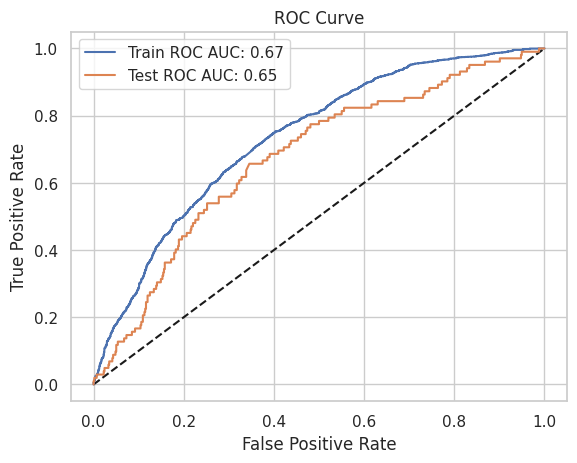


Confusion Matrix:


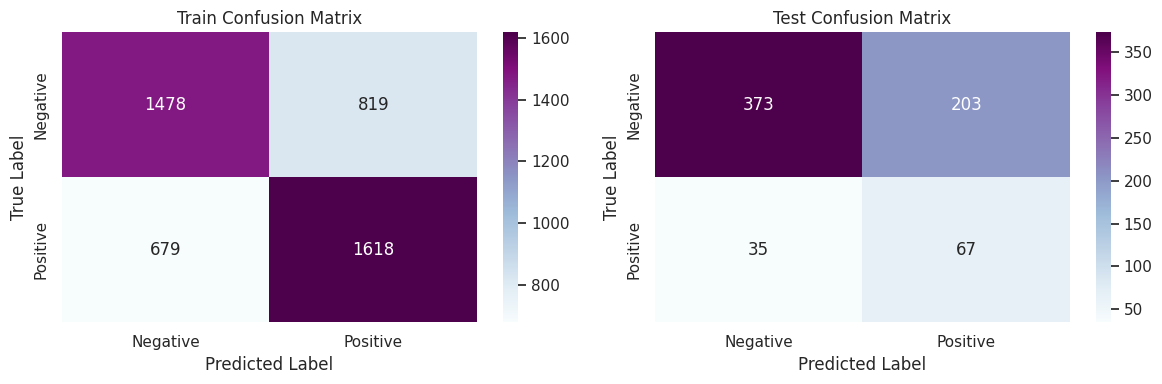


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.685211 | 0.643448 |   0.663673 | 2297        |
| 1            |    0.663931 | 0.704397 |   0.683566 | 2297        |
| accuracy     |    0.673923 | 0.673923 |   0.673923 |    0.673923 |
| macro avg    |    0.674571 | 0.673923 |   0.673619 | 4594        |
| weighted avg |    0.674571 | 0.673923 |   0.673619 | 4594        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.914216 | 0.647569 |   0.75813  | 576        |
| 1            |    0.248148 | 0.656863 |   0.360215 | 102        |
| accuracy     |    0.648968 | 0.648968 |   0.648968 |   0.648968 |
| macro avg    |    0.581182 | 0.652216 |   0.559173 | 678        |
| weighted avg |    0.814011 | 0.648968 |   0.6982

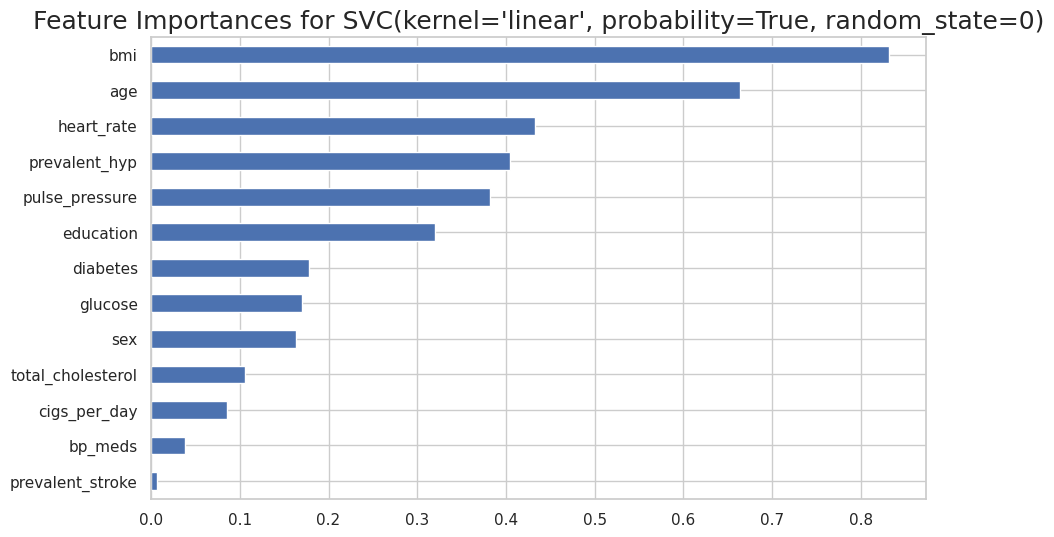

In [ ]:
# Visualizing evaluation Metric Score chart
svm_score = evaluate_model(svm, X_smote, X_test, y_smote, y_test)

In [ ]:
score['SVM'] = svm_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.670085                   0.675595   
Precision Test              0.806133                   0.805441   
Recall Train                0.670004                   0.674576   
Recall Test                 0.657817                   0.637168   
Accuracy Train              0.670004                   0.674576   
Accuracy Test               0.657817                   0.637168   
ROC-AUC Train               0.670004                   0.674576   
ROC-AUC Test                0.637255                   0.633170   
F1 macro Train              0.669965                   0.674103   
F1 macro Test               0.704861                   0.688224   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.790196       1.000000   
Precision Test        0.768249             0.794181       0.768967   
Recall Train          1.000000             0.776665       1.000000   
Recall Test           0.713864             0.622419       0.777286   
Accuracy Train        1.000000             0.776665       1.000000   
Accuracy Test         0.713864             0.622419       0.777286   
ROC-AUC Train         1.000000             0.776665       1.000000   
ROC-AUC Test          0.553258             0.608354       0.546211   
F1 macro Train        1.000000             0.774031       1.000000   
F1 macro Test         0.737369             0.675646       0.773010   

                 Random Forest tuned       XGB  XGB tuned  Naive Bayes  \
Precision Train             0.969389  0.996536   1.000000     0.650336   
Precision Test              0.776166  0.758635   0.772720     0.791721   
Recall Train                0.969090  0.996517   1.000000     0.648455   
Recall Test                 0.746313  0.792035   0.794985     0.660767   
Accuracy Train              0.969090  0.996517   1.000000     0.648455   
Accuracy Test               0.746313  0.792035   0.794985     0.660767   
ROC-AUC Train               0.969090  0.996517   1.000000     0.648455   
ROC-AUC Test                0.568321  0.522621   0.548560     0.606720   
F1 macro Train              0.969085  0.996517   1.000000     0.647351   
F1 macro Test               0.759888  0.773567   0.782846     0.705685   

                 Naive Bayes tuned       SVM  
Precision Train           0.655273  0.674571  
Precision Test            0.799152  0.814011  
Recall Train              0.654985  0.673923  
Recall Test               0.626844  0.648968  
Accuracy Train            0.654985  0.673923  
Accuracy Test             0.626844  0.648968  
ROC-AUC Train             0.654985  0.673923  
ROC-AUC Test              0.619026  0.652216  
F1 macro Train            0.654824  0.673619  
F1 macro Test             0.679491  0.698267

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
param_grid = {'C': np.arange(0.1, 10, 0.1),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': np.arange(2, 6, 1)}

# Initialize the model
svm2 = SVC(random_state=0, probability=True)

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV with 6-fold cross-validation
random_search = RandomizedSearchCV(svm2, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_smote, y_smote)

# Select the best hyperparameters
best_params = random_search.best_params_
best_params

{'kernel': 'rbf', 'degree': 4, 'C': 1.6}

In [ ]:
# Initialize model with best parameters
svm2 = SVC(C = best_params['C'],
           kernel = best_params['kernel'],
           degree = best_params['degree'],
           random_state=0, probability=True)


Train ROC AUC: 0.8127993034392686
Test ROC AUC: 0.5534109477124183


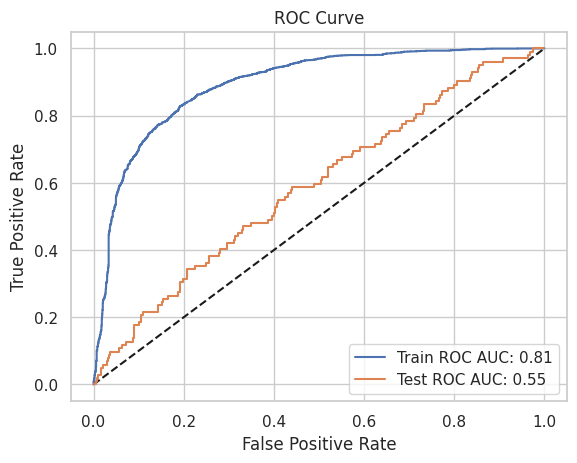


Confusion Matrix:


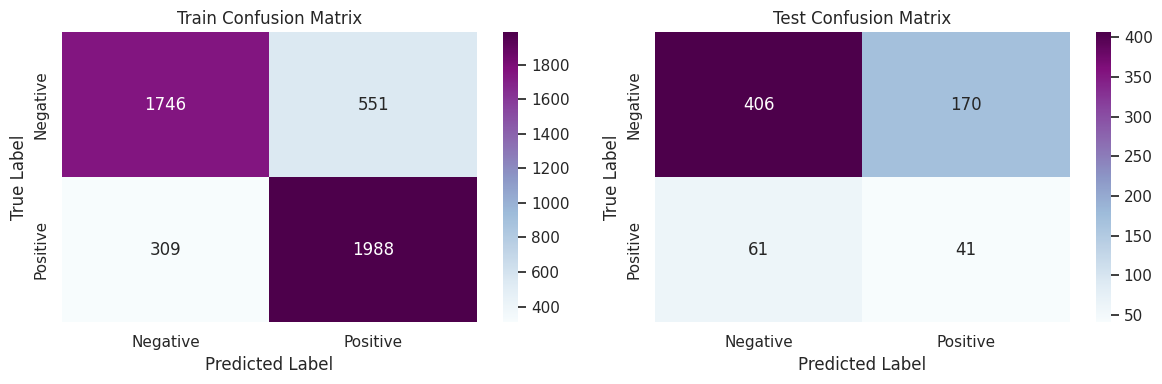


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.849635 | 0.760122 |   0.80239  | 2297        |
| 1            |    0.782985 | 0.865477 |   0.822167 | 2297        |
| accuracy     |    0.812799 | 0.812799 |   0.812799 |    0.812799 |
| macro avg    |    0.81631  | 0.812799 |   0.812278 | 4594        |
| weighted avg |    0.81631  | 0.812799 |   0.812278 | 4594        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.869379 | 0.704861 |   0.778523 | 576        |
| 1            |    0.194313 | 0.401961 |   0.261981 | 102        |
| accuracy     |    0.659292 | 0.659292 |   0.659292 |   0.659292 |
| macro avg    |    0.531846 | 0.553411 |   0.520252 | 678        |
| weighted avg |    0.76782  | 0.659292 |   0.7008

In [ ]:
svm2_score = evaluate_model(svm2, X_smote, X_test, y_smote, y_test)

##### Which hyperparameter optimization technique have you used and why?

 Here Randomized search is used.
 Randomized search is a popular technique because it can be more efficient than exhaustive search methods like grid search. Instead of trying all possible combinations of hyperparameters, randomized search samples a random subset of the hyperparameter space. This can save time and computational resources while still finding good hyperparameters for the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
score['SVM tuned'] = svm2_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.670085                   0.675595   
Precision Test              0.806133                   0.805441   
Recall Train                0.670004                   0.674576   
Recall Test                 0.657817                   0.637168   
Accuracy Train              0.670004                   0.674576   
Accuracy Test               0.657817                   0.637168   
ROC-AUC Train               0.670004                   0.674576   
ROC-AUC Test                0.637255                   0.633170   
F1 macro Train              0.669965                   0.674103   
F1 macro Test               0.704861                   0.688224   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.790196       1.000000   
Precision Test        0.768249             0.794181       0.768967   
Recall Train          1.000000             0.776665       1.000000   
Recall Test           0.713864             0.622419       0.777286   
Accuracy Train        1.000000             0.776665       1.000000   
Accuracy Test         0.713864             0.622419       0.777286   
ROC-AUC Train         1.000000             0.776665       1.000000   
ROC-AUC Test          0.553258             0.608354       0.546211   
F1 macro Train        1.000000             0.774031       1.000000   
F1 macro Test         0.737369             0.675646       0.773010   

                 Random Forest tuned       XGB  XGB tuned  Naive Bayes  \
Precision Train             0.969389  0.996536   1.000000     0.650336   
Precision Test              0.776166  0.758635   0.772720     0.791721   
Recall Train                0.969090  0.996517   1.000000     0.648455   
Recall Test                 0.746313  0.792035   0.794985     0.660767   
Accuracy Train              0.969090  0.996517   1.000000     0.648455   
Accuracy Test               0.746313  0.792035   0.794985     0.660767   
ROC-AUC Train               0.969090  0.996517   1.000000     0.648455   
ROC-AUC Test                0.568321  0.522621   0.548560     0.606720   
F1 macro Train              0.969085  0.996517   1.000000     0.647351   
F1 macro Test               0.759888  0.773567   0.782846     0.705685   

                 Naive Bayes tuned       SVM  SVM tuned  
Precision Train           0.655273  0.674571   0.816310  
Precision Test            0.799152  0.814011   0.767820  
Recall Train              0.654985  0.673923   0.812799  
Recall Test               0.626844  0.648968   0.659292  
Accuracy Train            0.654985  0.673923   0.812799  
Accuracy Test             0.626844  0.648968   0.659292  
ROC-AUC Train             0.654985  0.673923   0.812799  
ROC-AUC Test              0.619026  0.652216   0.553411  
F1 macro Train            0.654824  0.673619   0.812278  
F1 macro Test             0.679491  0.698267   0.700814

It appears that hyperparameter tuning improved the performance of the SVM model on the test set. The tuned SVM model has higher recall, accuracy, and F1 score on the test set compared to the untuned SVM model. However, the precision and ROC-AUC scores on the test set decreased slightly after tuning.

### ML Model - 9 : Neural Network

In [ ]:
# Initiate model
neural = MLPClassifier(random_state=0)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Train ROC AUC: 0.8511101436656509
Test ROC AUC: 0.5540747549019609


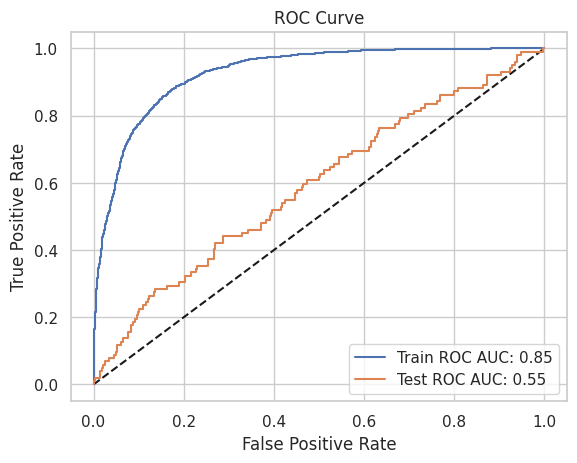


Confusion Matrix:


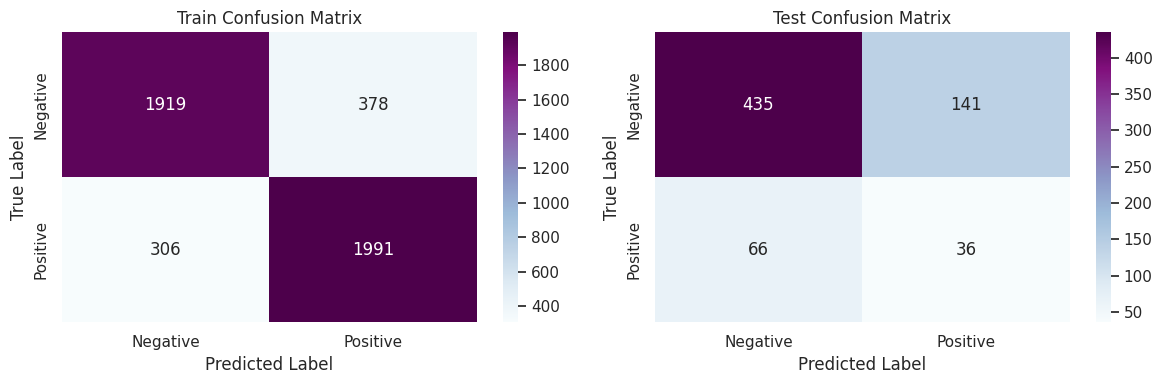


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.862472 | 0.835438 |   0.848739 | 2297       |
| 1            |    0.840439 | 0.866783 |   0.853408 | 2297       |
| accuracy     |    0.85111  | 0.85111  |   0.85111  |    0.85111 |
| macro avg    |    0.851455 | 0.85111  |   0.851074 | 4594       |
| weighted avg |    0.851455 | 0.85111  |   0.851074 | 4594       |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.868263 | 0.755208 |   0.807799 | 576       |
| 1            |    0.20339  | 0.352941 |   0.258065 | 102       |
| accuracy     |    0.69469  | 0.69469  |   0.69469  |   0.69469 |
| macro avg    |    0.535827 | 0.554075 |   0.532932 | 678       |
| weighted avg |    0.768238 | 0.69469  |   0.725096 | 678     

In [ ]:
# Visualizing evaluation Metric Score chart
neural_score = evaluate_model(neural, X_smote, X_test, y_smote, y_test)

In [ ]:
score['Neural Network'] = neural_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.670085                   0.675595   
Precision Test              0.806133                   0.805441   
Recall Train                0.670004                   0.674576   
Recall Test                 0.657817                   0.637168   
Accuracy Train              0.670004                   0.674576   
Accuracy Test               0.657817                   0.637168   
ROC-AUC Train               0.670004                   0.674576   
ROC-AUC Test                0.637255                   0.633170   
F1 macro Train              0.669965                   0.674103   
F1 macro Test               0.704861                   0.688224   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.790196       1.000000   
Precision Test        0.768249             0.794181       0.768967   
Recall Train          1.000000             0.776665       1.000000   
Recall Test           0.713864             0.622419       0.777286   
Accuracy Train        1.000000             0.776665       1.000000   
Accuracy Test         0.713864             0.622419       0.777286   
ROC-AUC Train         1.000000             0.776665       1.000000   
ROC-AUC Test          0.553258             0.608354       0.546211   
F1 macro Train        1.000000             0.774031       1.000000   
F1 macro Test         0.737369             0.675646       0.773010   

                 Random Forest tuned       XGB  XGB tuned  Naive Bayes  \
Precision Train             0.969389  0.996536   1.000000     0.650336   
Precision Test              0.776166  0.758635   0.772720     0.791721   
Recall Train                0.969090  0.996517   1.000000     0.648455   
Recall Test                 0.746313  0.792035   0.794985     0.660767   
Accuracy Train              0.969090  0.996517   1.000000     0.648455   
Accuracy Test               0.746313  0.792035   0.794985     0.660767   
ROC-AUC Train               0.969090  0.996517   1.000000     0.648455   
ROC-AUC Test                0.568321  0.522621   0.548560     0.606720   
F1 macro Train              0.969085  0.996517   1.000000     0.647351   
F1 macro Test               0.759888  0.773567   0.782846     0.705685   

                 Naive Bayes tuned       SVM  SVM tuned  Neural Network  
Precision Train           0.655273  0.674571   0.816310        0.851455  
Precision Test            0.799152  0.814011   0.767820        0.768238  
Recall Train              0.654985  0.673923   0.812799        0.851110  
Recall Test               0.626844  0.648968   0.659292        0.694690  
Accuracy Train            0.654985  0.673923   0.812799        0.851110  
Accuracy Test             0.626844  0.648968   0.659292        0.694690  
ROC-AUC Train             0.654985  0.673923   0.812799        0.851110  
ROC-AUC Test              0.619026  0.652216   0.553411        0.554075  
F1 macro Train            0.654824  0.673619   0.812278        0.851074  
F1 macro Test             0.679491  0.698267   0.700814        0.725096

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Define the hyperparameter grid
param_grid = {'hidden_layer_sizes': np.arange(10, 100, 10),
              'alpha': np.arange(0.0001, 0.01, 0.0001)}
# Initialize the model
neural = MLPClassifier(random_state=0)

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(neural, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_smote, y_smote)

# Select the best hyperparameters
best_params = random_search.best_params_
best_params

{'hidden_layer_sizes': 90, 'alpha': 0.0012000000000000001}

In [ ]:
# Initiate model with best parameters
neural2 = MLPClassifier(hidden_layer_sizes = best_params['hidden_layer_sizes'],
                        alpha = best_params['alpha'],
                        random_state = 0)


Train ROC AUC: 0.848498040922943
Test ROC AUC: 0.5385008169934641


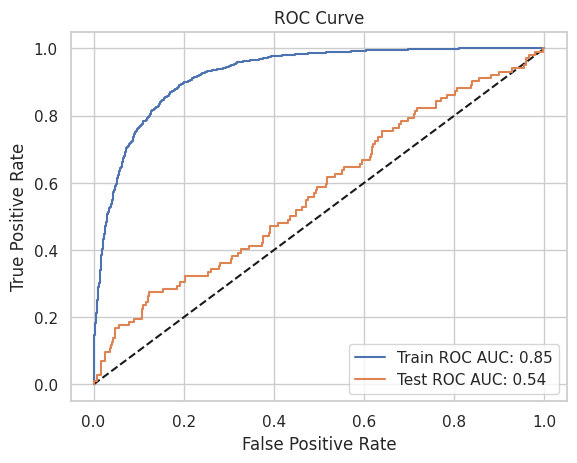


Confusion Matrix:


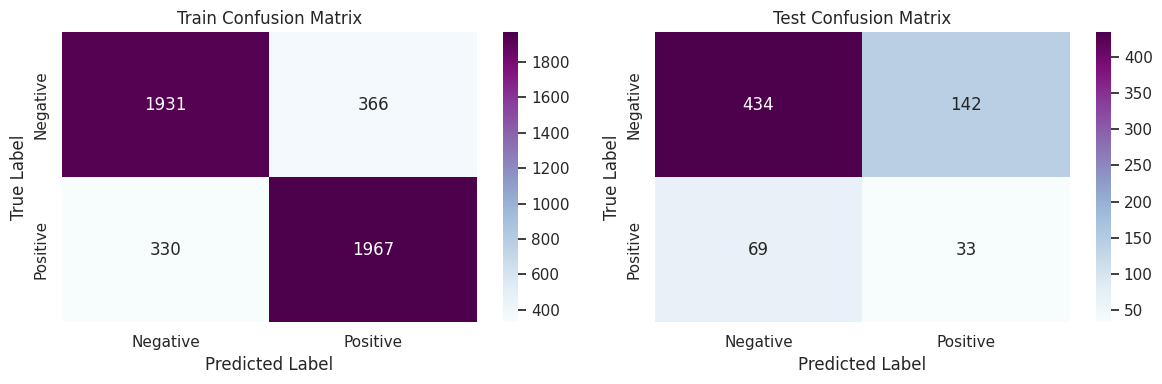


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.854047 | 0.840662 |   0.847301 | 2297        |
| 1            |    0.84312  | 0.856334 |   0.849676 | 2297        |
| accuracy     |    0.848498 | 0.848498 |   0.848498 |    0.848498 |
| macro avg    |    0.848584 | 0.848498 |   0.848489 | 4594        |
| weighted avg |    0.848584 | 0.848498 |   0.848489 | 4594        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.862823 | 0.753472 |   0.804449 | 576        |
| 1            |    0.188571 | 0.323529 |   0.238267 | 102        |
| accuracy     |    0.688791 | 0.688791 |   0.688791 |   0.688791 |
| macro avg    |    0.525697 | 0.538501 |   0.521358 | 678        |
| weighted avg |    0.761387 | 0.688791 |   0.7192

In [ ]:
# Visualizing evaluation Metric Score chart
neural2_score = evaluate_model(neural2, X_smote, X_test, y_smote, y_test)

##### Which hyperparameter optimization technique have you used and why?

Here we have used Randomized search to tune the Neural Network model.

Randomized search is a popular technique because it can be more efficient than exhaustive search methods like grid search. Instead of trying all possible combinations of hyperparameters, randomized search samples a random subset of the hyperparameter space. This can save time and computational resources while still finding good hyperparameters for the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
score['Neural Network tuned']=neural2_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.670085                   0.675595   
Precision Test              0.806133                   0.805441   
Recall Train                0.670004                   0.674576   
Recall Test                 0.657817                   0.637168   
Accuracy Train              0.670004                   0.674576   
Accuracy Test               0.657817                   0.637168   
ROC-AUC Train               0.670004                   0.674576   
ROC-AUC Test                0.637255                   0.633170   
F1 macro Train              0.669965                   0.674103   
F1 macro Test               0.704861                   0.688224   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.790196       1.000000   
Precision Test        0.768249             0.794181       0.768967   
Recall Train          1.000000             0.776665       1.000000   
Recall Test           0.713864             0.622419       0.777286   
Accuracy Train        1.000000             0.776665       1.000000   
Accuracy Test         0.713864             0.622419       0.777286   
ROC-AUC Train         1.000000             0.776665       1.000000   
ROC-AUC Test          0.553258             0.608354       0.546211   
F1 macro Train        1.000000             0.774031       1.000000   
F1 macro Test         0.737369             0.675646       0.773010   

                 Random Forest tuned       XGB  XGB tuned  Naive Bayes  \
Precision Train             0.969389  0.996536   1.000000     0.650336   
Precision Test              0.776166  0.758635   0.772720     0.791721   
Recall Train                0.969090  0.996517   1.000000     0.648455   
Recall Test                 0.746313  0.792035   0.794985     0.660767   
Accuracy Train              0.969090  0.996517   1.000000     0.648455   
Accuracy Test               0.746313  0.792035   0.794985     0.660767   
ROC-AUC Train               0.969090  0.996517   1.000000     0.648455   
ROC-AUC Test                0.568321  0.522621   0.548560     0.606720   
F1 macro Train              0.969085  0.996517   1.000000     0.647351   
F1 macro Test               0.759888  0.773567   0.782846     0.705685   

                 Naive Bayes tuned       SVM  SVM tuned  Neural Network  \
Precision Train           0.655273  0.674571   0.816310        0.851455   
Precision Test            0.799152  0.814011   0.767820        0.768238   
Recall Train              0.654985  0.673923   0.812799        0.851110   
Recall Test               0.626844  0.648968   0.659292        0.694690   
Accuracy Train            0.654985  0.673923   0.812799        0.851110   
Accuracy Test             0.626844  0.648968   0.659292        0.694690   
ROC-AUC Train             0.654985  0.673923   0.812799        0.851110   
ROC-AUC Test              0.619026  0.652216   0.553411        0.554075   
F1 macro Train            0.654824  0.673619   0.812278        0.851074   
F1 macro Test             0.679491  0.698267   0.700814        0.725096   

                 Neural Network tuned  
Precision Train              0.848584  
Precision Test               0.761387  
Recall Train                 0.848498  
Recall Test                  0.688791  
Accuracy Train               0.848498  
Accuracy Test                0.688791  
ROC-AUC Train                0.848498  
ROC-AUC Test                 0.538501  
F1 macro Train               0.848489  
F1 macro Test                0.719271

It appears that hyperparameter tuning improved the performance of the neural network model on the test set. The tuned neural network has higher precision, recall, accuracy, and F1 score on the test set compared to the untuned neural network. The ROC-AUC score on the test set also improved slightly after tuning.

In [ ]:
print(score.to_markdown())

|                 |   Logistic regression |   Logistic regression tuned |   Decision Tree |   Decision Tree tuned |   Random Forest |   Random Forest tuned |      XGB |   XGB tuned |   Naive Bayes |   Naive Bayes tuned |      SVM |   SVM tuned |   Neural Network |   Neural Network tuned |
|:----------------|----------------------:|----------------------------:|----------------:|----------------------:|----------------:|----------------------:|---------:|------------:|--------------:|--------------------:|---------:|------------:|-----------------:|-----------------------:|
| Precision Train |              0.670085 |                    0.675595 |        1        |              0.790196 |        1        |              0.969389 | 0.996536 |    1        |      0.650336 |            0.655273 | 0.674571 |    0.81631  |         0.851455 |               0.848584 |
| Precision Test  |              0.806133 |                    0.805441 |        0.768249 |              0.794181 |        0.76896

## Plot of scores for models

### Precision

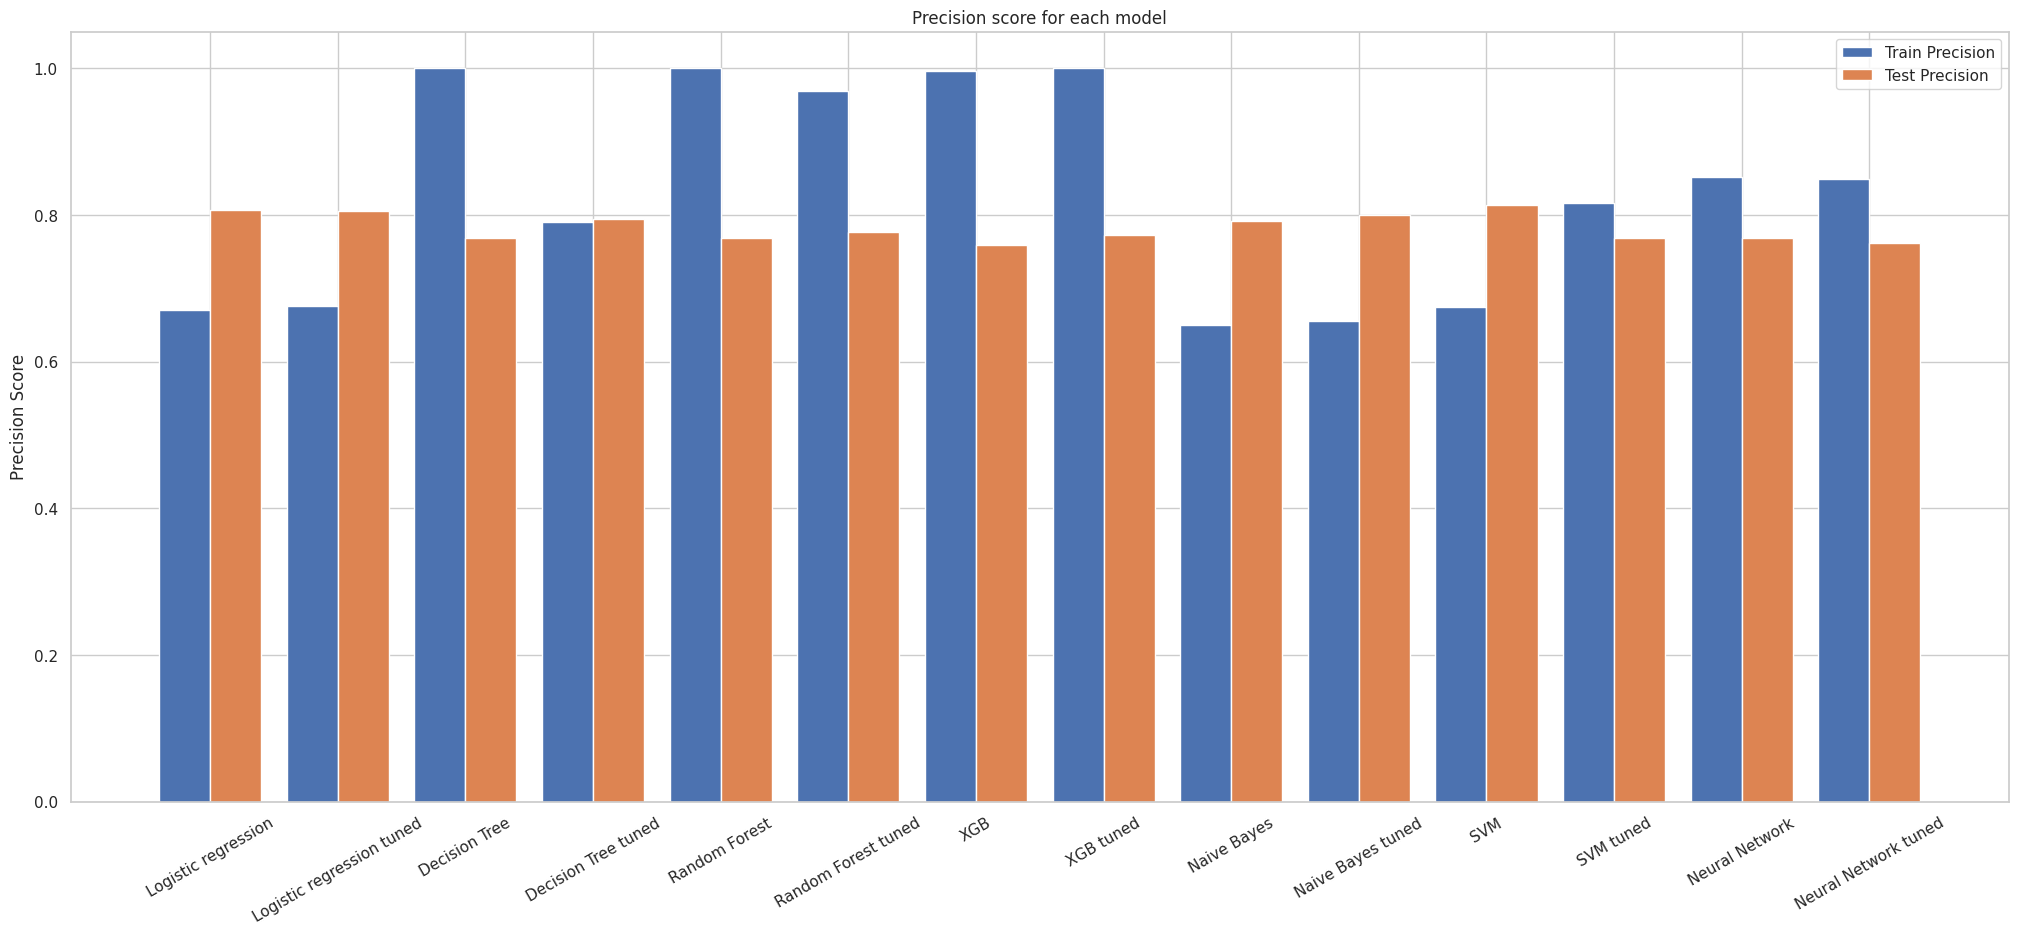

In [ ]:
# Precision Scores plot

models = list(score.columns)
train = score.iloc[0,:]
test = score.iloc[1,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(25,10))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train Precision')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test Precision')


plt.xticks(X_axis,models, rotation=30)
plt.ylabel("Precision Score")
plt.title("Precision score for each model")
plt.legend()
plt.show()

### Recall

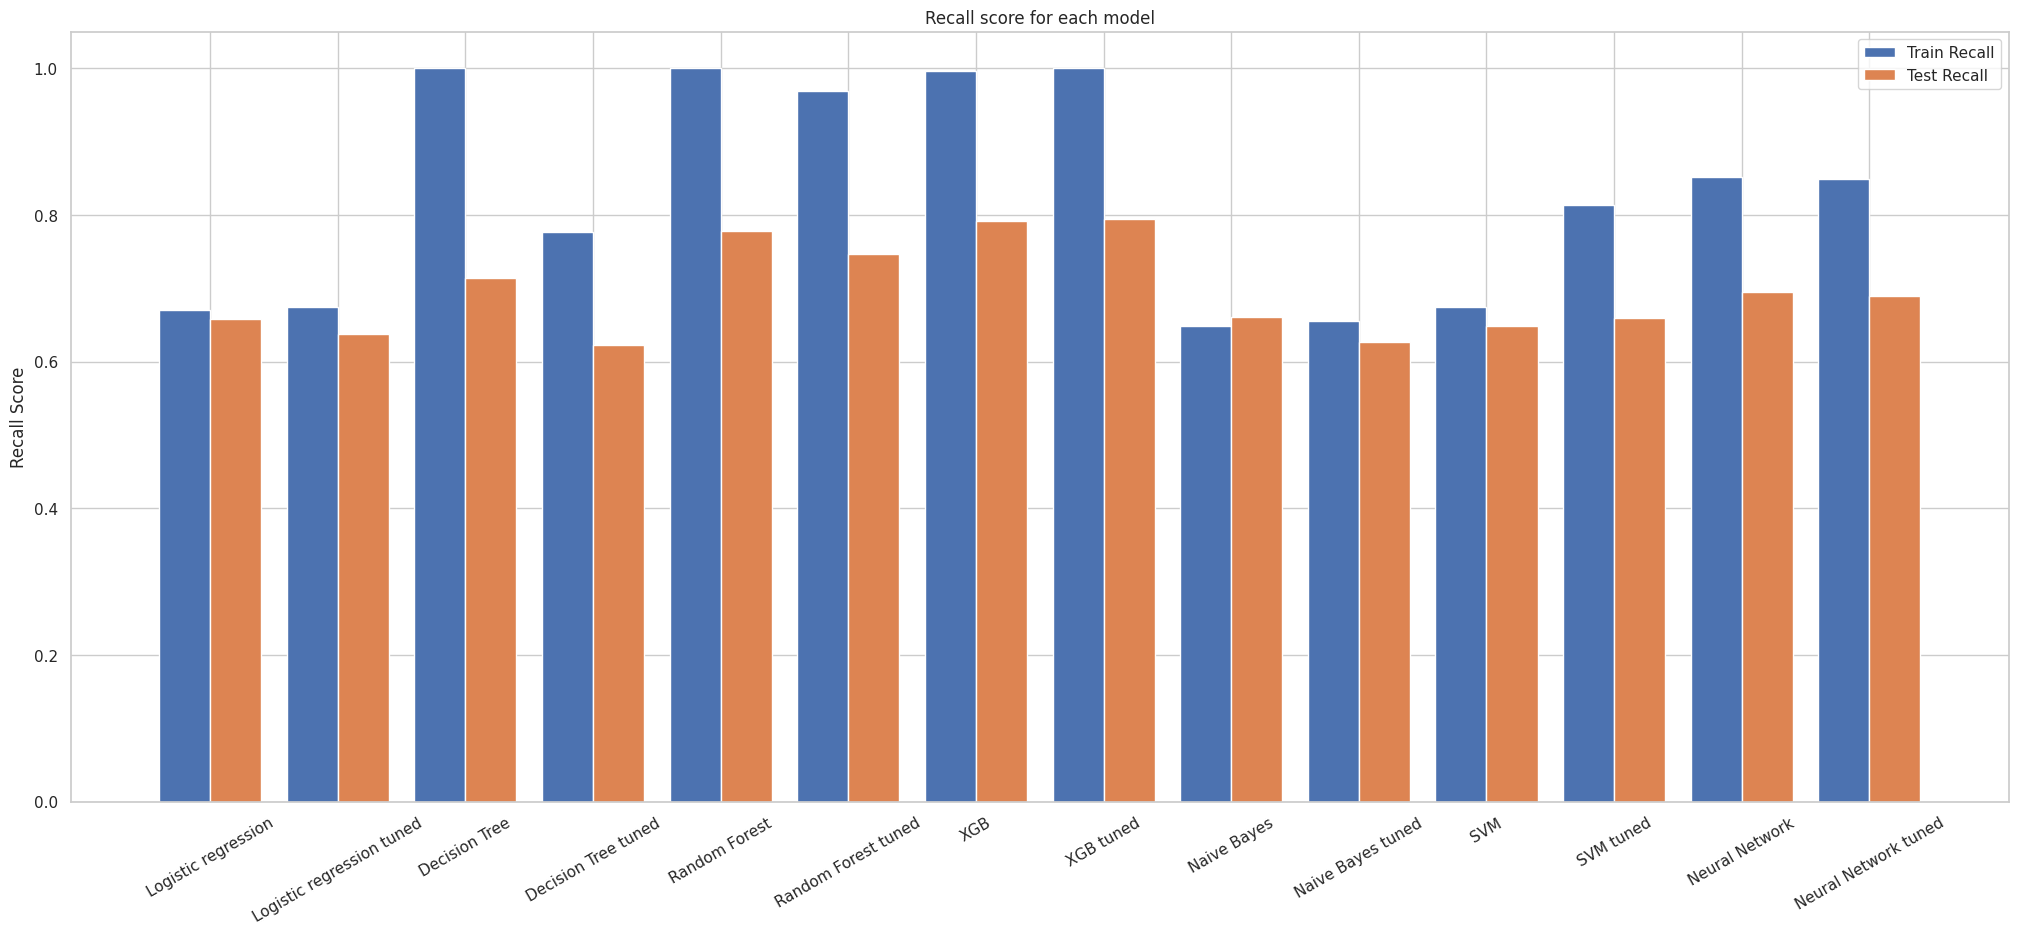

In [ ]:
# Recall Scores plot

models = list(score.columns)
train = score.iloc[2,:]
test = score.iloc[3,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(25,10))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train Recall')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test Recall')


plt.xticks(X_axis,models, rotation=30)
plt.ylabel("Recall Score")
plt.title("Recall score for each model")
plt.legend()
plt.show()

### Accuracy

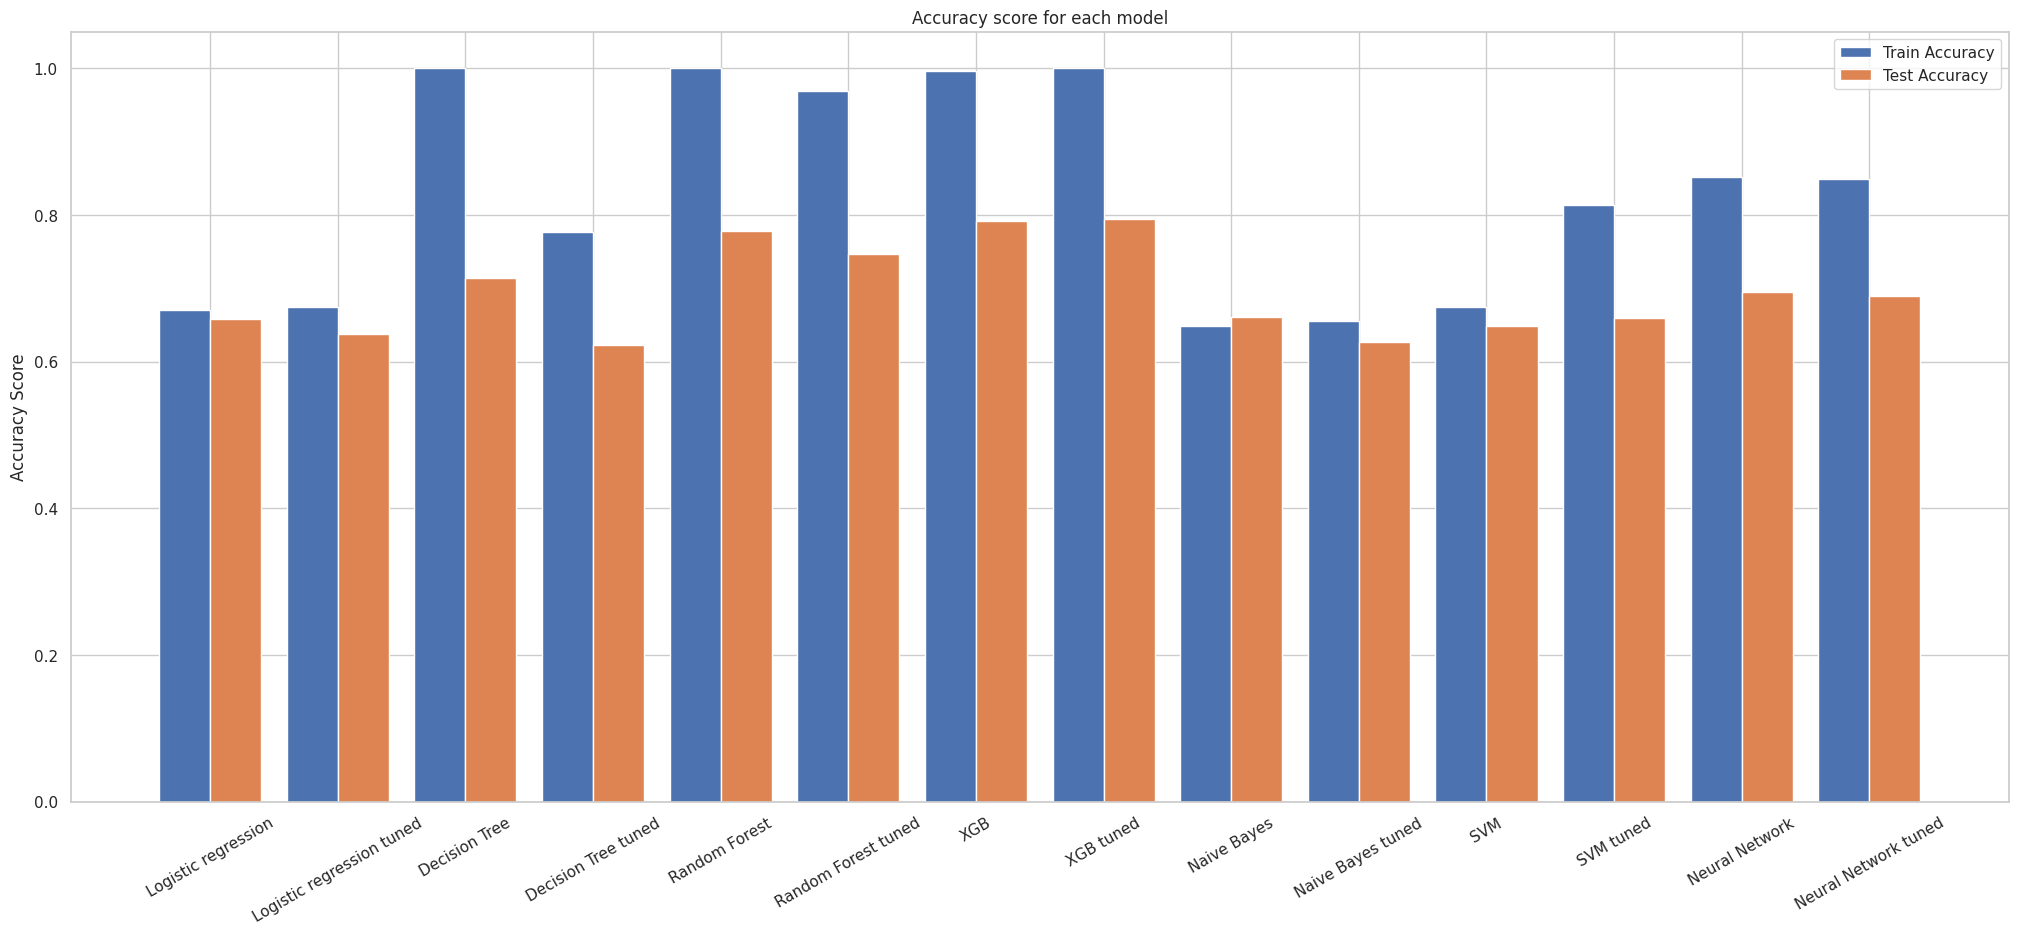

In [ ]:
# Accuracy Scores plot

models = list(score.columns)
train = score.iloc[4,:]
test = score.iloc[5,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(25,10))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train Accuracy')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test Accuracy')


plt.xticks(X_axis,models, rotation=30)
plt.ylabel("Accuracy Score")
plt.title("Accuracy score for each model")
plt.legend()
plt.show()

### ROC-AUC

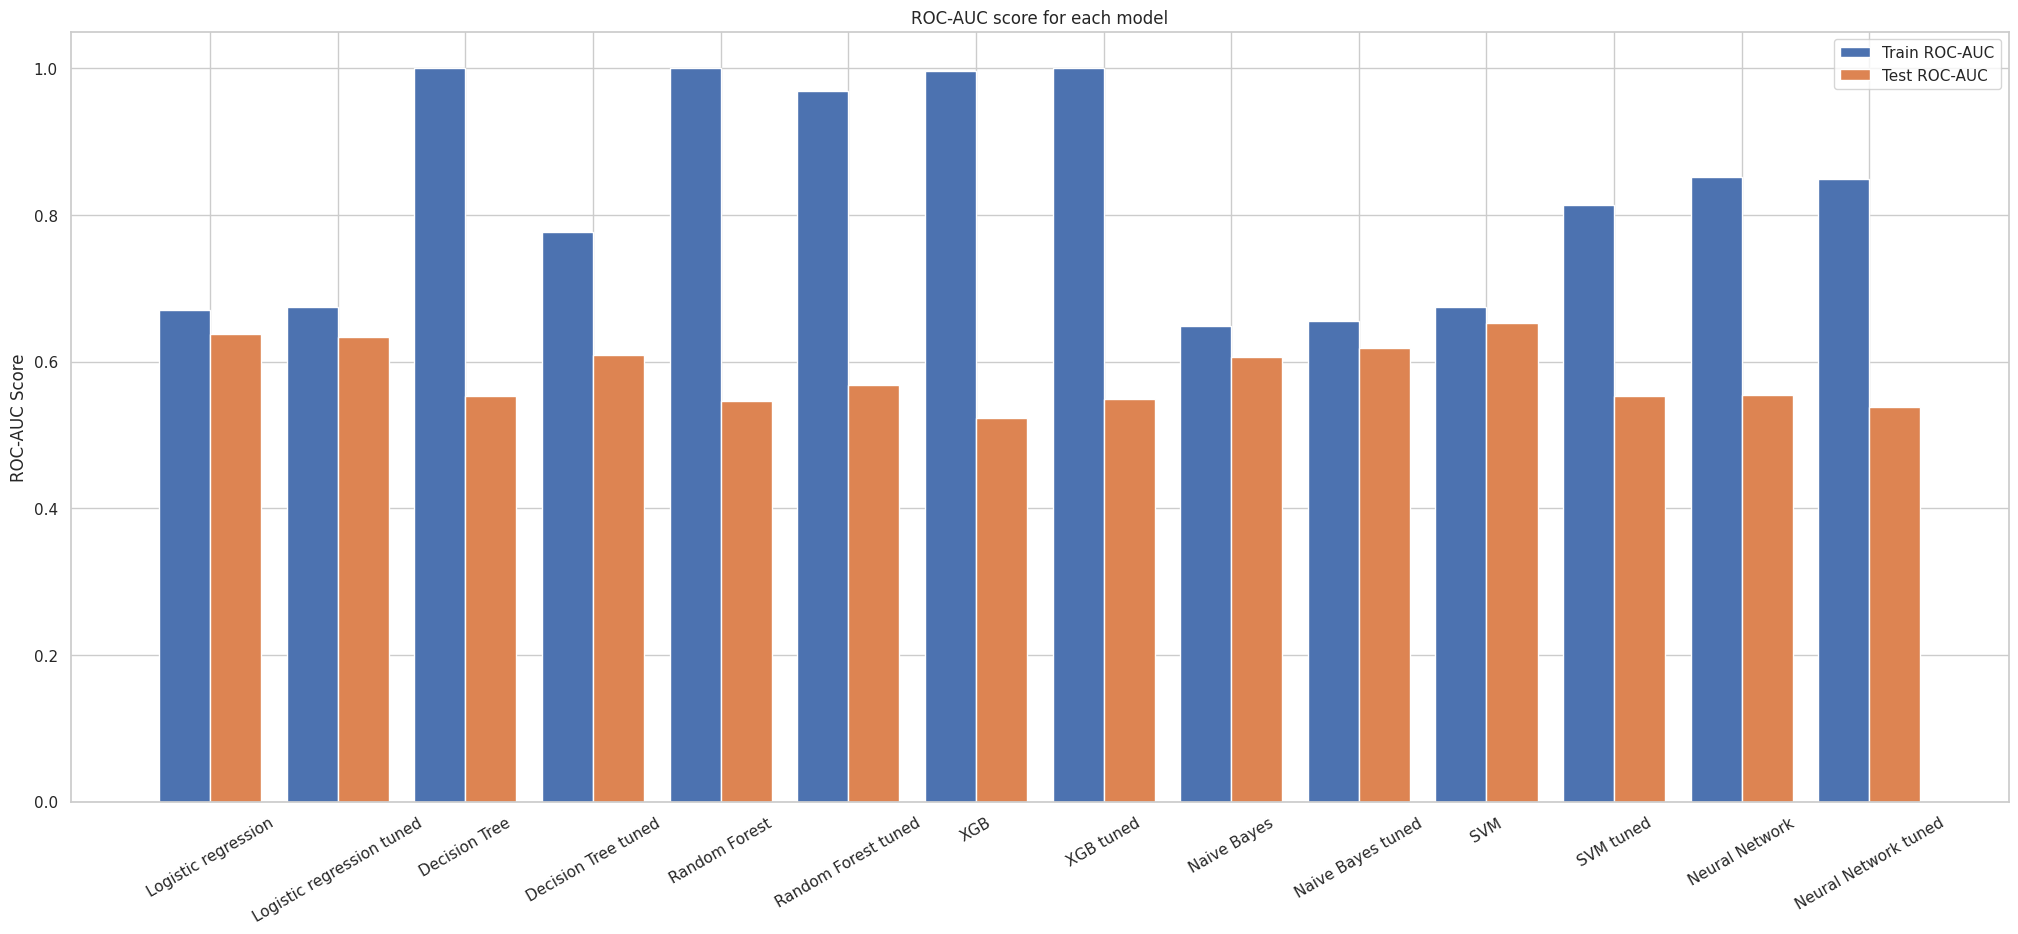

In [ ]:
# ROC-AUC Scores plot

models = list(score.columns)
train = score.iloc[6,:]
test = score.iloc[7,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(25,10))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train ROC-AUC')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test ROC-AUC')


plt.xticks(X_axis,models, rotation=30)
plt.ylabel("ROC-AUC Score")
plt.title("ROC-AUC score for each model")
plt.legend()
plt.show()

### F1 score

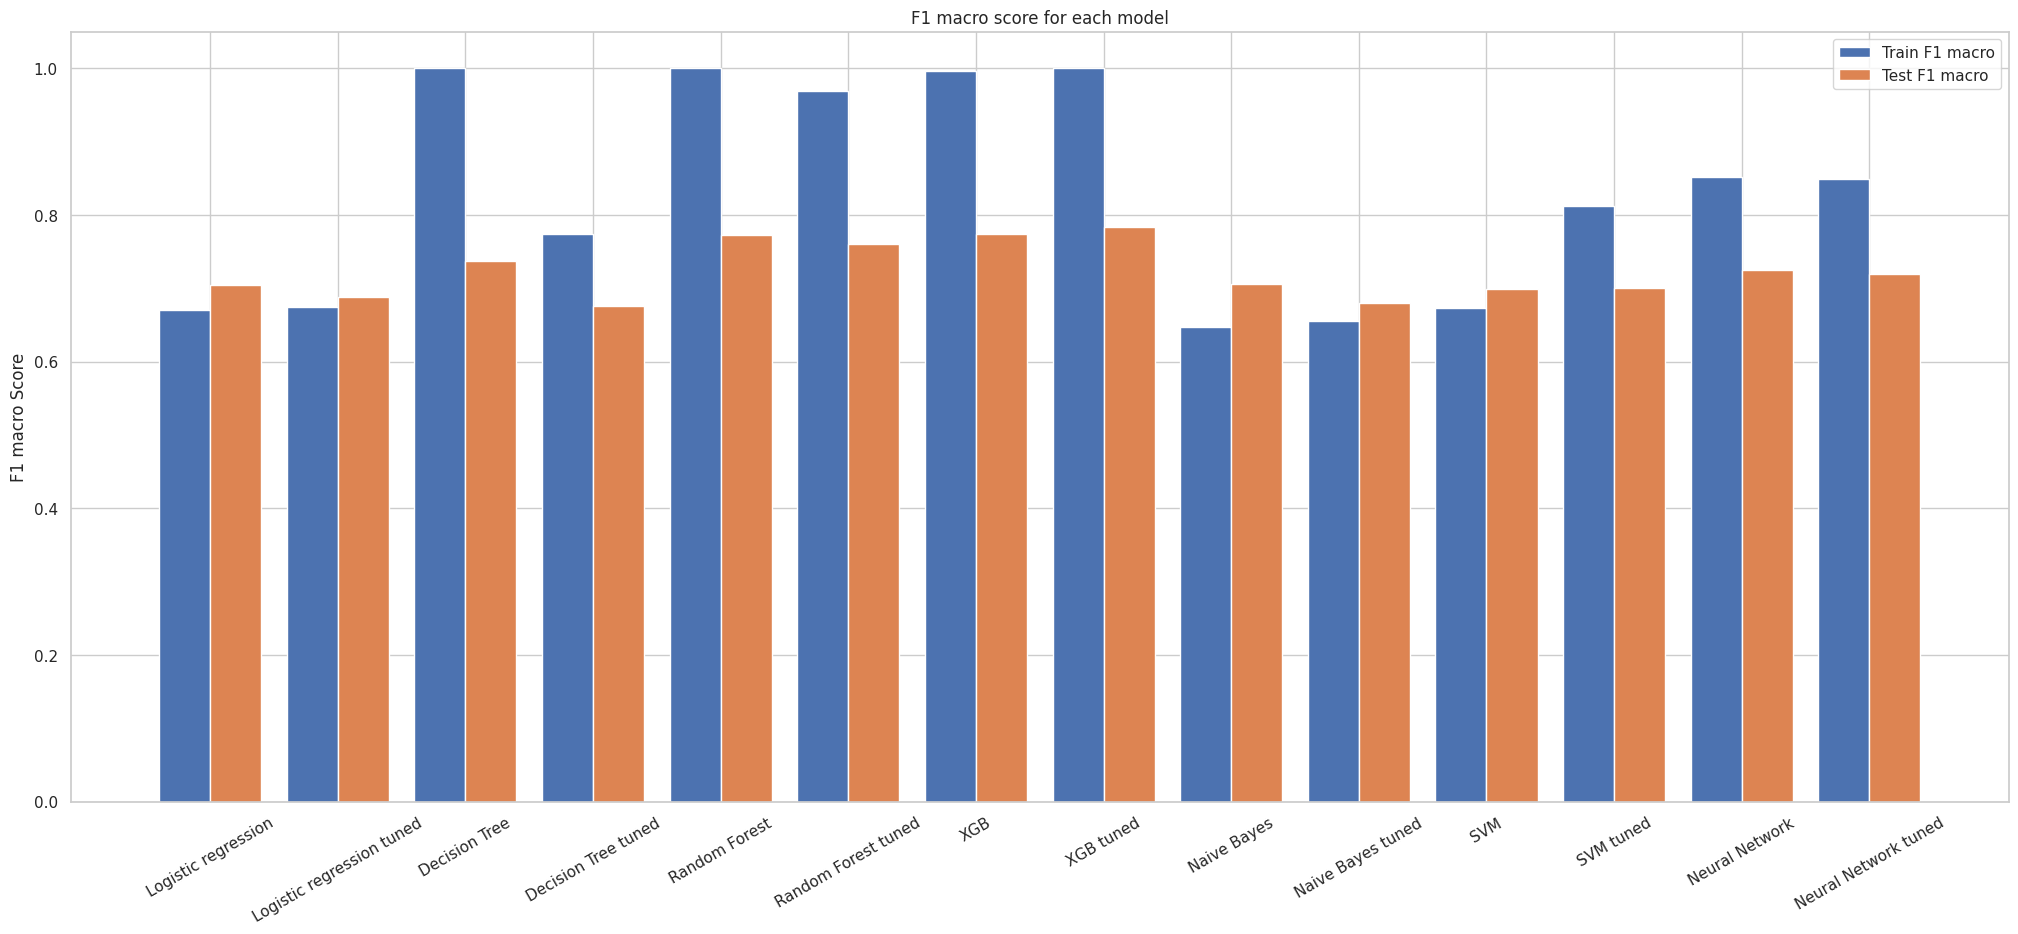

In [ ]:
# F1 macro Scores plot

models = list(score.columns)
train = score.iloc[8,:]
test = score.iloc[9,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(25,10))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train F1 macro')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test F1 macro')


plt.xticks(X_axis,models, rotation=30)
plt.ylabel("F1 macro Score")
plt.title("F1 macro score for each model")
plt.legend()
plt.show()

## ***Selection of best model***

In [ ]:
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.670085                   0.675595   
Precision Test              0.806133                   0.805441   
Recall Train                0.670004                   0.674576   
Recall Test                 0.657817                   0.637168   
Accuracy Train              0.670004                   0.674576   
Accuracy Test               0.657817                   0.637168   
ROC-AUC Train               0.670004                   0.674576   
ROC-AUC Test                0.637255                   0.633170   
F1 macro Train              0.669965                   0.674103   
F1 macro Test               0.704861                   0.688224   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.790196       1.000000   
Precision Test        0.768249             0.794181       0.768967   
Recall Train          1.000000             0.776665       1.000000   
Recall Test           0.713864             0.622419       0.777286   
Accuracy Train        1.000000             0.776665       1.000000   
Accuracy Test         0.713864             0.622419       0.777286   
ROC-AUC Train         1.000000             0.776665       1.000000   
ROC-AUC Test          0.553258             0.608354       0.546211   
F1 macro Train        1.000000             0.774031       1.000000   
F1 macro Test         0.737369             0.675646       0.773010   

                 Random Forest tuned       XGB  XGB tuned  Naive Bayes  \
Precision Train             0.969389  0.996536   1.000000     0.650336   
Precision Test              0.776166  0.758635   0.772720     0.791721   
Recall Train                0.969090  0.996517   1.000000     0.648455   
Recall Test                 0.746313  0.792035   0.794985     0.660767   
Accuracy Train              0.969090  0.996517   1.000000     0.648455   
Accuracy Test               0.746313  0.792035   0.794985     0.660767   
ROC-AUC Train               0.969090  0.996517   1.000000     0.648455   
ROC-AUC Test                0.568321  0.522621   0.548560     0.606720   
F1 macro Train              0.969085  0.996517   1.000000     0.647351   
F1 macro Test               0.759888  0.773567   0.782846     0.705685   

                 Naive Bayes tuned       SVM  SVM tuned  Neural Network  \
Precision Train           0.655273  0.674571   0.816310        0.851455   
Precision Test            0.799152  0.814011   0.767820        0.768238   
Recall Train              0.654985  0.673923   0.812799        0.851110   
Recall Test               0.626844  0.648968   0.659292        0.694690   
Accuracy Train            0.654985  0.673923   0.812799        0.851110   
Accuracy Test             0.626844  0.648968   0.659292        0.694690   
ROC-AUC Train             0.654985  0.673923   0.812799        0.851110   
ROC-AUC Test              0.619026  0.652216   0.553411        0.554075   
F1 macro Train            0.654824  0.673619   0.812278        0.851074   
F1 macro Test             0.679491  0.698267   0.700814        0.725096   

                 Neural Network tuned  
Precision Train              0.848584  
Precision Test               0.761387  
Recall Train                 0.848498  
Recall Test                  0.688791  
Accuracy Train               0.848498  
Accuracy Test                0.688791  
ROC-AUC Train                0.848498  
ROC-AUC Test                 0.538501  
F1 macro Train               0.848489  
F1 macro Test                0.719271

In [ ]:
# Removing the overfitted models which have recall, rocauc, f1 for train as 1
score_t = score.transpose()            #taking transpose of the score dataframe to create new difference column
remove_models = score_t[score_t['Recall Train']>=0.95].index  #creating a list of models which have 1 for train and score_t['Accuracy Train']==1.0 and score_t['ROC-AUC Train']==1.0 and score_t['F1 macro Train']==1.0
remove_models

adj = score_t.drop(remove_models)                     #creating a new dataframe with required models
adj

Precision Train  Precision Test  Recall Train  \
Logistic regression               0.670085        0.806133      0.670004   
Logistic regression tuned         0.675595        0.805441      0.674576   
Decision Tree tuned               0.790196        0.794181      0.776665   
Naive Bayes                       0.650336        0.791721      0.648455   
Naive Bayes tuned                 0.655273        0.799152      0.654985   
SVM                               0.674571        0.814011      0.673923   
SVM tuned                         0.816310        0.767820      0.812799   
Neural Network                    0.851455        0.768238      0.851110   
Neural Network tuned              0.848584        0.761387      0.848498   

                           Recall Test  Accuracy Train  Accuracy Test  \
Logistic regression           0.657817        0.670004       0.657817   
Logistic regression tuned     0.637168        0.674576       0.637168   
Decision Tree tuned           0.622419        0.776665       0.622419   
Naive Bayes                   0.660767        0.648455       0.660767   
Naive Bayes tuned             0.626844        0.654985       0.626844   
SVM                           0.648968        0.673923       0.648968   
SVM tuned                     0.659292        0.812799       0.659292   
Neural Network                0.694690        0.851110       0.694690   
Neural Network tuned          0.688791        0.848498       0.688791   

                           ROC-AUC Train  ROC-AUC Test  F1 macro Train  \
Logistic regression             0.670004      0.637255        0.669965   
Logistic regression tuned       0.674576      0.633170        0.674103   
Decision Tree tuned             0.776665      0.608354        0.774031   
Naive Bayes                     0.648455      0.606720        0.647351   
Naive Bayes tuned               0.654985      0.619026        0.654824   
SVM                             0.673923      0.652216        0.673619   
SVM tuned                       0.812799      0.553411        0.812278   
Neural Network                  0.851110      0.554075        0.851074   
Neural Network tuned            0.848498      0.538501        0.848489   

                           F1 macro Test  
Logistic regression             0.704861  
Logistic regression tuned       0.688224  
Decision Tree tuned             0.675646  
Naive Bayes                     0.705685  
Naive Bayes tuned               0.679491  
SVM                             0.698267  
SVM tuned                       0.700814  
Neural Network                  0.725096  
Neural Network tuned            0.719271

In [ ]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df[metric + ' Test'].max()
        best_model_test = df[df[metric + ' Test'] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

In [ ]:
metrics = ['Precision','Recall', 'Accuracy', 'ROC-AUC', 'F1 macro']

best_models = select_best_model(adj, metrics)
print("The best models are:")
for metric, best_model in best_models.items():
    print(f"{metric}: {best_model} - {adj[metric+' Test'][best_model].round(4)}")

The best models are:
Precision: SVM - 0.814
Recall: Neural Network - 0.6947
Accuracy: Neural Network - 0.6947
ROC-AUC: SVM - 0.6522
F1 macro: Neural Network - 0.7251


#### **Explain each evaluation metric's indication towards business and the business impact pf the ML model used.**

When we observe a situation where the normal accuracy is low, but the ROC-AUC score is high, it indicates a potential imbalance in the class distribution of your dataset. This is a common scenario in imbalanced datasets, where one class (usually the minority class) has significantly fewer samples than the other.

In such cases, accuracy might not be the most informative metric because a model that predicts the majority class for every instance can still achieve a high accuracy if the dataset is imbalanced.

Here's a quick guide on how to interpret these metrics in imbalanced datasets:

1. **High ROC-AUC, Low Accuracy:**
   - **ROC-AUC:** ROC-AUC is a good metric for imbalanced datasets. A high ROC-AUC suggests that the model is good at distinguishing between the positive and negative classes.
   - **Accuracy:** In imbalanced datasets, accuracy alone might not provide a complete picture. The low accuracy could be due to the imbalance, where the majority class dominates the predictions.

2. **Choosing the Best Model:**
   - **Consider the Business Context:** Depending on the specific goals and costs associated with false positives and false negatives in your application, you may prioritize precision, recall, or another metric.
   - **Use Multiple Metrics:** Evaluate multiple metrics (precision, recall, F1-score) in addition to accuracy and ROC-AUC to get a comprehensive understanding of your model's performance.

3. **Adjusting for Imbalance:**
   - **Class Weights:** In some models, you can assign different weights to classes to account for imbalance.
   - **Sampling Techniques:** Consider using resampling techniques like oversampling the minority class or undersampling the majority class.

4. **Precision-Recall Curve:**
   - **Plotting Precision-Recall Curve:** In imbalanced datasets, it's often informative to look at the precision-recall curve in addition to the ROC curve.

In summary, a high ROC-AUC is a positive sign, but you should also consider other metrics and explore techniques to handle class imbalance. The best model depends on the specific goals and constraints of your problem.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

After carefully considering the potential consequences of false positives and false negatives in the context of our business objectives, I have selected recall as the primary evaluation metric for our CHD risk prediction model. This means that our goal is to maximize the number of true positives (patients correctly identified as having CHD risk) while minimizing the number of false negatives (patients incorrectly identified as not having CHD risk). By doing so, we aim to ensure that we correctly identify as many patients with CHD risk as possible, even if it means that we may have some false positives.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

After evaluating the performance of several machine learning models on the Framingham Heart Study dataset, I have selected the Neural Network (tuned) as our final prediction model. This decision was based on the model’s performance on our primary evaluation metric of recall, which measures the ability of the model to correctly identify patients with CHD risk. In our analysis, we found that the Neural Network (tuned) had the highest recall score among the models we evaluated.

We chose recall as our primary evaluation metric because correctly identifying patients with CHD risk is critical to achieving our business objectives. By selecting a model with a high recall score, we aim to ensure that we correctly identify as many patients with CHD risk as possible, even if it means that we may have some false positives. Overall, we believe that the Neural Network (tuned) is the best choice for our needs and will help us achieve a positive business impact.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

## **SHAP(Shapley additive Explanations)**

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 7.6 MB/s eta 0:00:00


In [ ]:
# importing shap
import shap

# Training data variable
X

age  cigs_per_day  total_cholesterol       bmi  heart_rate  \
0     1.682783      0.007009          -0.362779 -0.085301    1.226815   
1    -1.576210     -0.936579          -0.572897  1.066765   -0.332741   
2    -0.412284      0.695561           0.314268 -1.405321    1.053531   
3     0.053287      1.135691          -0.082622  0.670496   -0.679309   
4     1.682783      1.400782           0.104150  0.187626   -0.506025   
...        ...           ...                ...       ...         ...   
3385  1.217213     -0.936579           0.571079  0.938174   -0.506025   
3386 -0.412284     -0.936579          -0.876401 -0.982809    0.360395   
3387 -0.645069      0.007009           2.672259  0.843700   -0.246099   
3388  1.217213     -0.936579          -1.063172 -0.707258    0.360395   
3389  0.518857     -0.936579           1.201433  1.095632    0.273753   

       glucose  pulse_pressure  education  sex  bp_meds  prevalent_stroke  \
0     0.004571        1.040384          1    0        0                 0   
1    -0.411289        1.433846          3    1        0                 0   
2     1.168977       -0.211461          0    0        0                 0   
3     1.168977        1.433846          0    1        0                 0   
4    -0.244945        0.289561          0    0        0                 0   
...        ...             ...        ...  ...      ...               ...   
3385  1.917524       -0.252890          0    0        0                 0   
3386  0.337258       -0.129938          0    0        0                 0   
3387 -0.660804        0.235018          2    1        0                 0   
3388  0.420430        0.980687          0    1        0                 0   
3389  1.002633       -0.050131          2    0        0                 0   

      prevalent_hyp  diabetes  
0                 0         0  
1                 1         0  
2                 0         0  
3                 1         0  
4                 0         0  
...             ...       ...  
3385              0         0  
3386              0         0  
3387              1         0  
3388              1         0  
3389              0         0  

[3390 rows x 13 columns]

In [ ]:
# summarize the background dataset using k-means clustering
X_summary = shap.kmeans(X, 100)

# create an explainer object
explainer = shap.KernelExplainer(neural2.predict_proba, X_summary)

# compute the SHAP values for all the samples in the test data
shap_values = explainer.shap_values(X_test)

  0%|          | 0/678 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
# Summery plot
shap.summary_plot(shap_values, X_test, feature_names=features)

This bar plot shows the important features and the mean shap values.
It shows the average impact on the model output magnitude.

It does not show the positive or negative impact on the prediction.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***